In [1]:
import json
from datetime import datetime

from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

import config

/home/gabriel/miniconda3/envs/rome/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_data(name):
    dataset = load_dataset(config.DATA_PATH+"/"+name, split="train")
    return dataset

def print_distribution(column, column_name):
    filtered = [x for x in column if x is not None]
    n_none = len(column) - len(filtered)
    if n_none > 0:
        print(f"Number of 'None' {column_name}: {n_none}")
    if len(filtered) == 0:
        return
    if type(filtered[0]) == list:
        filtered = [element for sample in filtered for element in sample]
    if type(filtered[0]) == dict:
        for k in filtered[0].keys():
            print_distribution([d[k] for d in filtered], column_name + "." + k)
        return

    if type(filtered[0]) in [str, bool]:
        lengths = [len(str(x)) for x in filtered]
        plt.figure(figsize=(20, 5))
        plt.hist(lengths, bins=min(len(set(lengths)), 1000))
        plt.title(column_name + " length distribution")
        plt.show()
        if sum(lengths) > 10000000:
            return
        unique_values = np.unique([str(x) for x in filtered], return_counts=True)
        print(f"There are {len(unique_values[0])} {column_name}.")
        if len(unique_values[0]) > 100:
            return
        ordered_ind = np.argsort(-unique_values[1])
        plt.figure(figsize=(20, 5))
        plt.bar(unique_values[0][ordered_ind], unique_values[1][ordered_ind])
        plt.xticks(rotation='vertical')
    else:
        plt.figure(figsize=(20, 5))
        plt.hist(filtered, bins=1000)
    plt.title(column_name + " distribution")
    plt.show()

def print_distributions(dataset, column_names):
    print("Features:", list(dataset.features.keys()))
    print("Number of samples:", dataset.num_rows)
    print("Sample:", json.dumps(dataset[-1], indent=4, sort_keys=True))

    for column_name in column_names:
        print_distribution(dataset[column_name], column_name)        

### AM-Deepseek-Distill

Features: ['question', 'answer', 'question_source', 'answer_source', 'category', 'ground_truth', 'test_case', 'instruction_constrain', 'pass_rate_r1', 'pass_rate_7b', 'pass_rate_1.5b', 'verify_score', 'ppl', 'model_name']
Number of samples: 828639
Sample: {
    "answer": "<think>Okay, so I need to figure out how much employee Y is paid per week. The problem says that two employees, X and Y, are paid a total of Rs. 330 per week. Also, X is paid 120% of the sum paid to Y. Hmm, let me try to break this down step by step.\n\nFirst, let's denote the amount paid to Y per week as some variable. Maybe let's call it \"y\". Then, since X is paid 120% of what Y gets paid, X's payment would be 120% of y. I remember that percentages can be converted to decimals for calculations, so 120% would be 1.2. So, X's payment is 1.2 times y.\n\nThe total payment to both X and Y is Rs. 330. That means if I add X's payment and Y's payment together, it should equal 330. So, in equation form, that would be:\n\nX

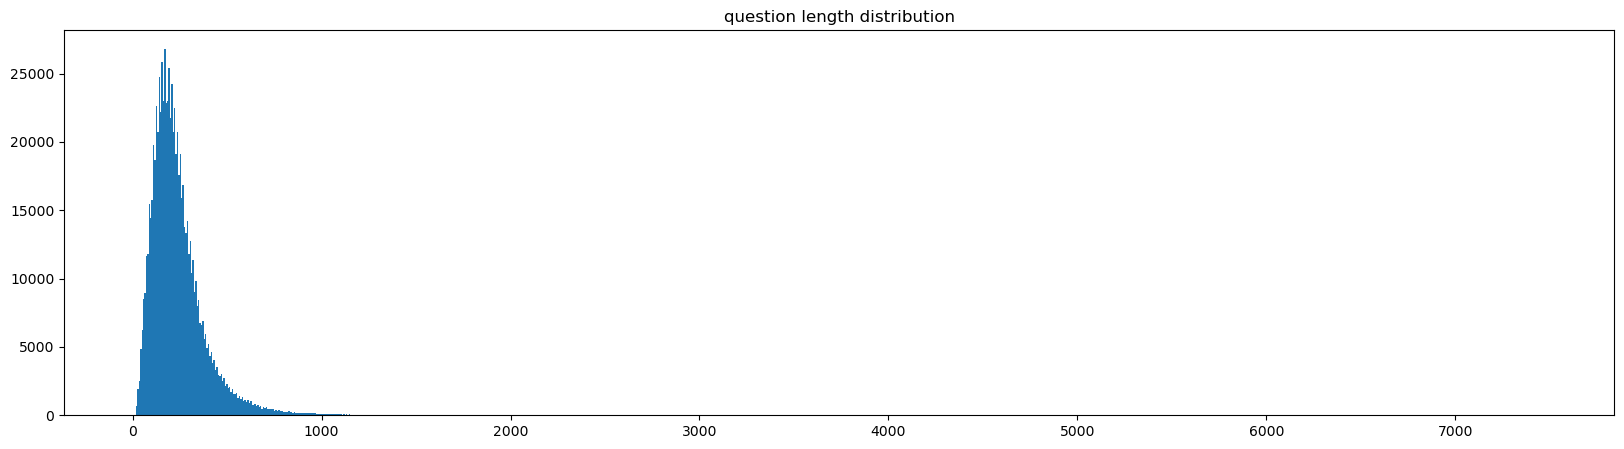

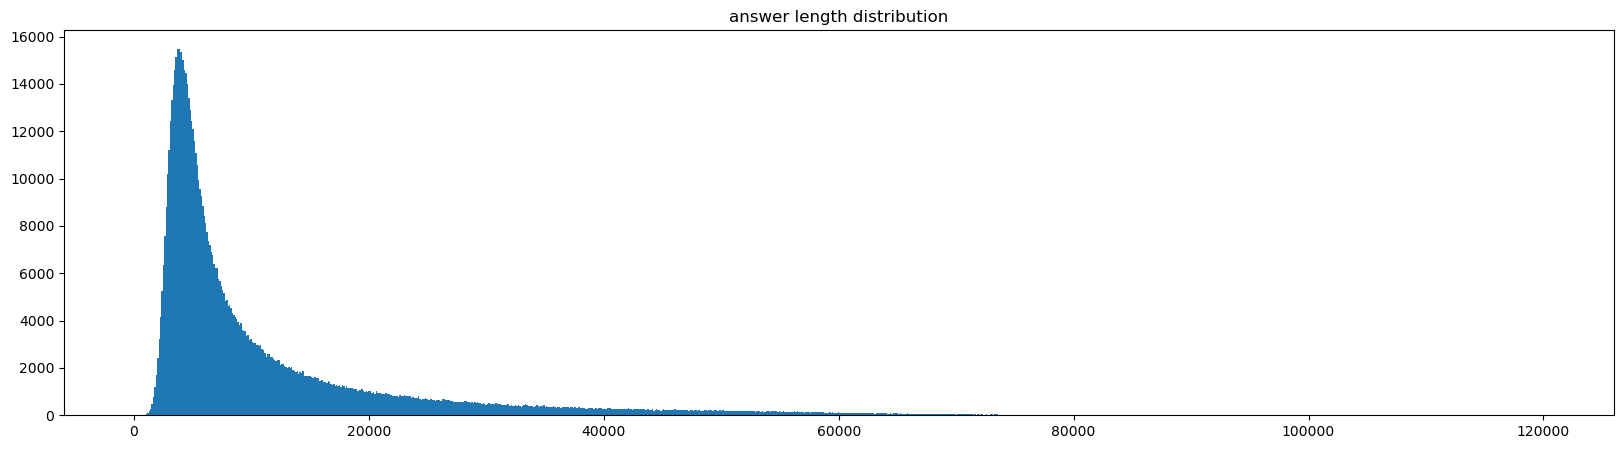

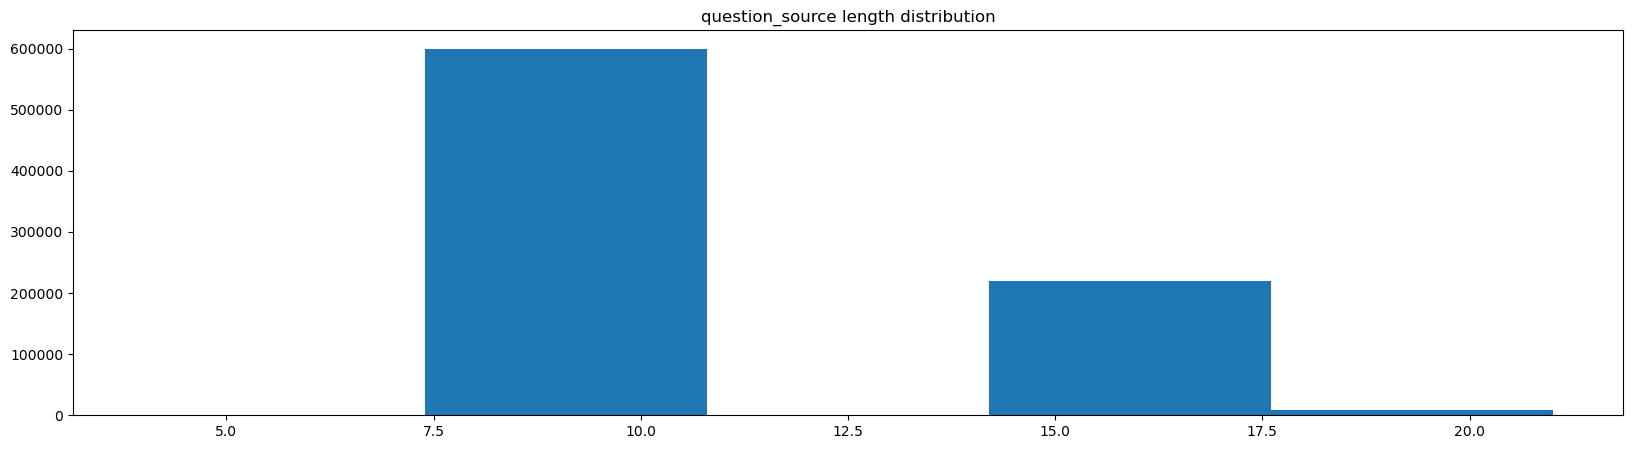

There are 6 question_source.


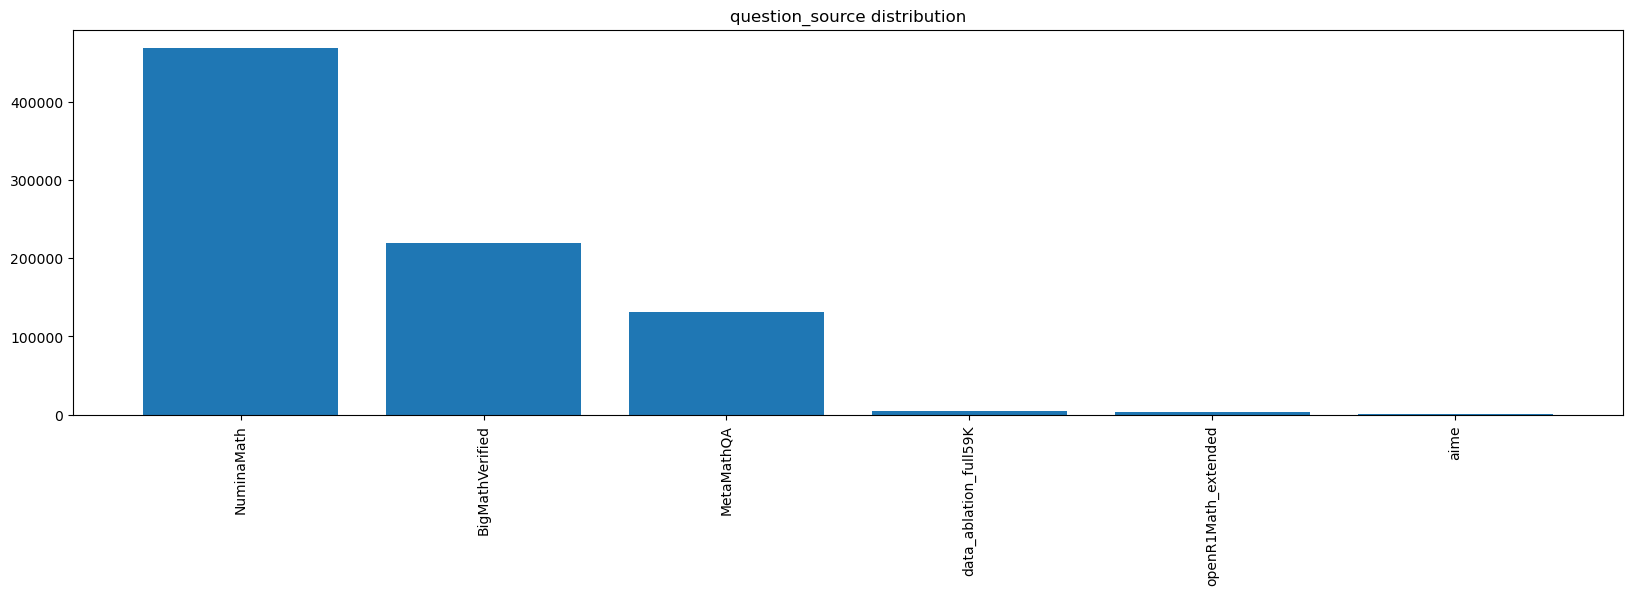

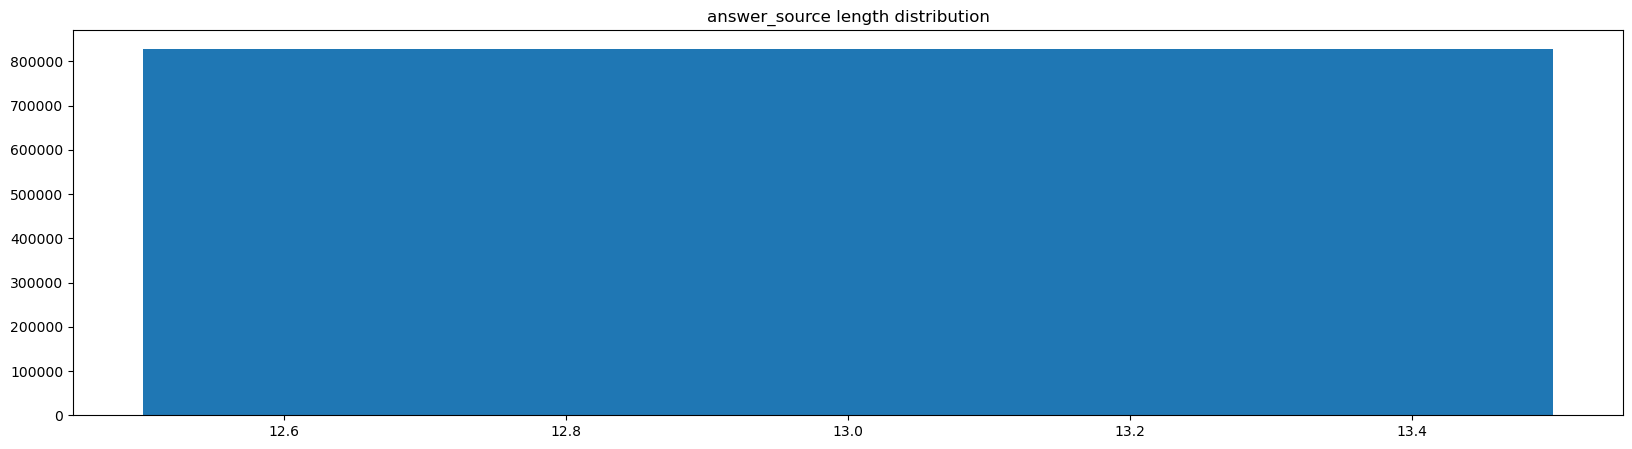

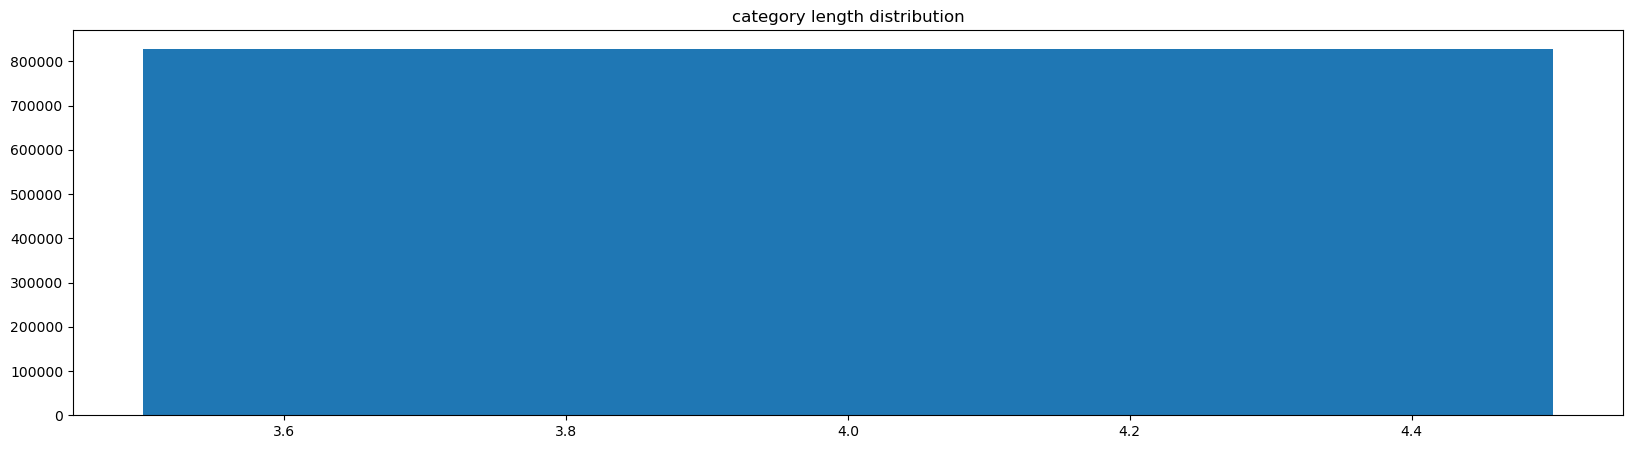

There are 1 category.


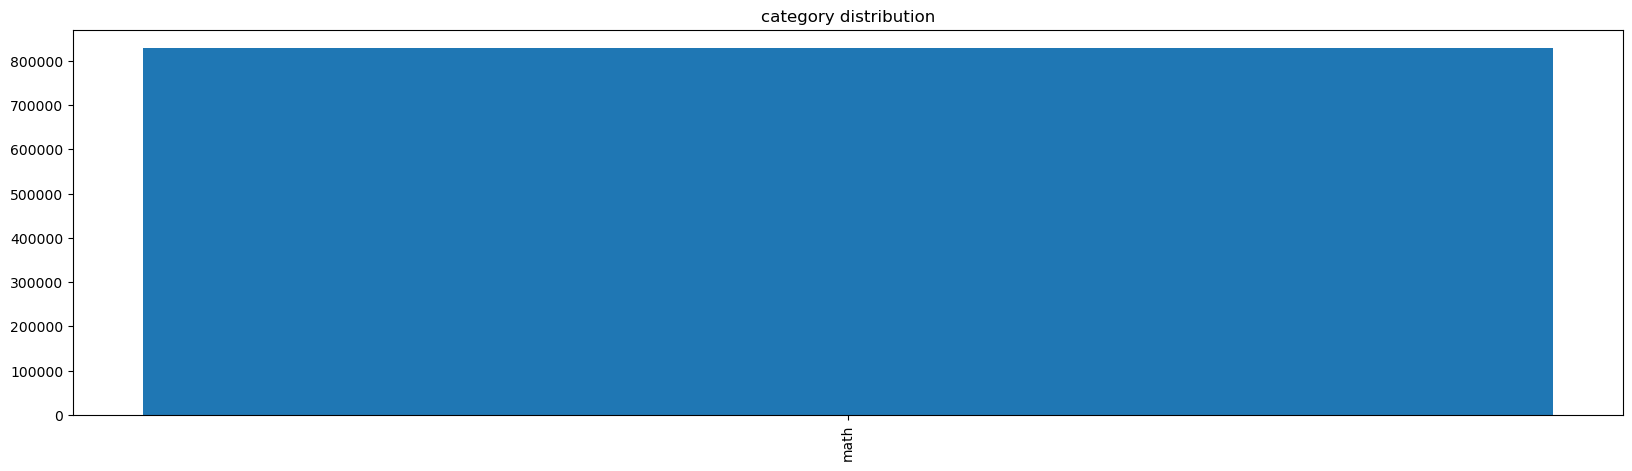

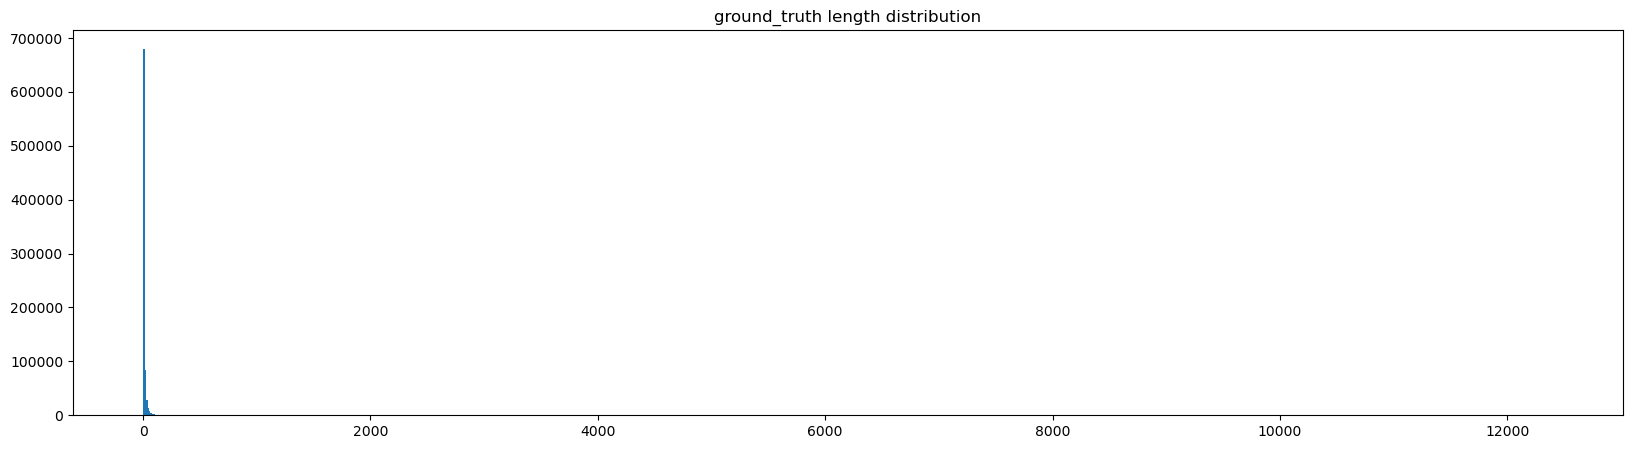

Number of 'None' test_case: 828639
Number of 'None' instruction_constrain: 828639


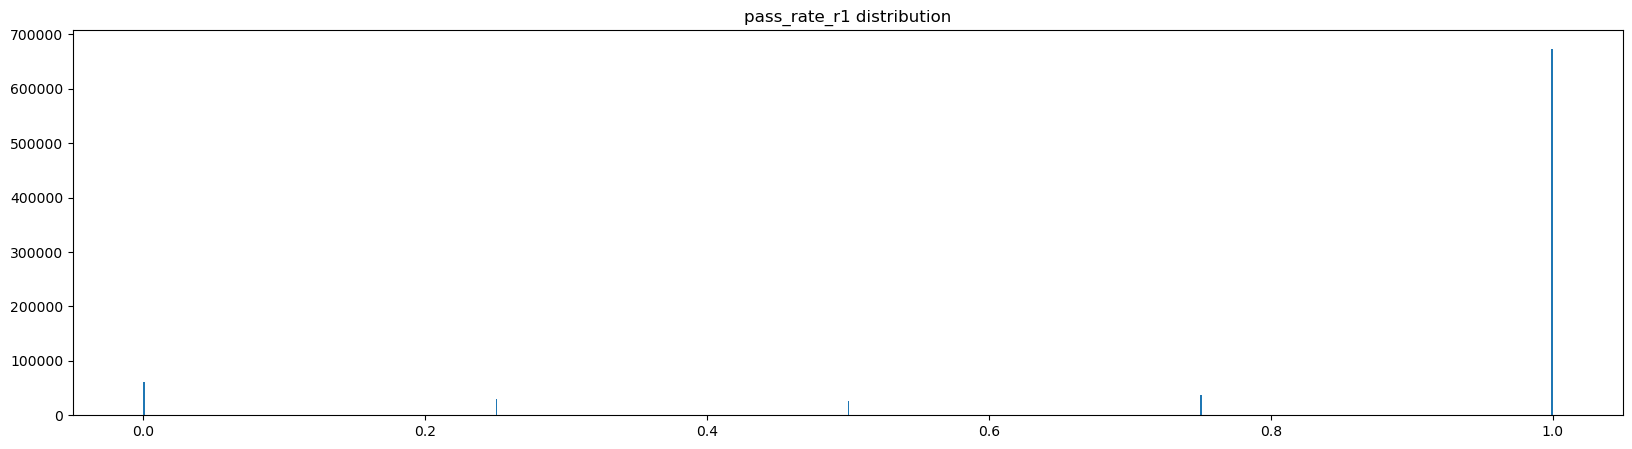

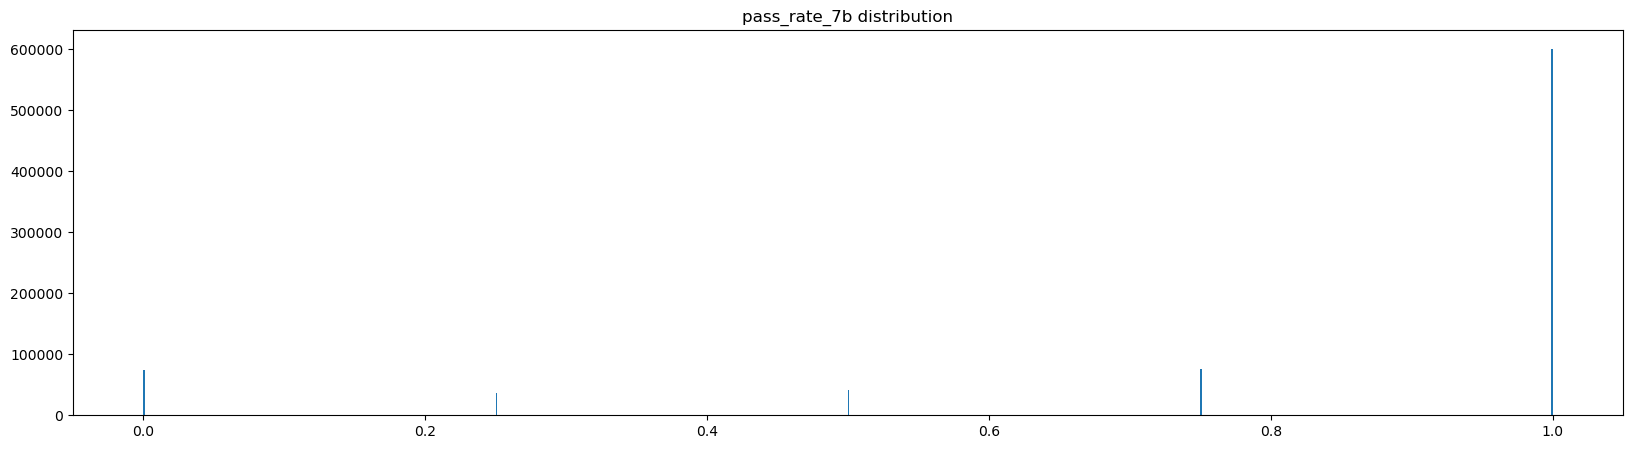

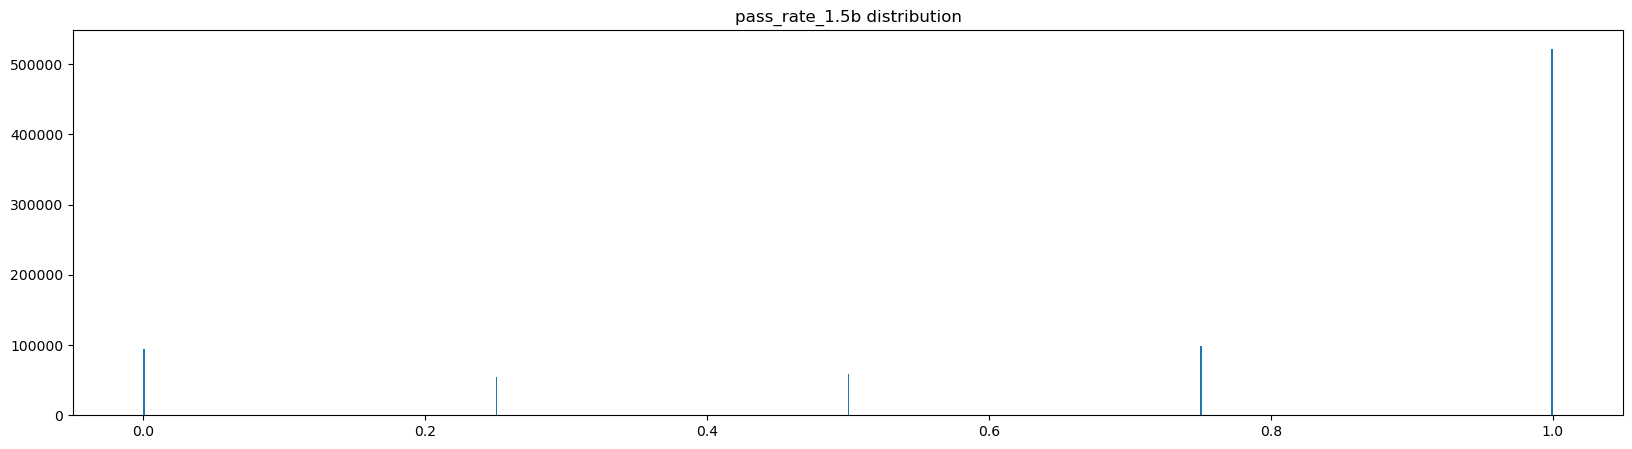

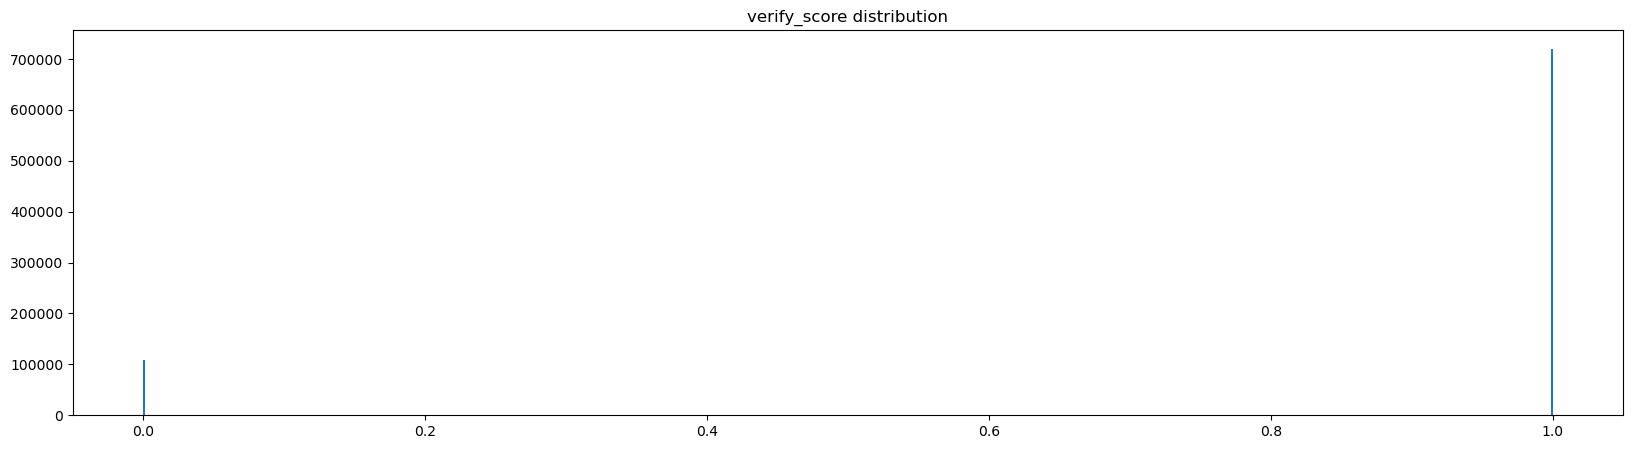

Number of 'None' ppl: 5


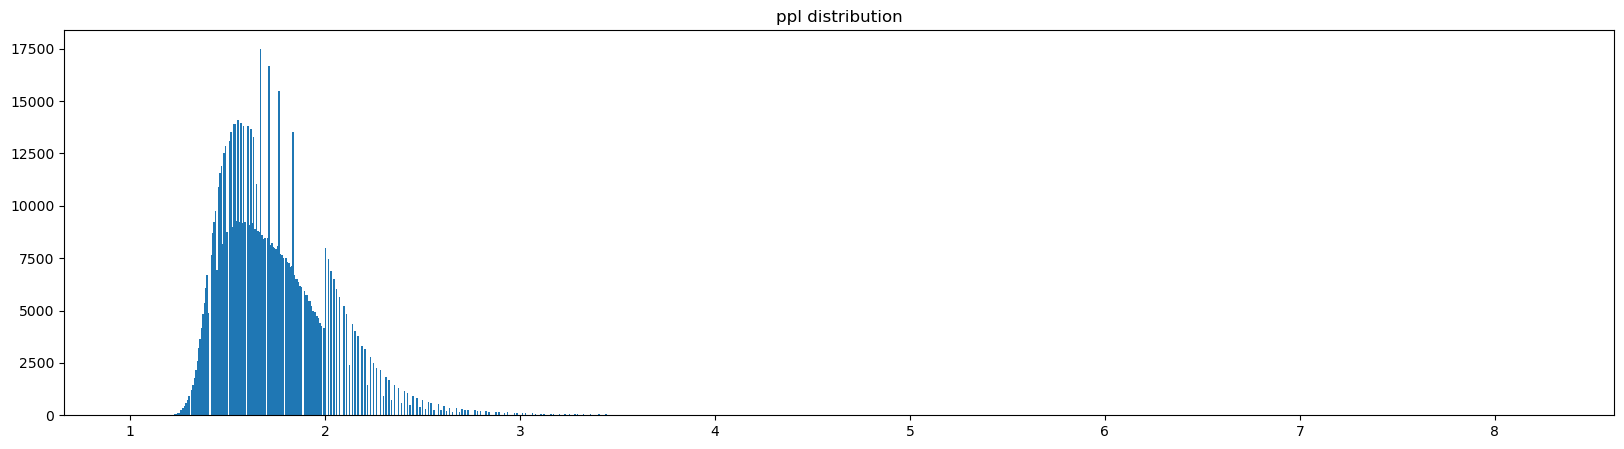

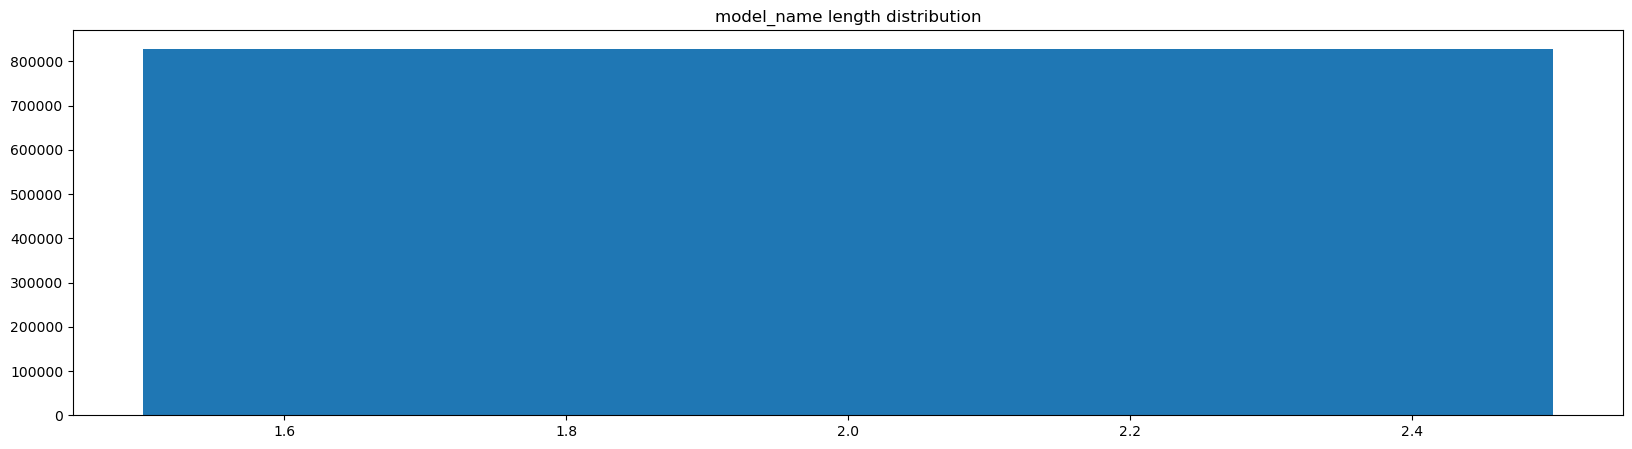

There are 1 model_name.


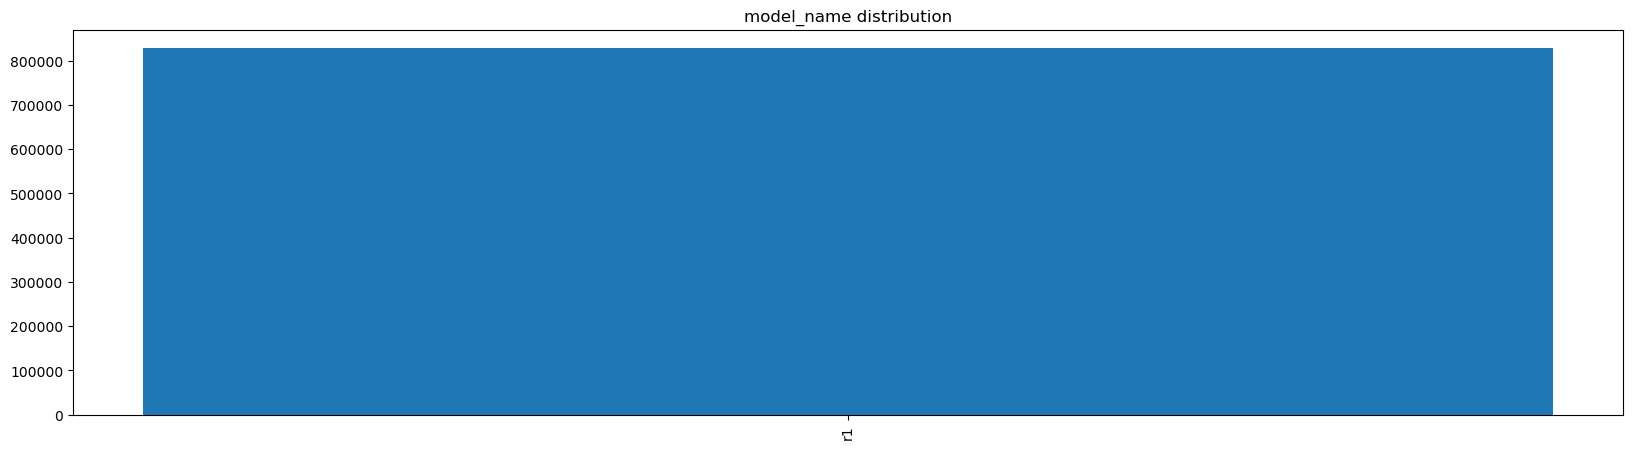

In [3]:
am_deepseek_distill = load_data("AM-DeepSeek-Distilled-40M")

print_distributions(am_deepseek_distill, ['question', 'answer', 'question_source', 'answer_source', 'category', 'ground_truth', 'test_case', 'instruction_constrain', 'pass_rate_r1', 'pass_rate_7b', 'pass_rate_1.5b', 'verify_score', 'ppl', 'model_name'])

### BigMath

Features: ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate']
Number of samples: 251122
Sample: {
    "answer": "1",
    "domain": [
        "Mathematics -> Algebra -> Algebraic Expressions -> Other"
    ],
    "llama8b_solve_rate": 0.15625,
    "problem": "Find the sum of the numerical coefficients of all the terms in the expansion of $(x-2y)^{18}$. Express your answer as a single integer.",
    "source": "big_math"
}


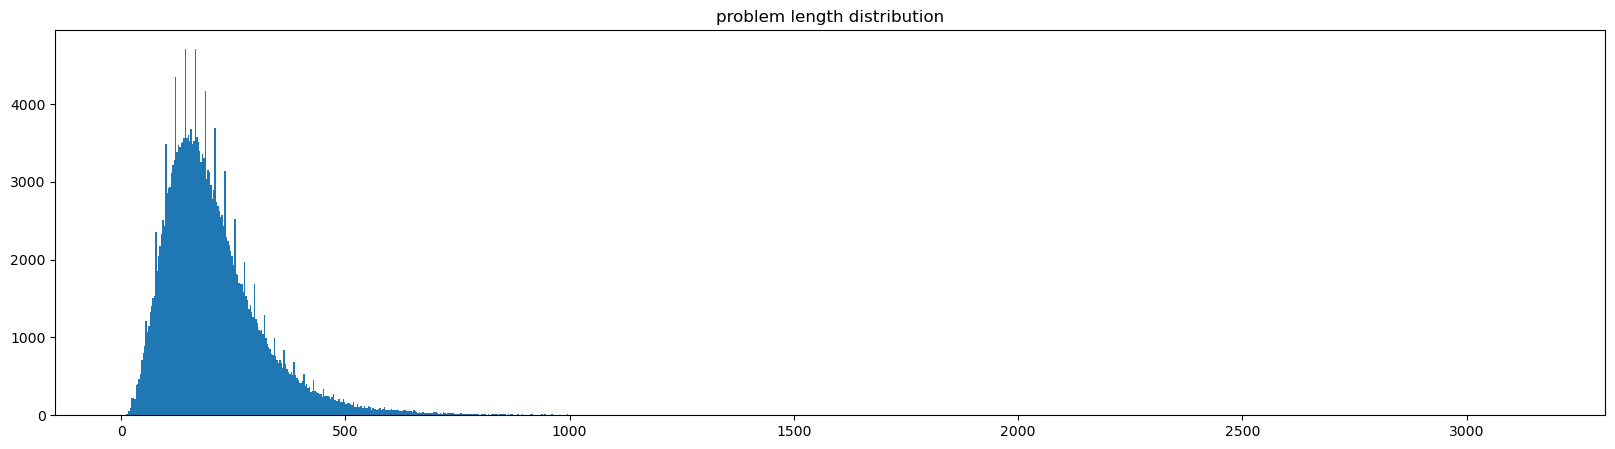

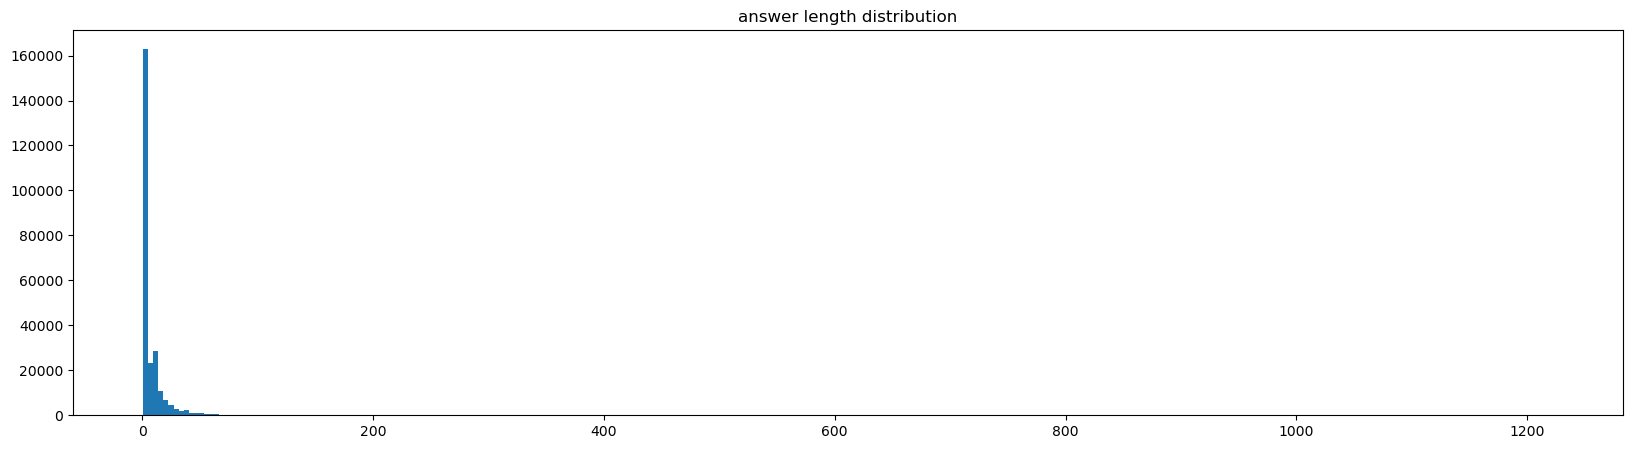

There are 61941 answer.


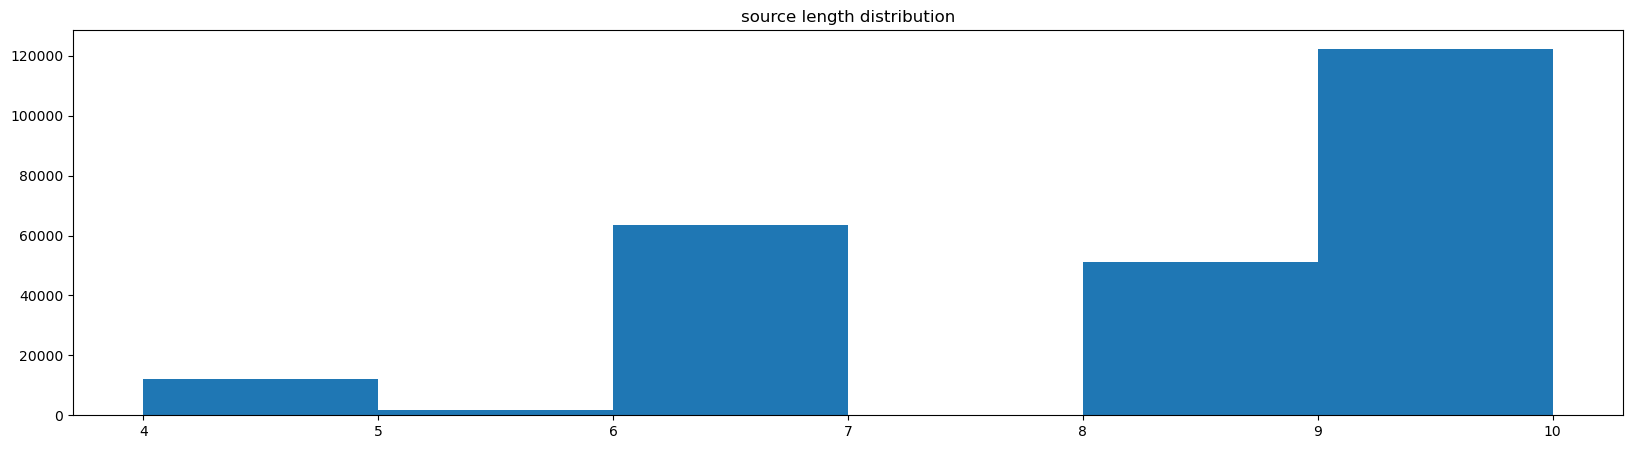

There are 11 source.


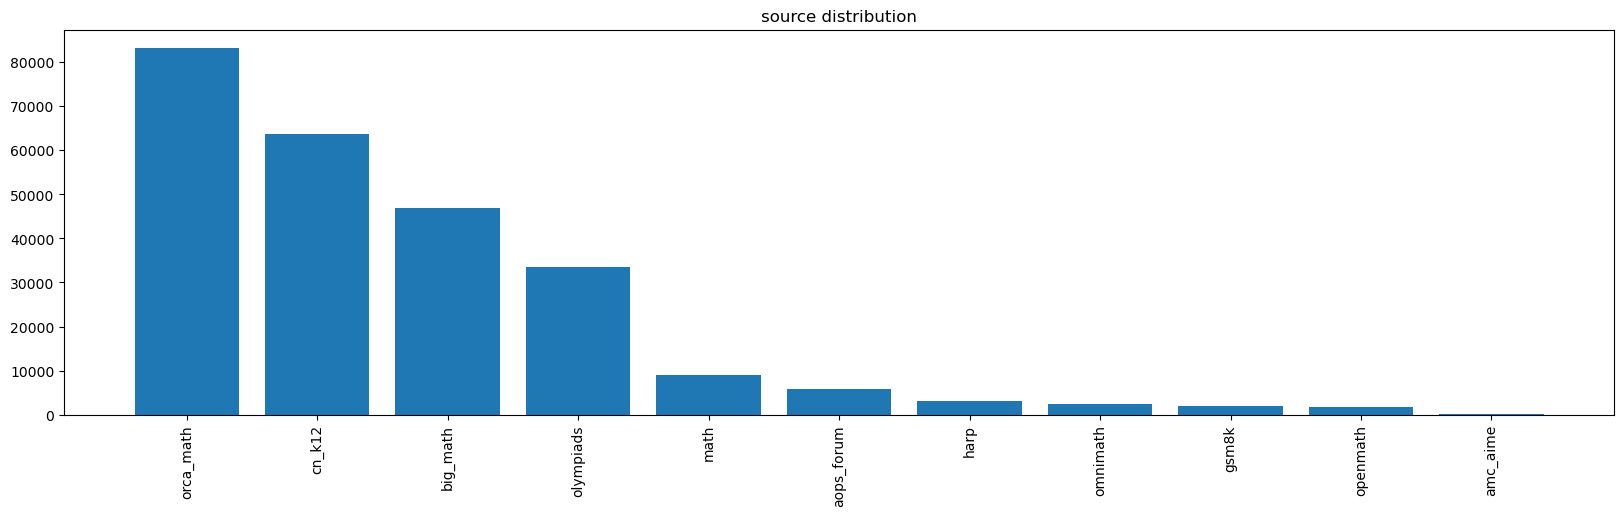

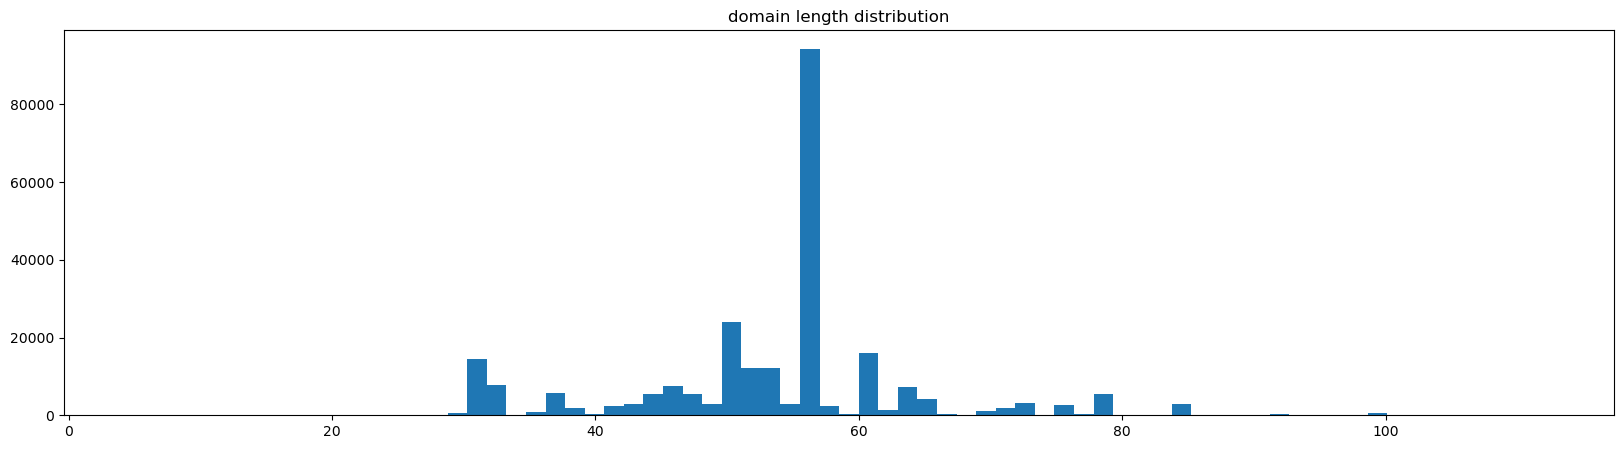

Number of 'None' llama8b_solve_rate: 4


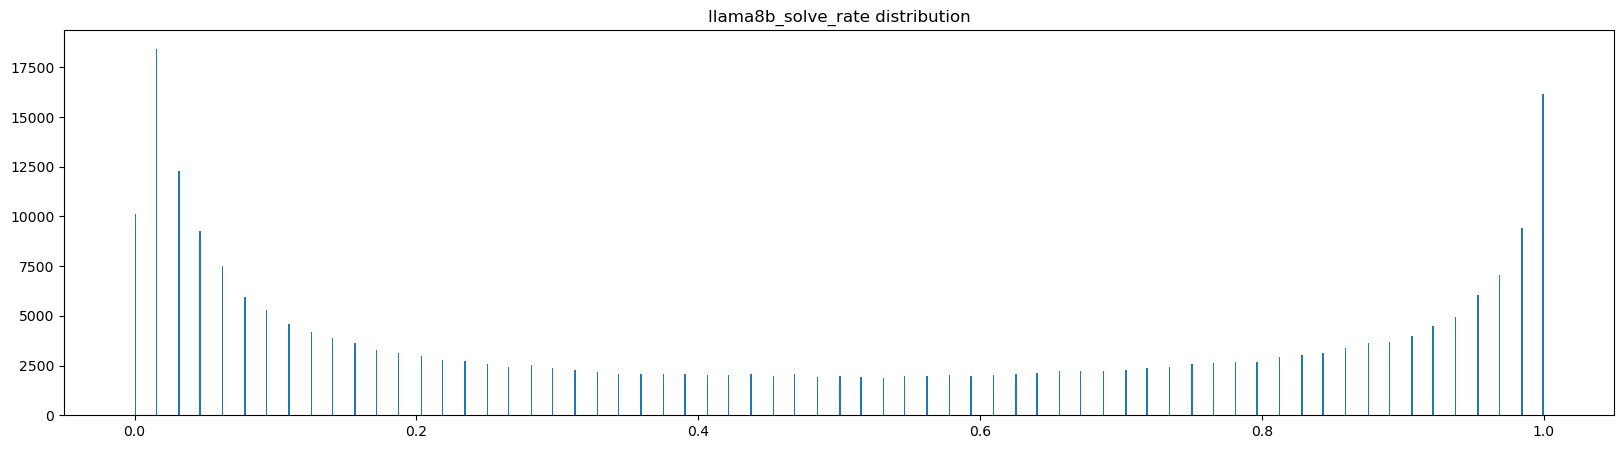

In [4]:
big_math = load_data("Big-Math-RL-Verified")
print_distributions(big_math, ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate'])

### LIMO

Features: ['question', 'solution', 'answer']
Number of samples: 817
Sample: {
    "answer": "850",
    "question": "Let $P(x) = x^2 - 3x - 9$ . A real number $x$ is chosen at random from the interval $5 \\le x \\le 15$ . The probability that $\\left\\lfloor\\sqrt{P(x)}\\right\\rfloor = \\sqrt{P(\\lfloor x \\rfloor)}$ is equal to $\\frac{\\sqrt{a} + \\sqrt{b} + \\sqrt{c} - d}{e}$ , where $a$ , $b$ , $c$ , $d$ , and $e$ are positive integers. Find $a + b + c + d + e$ .",
    "solution": "Okay, so I've got this problem here that I need to solve. Let me take a deep breath and try to unpack it step by step. \n\nThe problem is about probability and functions. It says:\n\nLet \\( P(x) = x^2 - 3x - 9 \\). A real number \\( x \\) is chosen at random from the interval \\( 5 \\leq x \\leq 15 \\). We need to find the probability that \\( \\left\\lfloor \\sqrt{P(x)} \\right\\rfloor = \\sqrt{P(\\lfloor x \\rfloor)} \\). They mention that this probability can be expressed in the form \\( \\frac{\\sqr

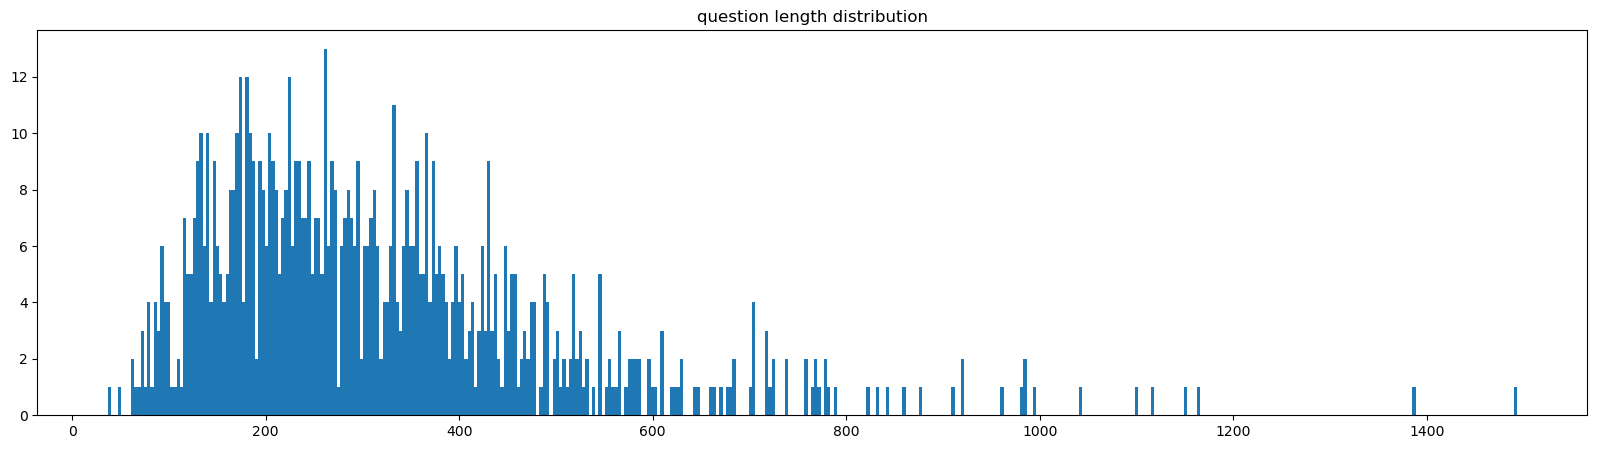

There are 817 question.


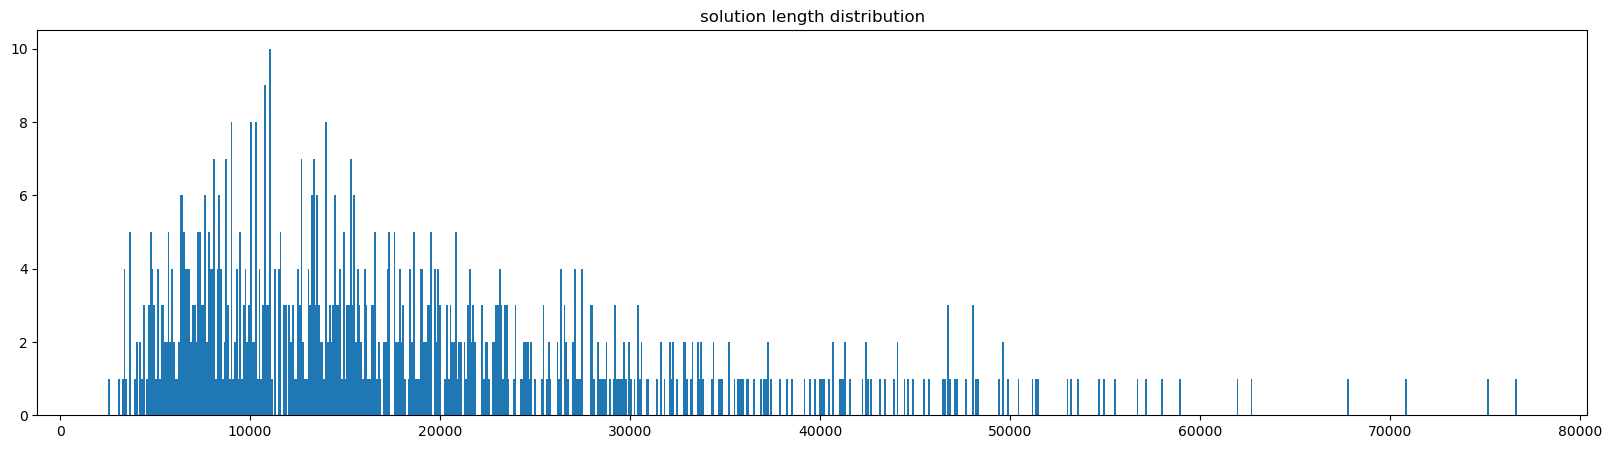

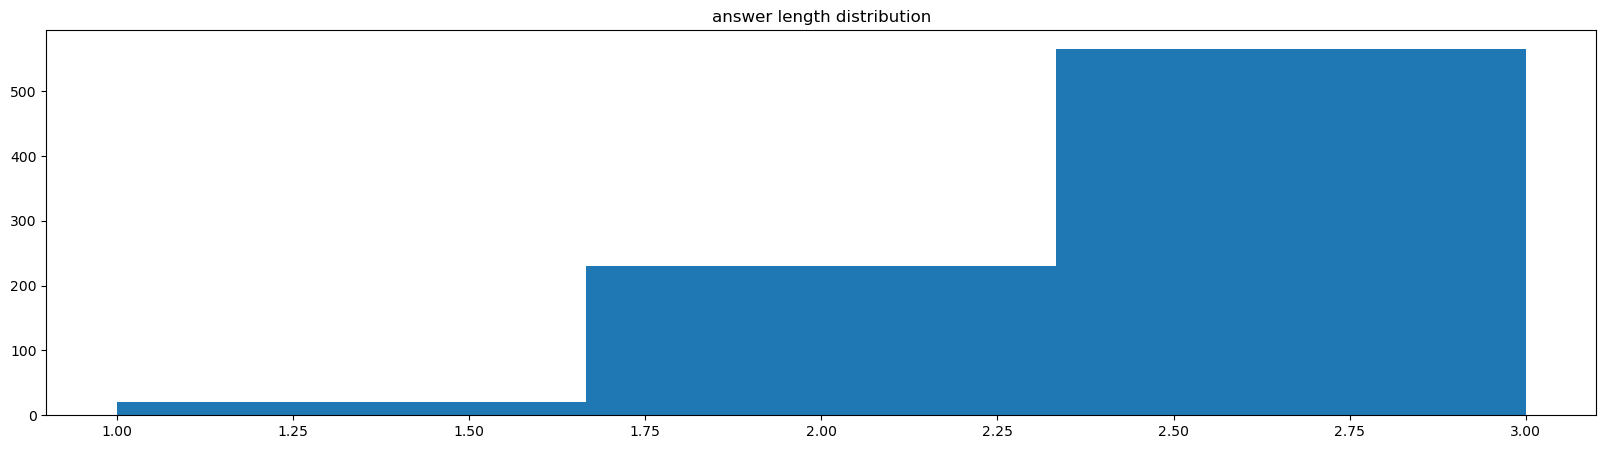

There are 458 answer.


In [12]:
limo = load_data("LIMO")

print_distributions(limo, ['question', 'solution', 'answer'])

### Llama-Nemotron

Features: ['input', 'output', 'category', 'license', 'reasoning', 'generator', 'used_in_training', 'version', 'system_prompt', 'role', 'content']
Number of samples: 500000
Sample: {
    "category": "math",
    "content": "Solve the following math problem. Make sure to put the answer (and only answer) inside \\boxed{}.\n\nAre the acute angles in an isosceles trapezoid always $60^\\circ$ and the angles above those $120^\\circ$?",
    "generator": "Qwen-2.5-32B-Instruct, DeepSeek-R1",
    "input": [
        {
            "content": "Solve the following math problem. Make sure to put the answer (and only answer) inside \\boxed{}.\n\nAre the acute angles in an isosceles trapezoid always $60^\\circ$ and the angles above those $120^\\circ$?",
            "role": "user"
        }
    ],
    "license": "cc-by-4.0",
    "output": "<think>\nOkay, let me try to figure this out. The question is asking if the acute angles in an isosceles trapezoid are always 60 degrees and the obtuse ones 120 degree

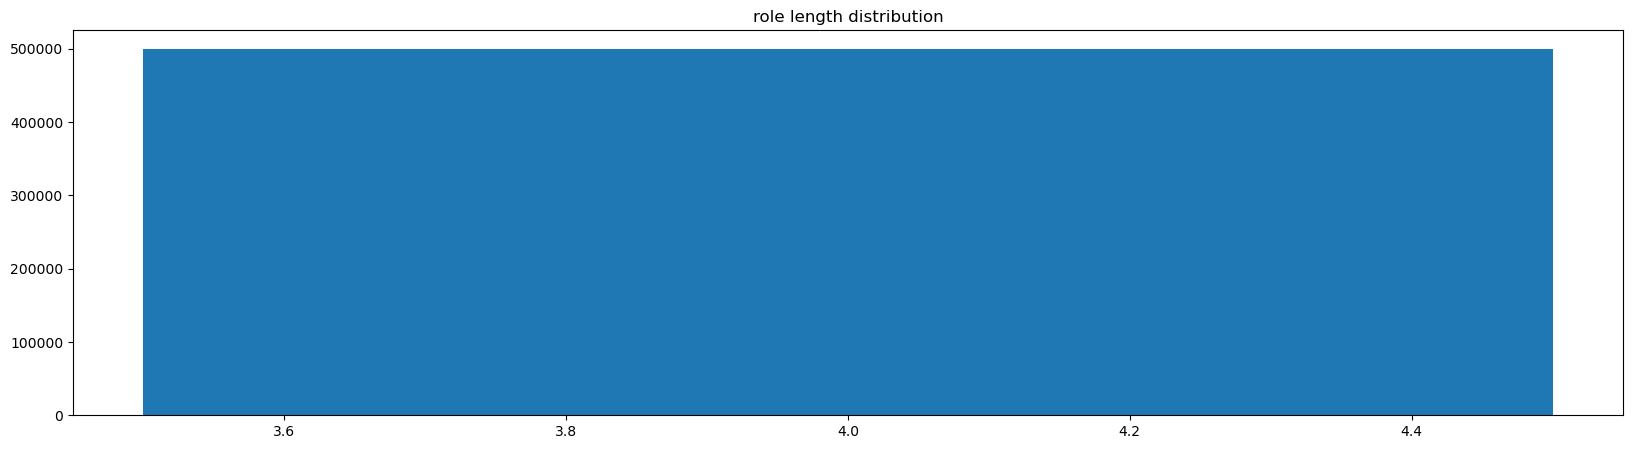

There are 1 role.


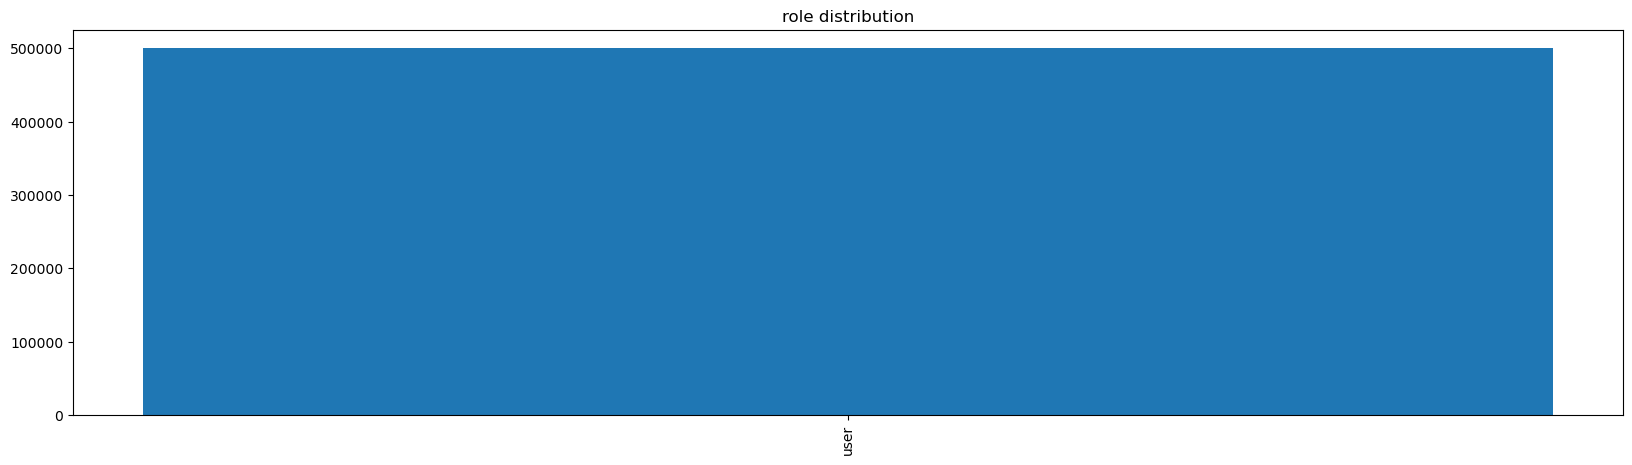

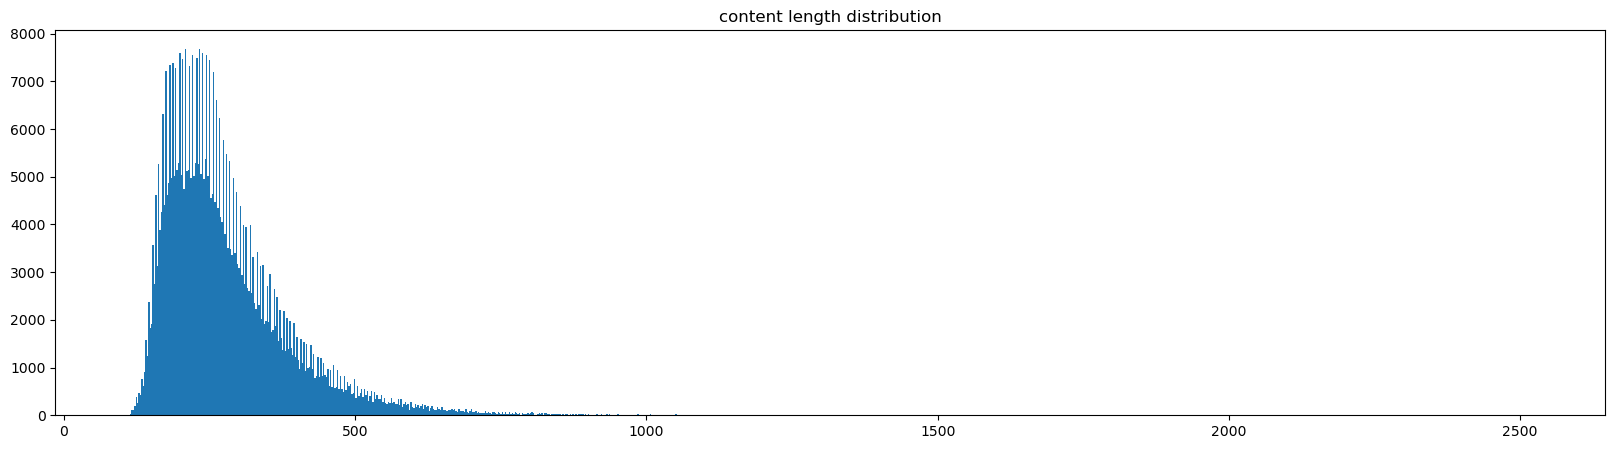

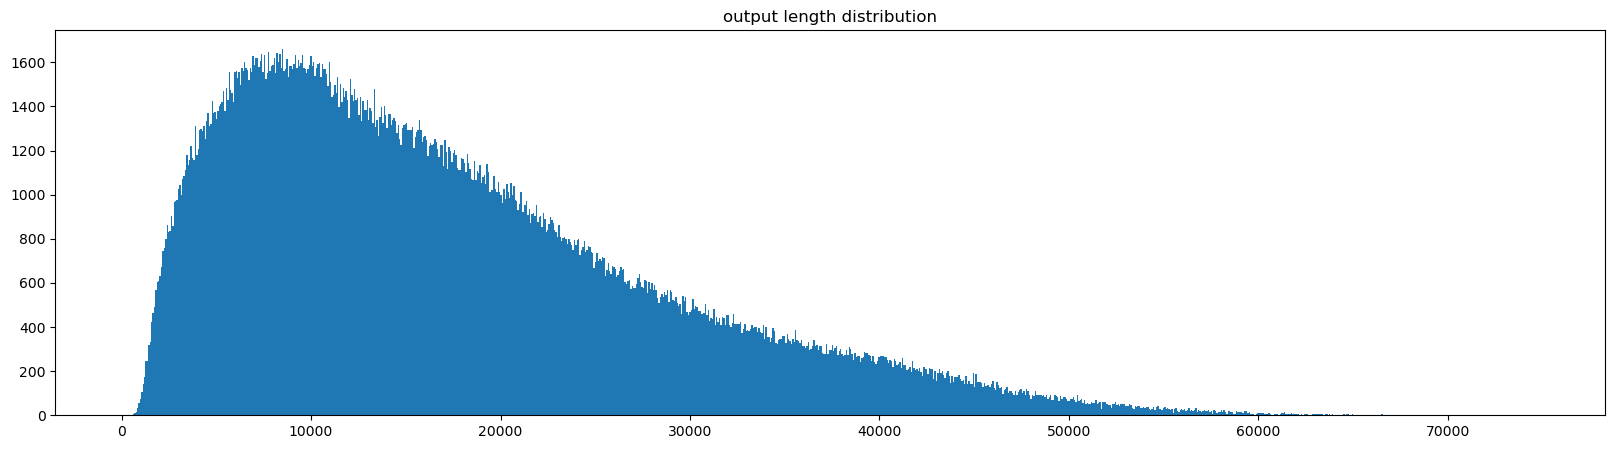

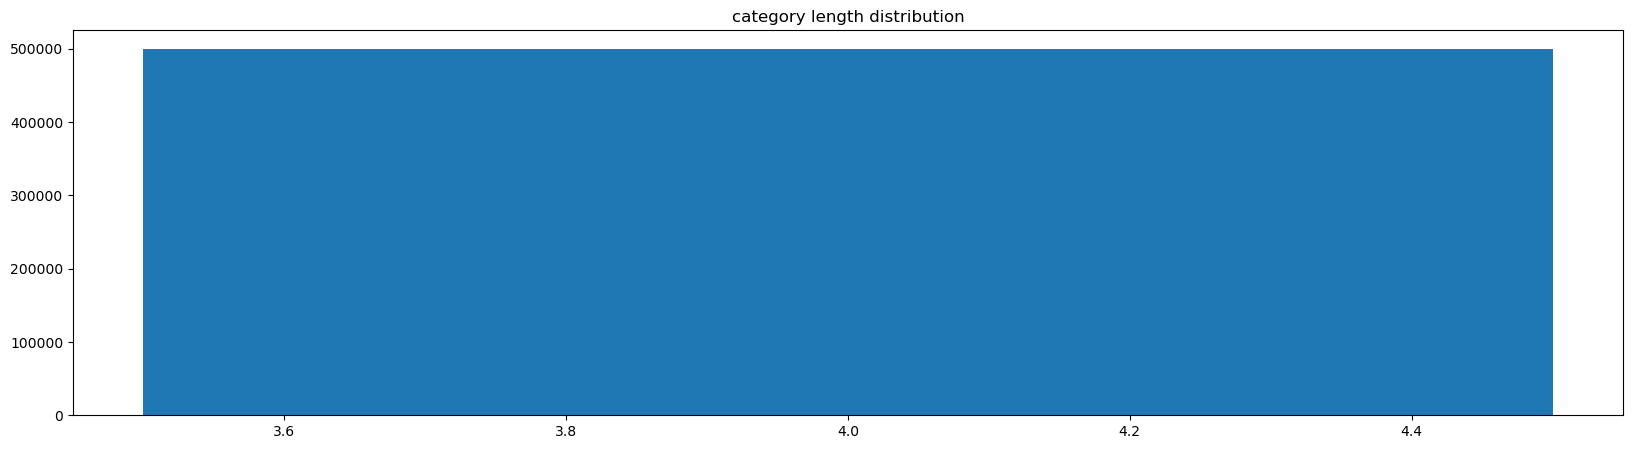

There are 1 category.


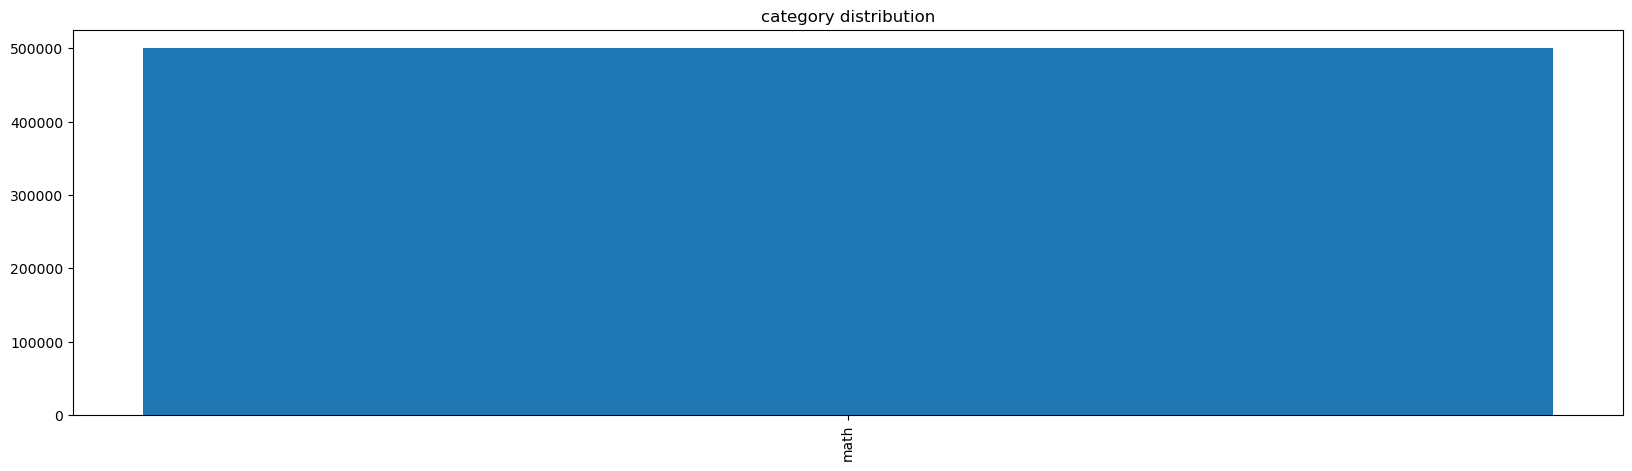

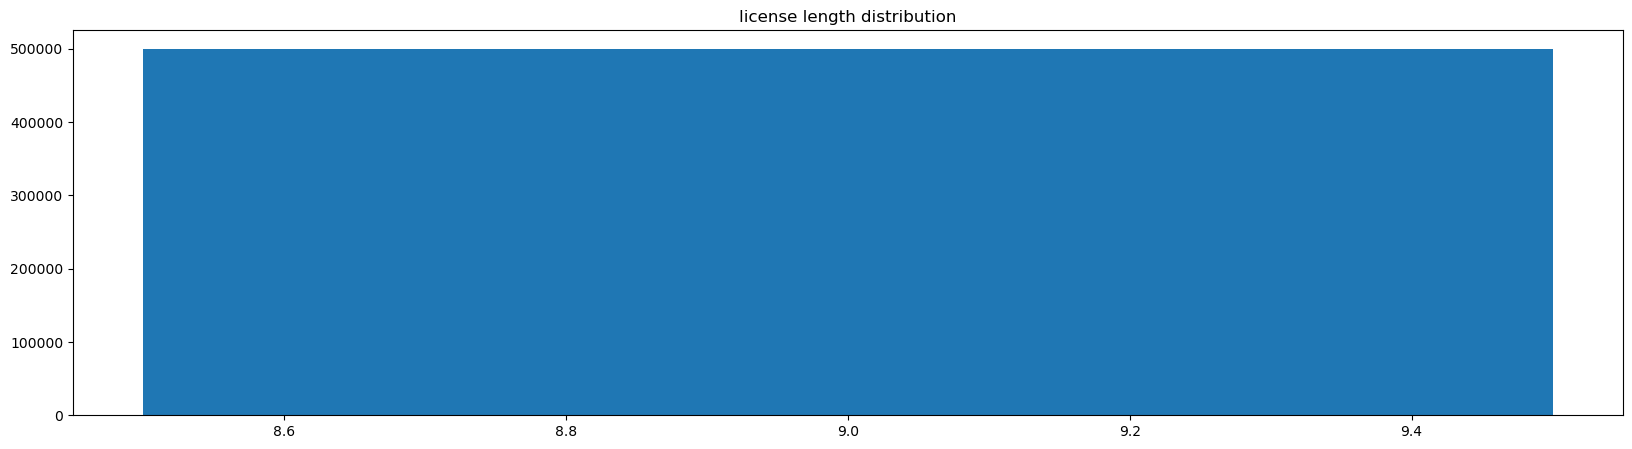

There are 1 license.


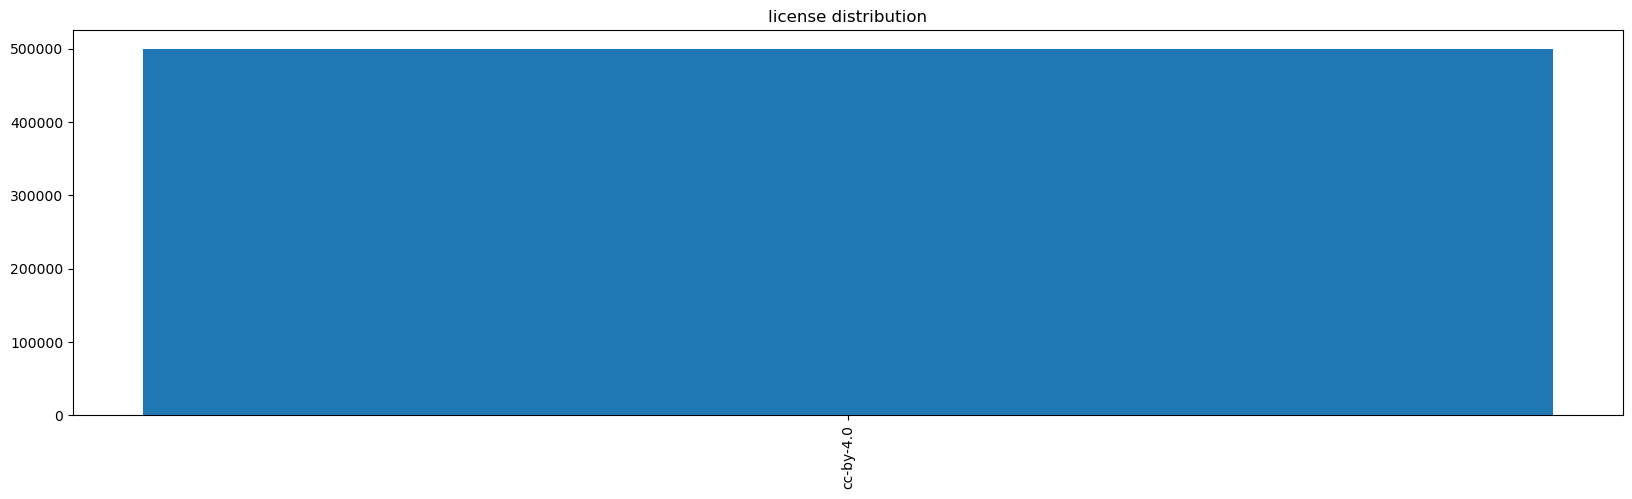

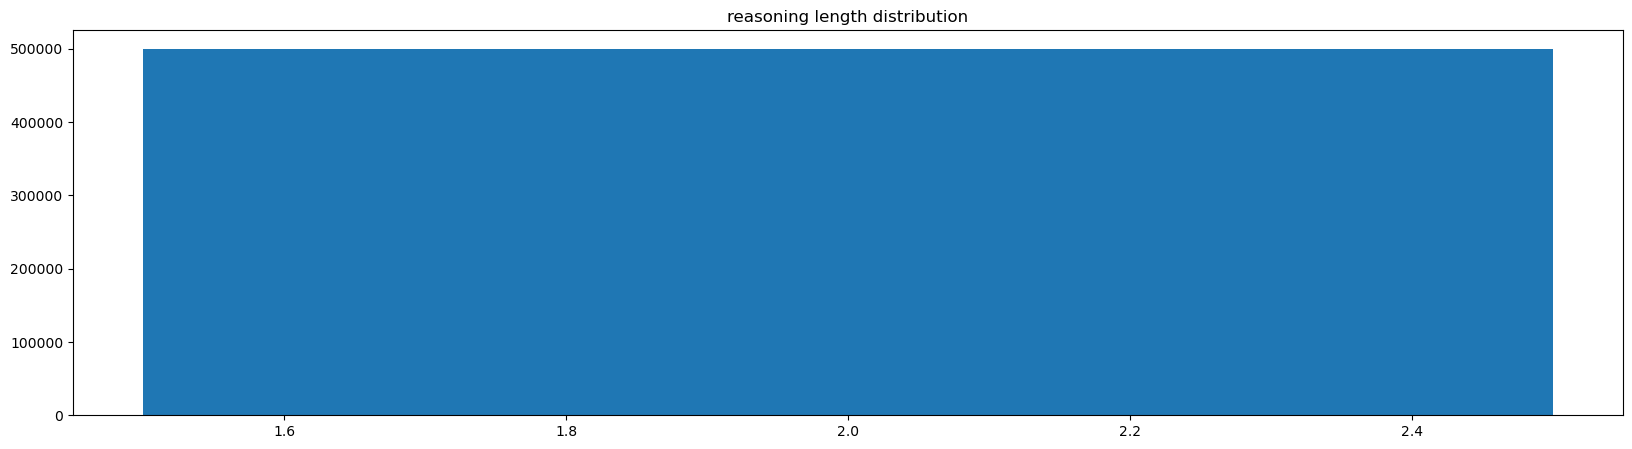

There are 1 reasoning.


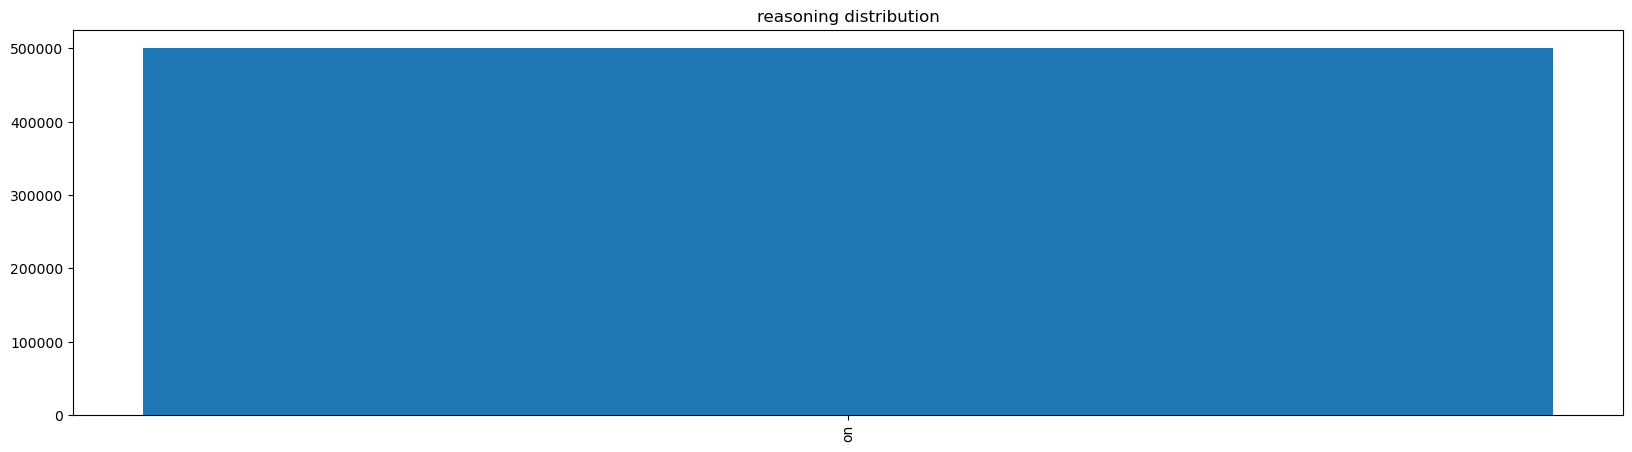

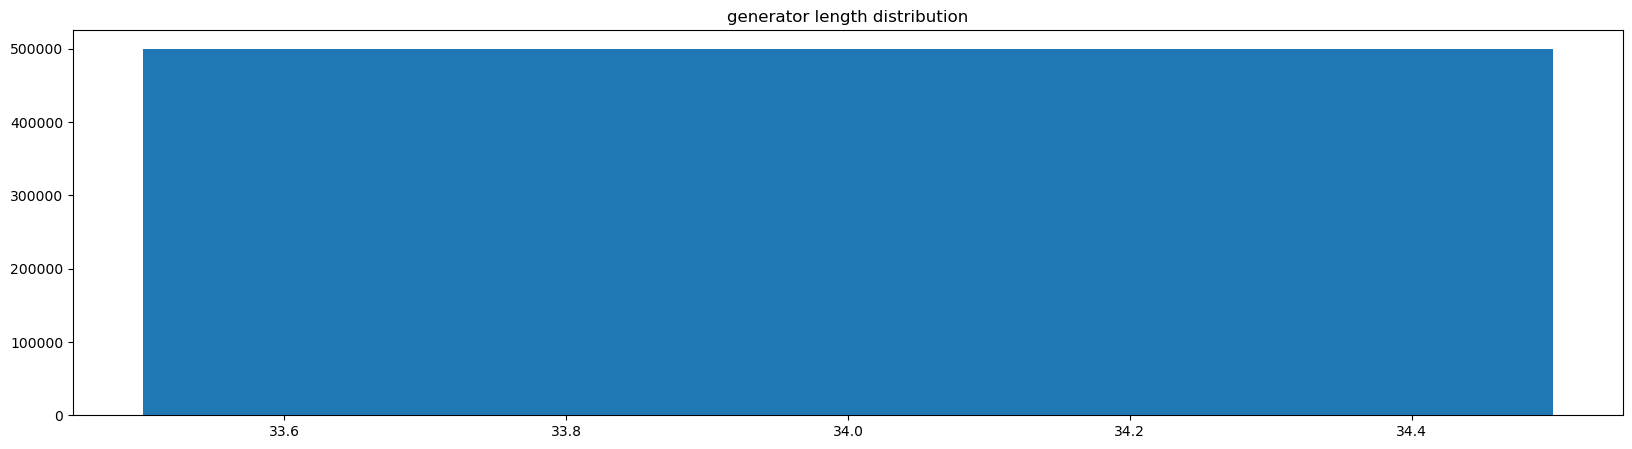

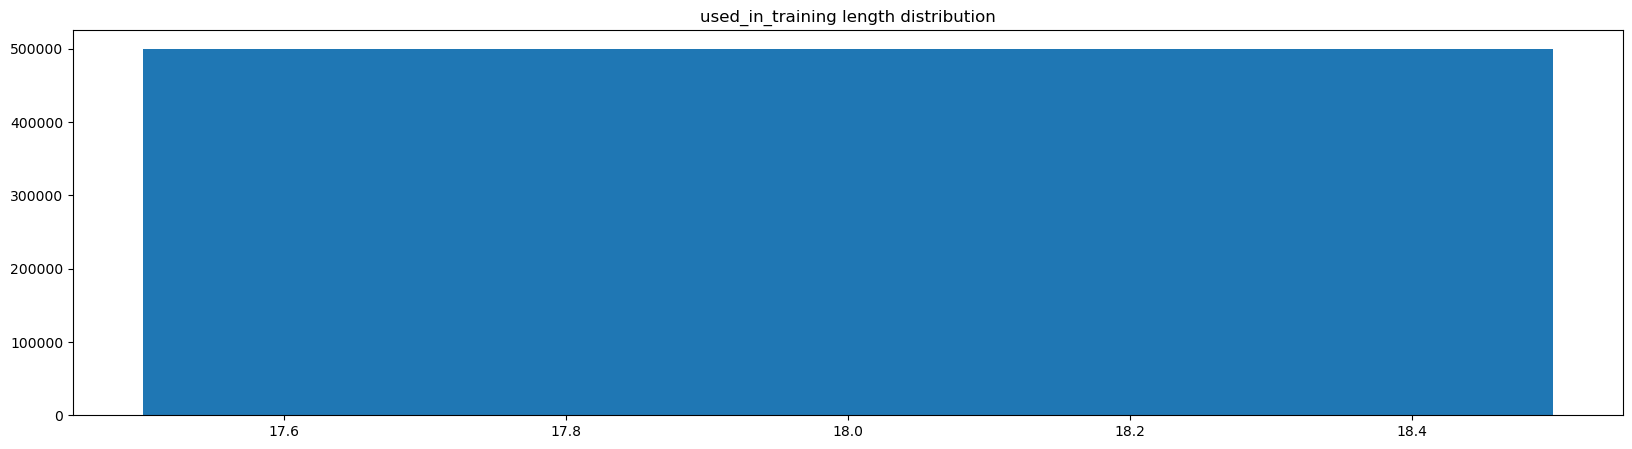

There are 1 used_in_training.


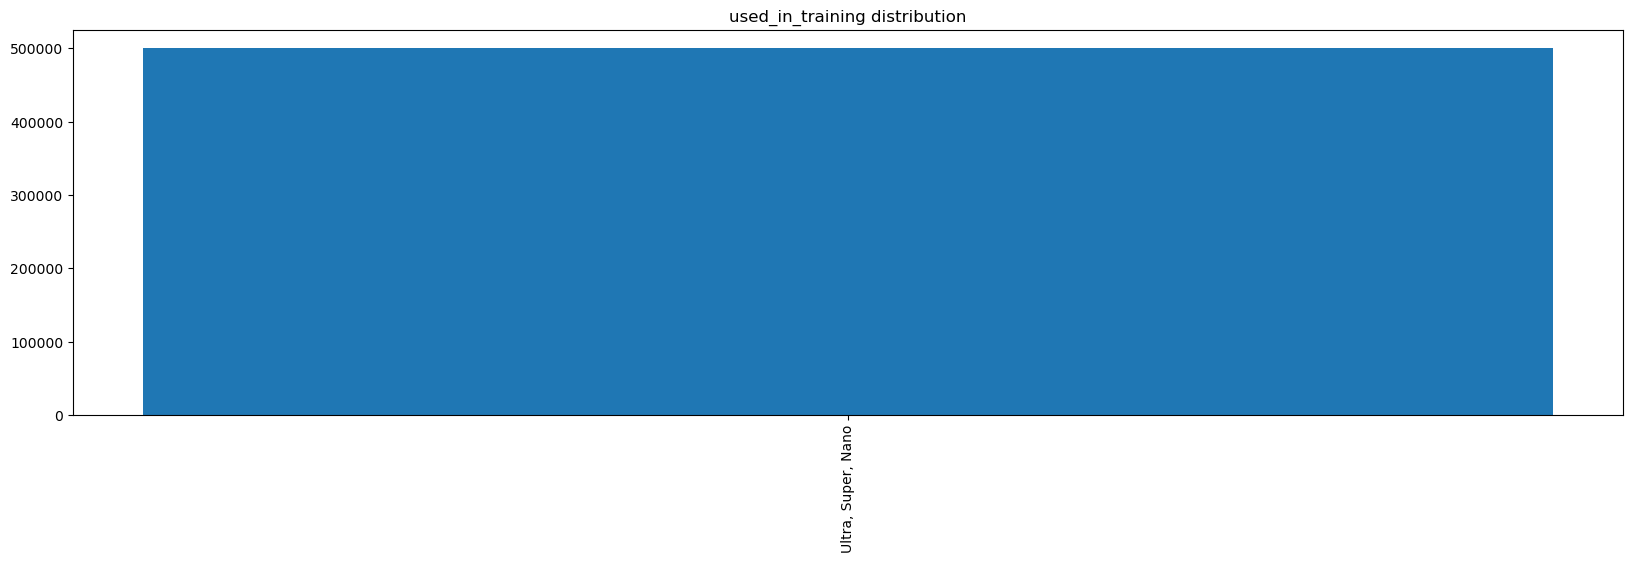

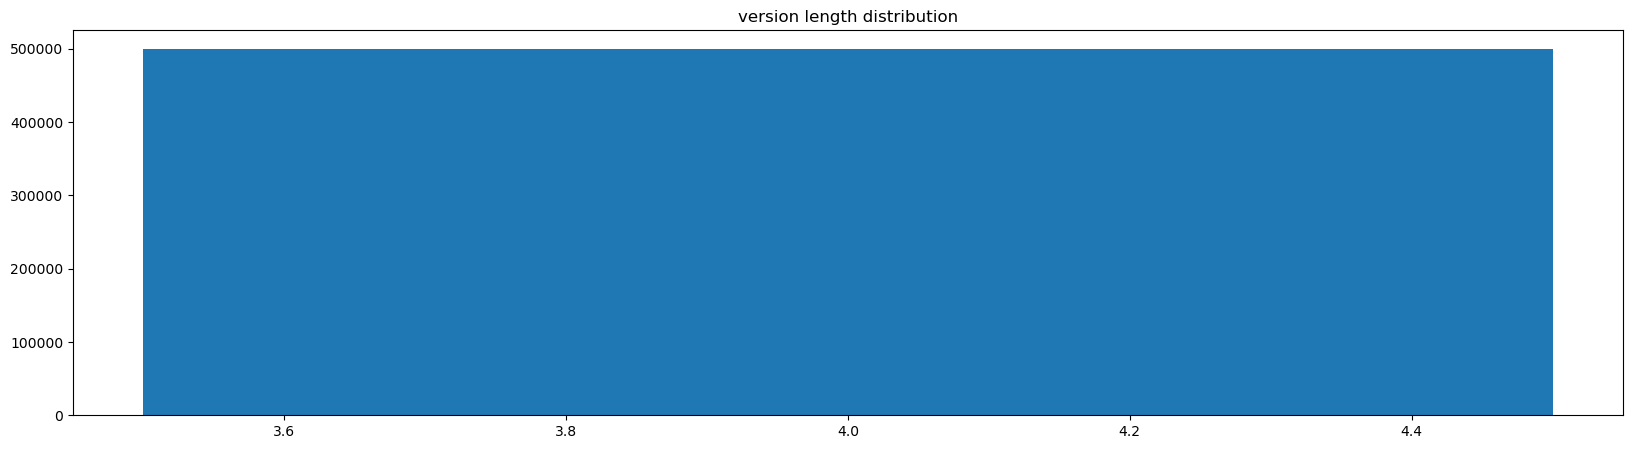

There are 1 version.


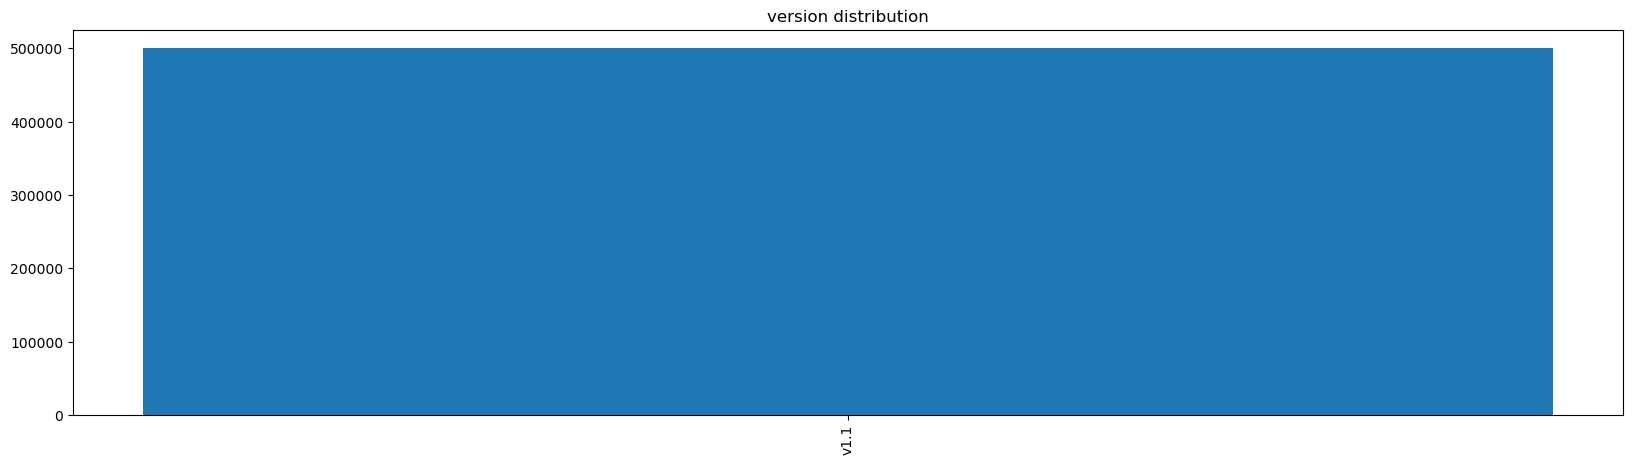

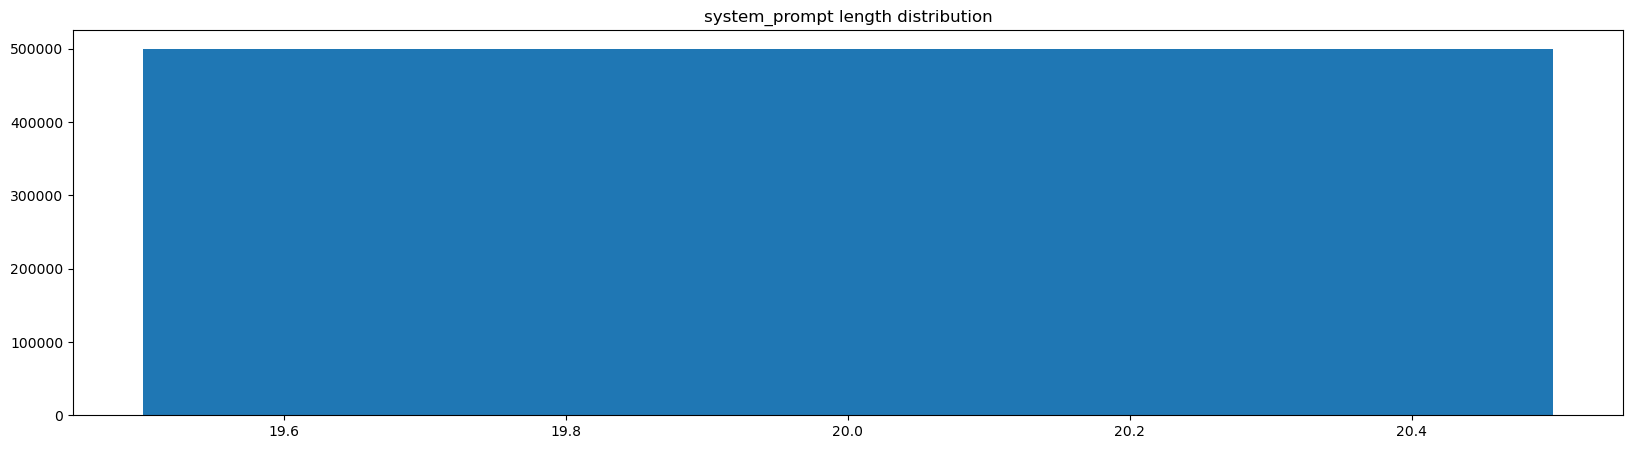

There are 1 system_prompt.


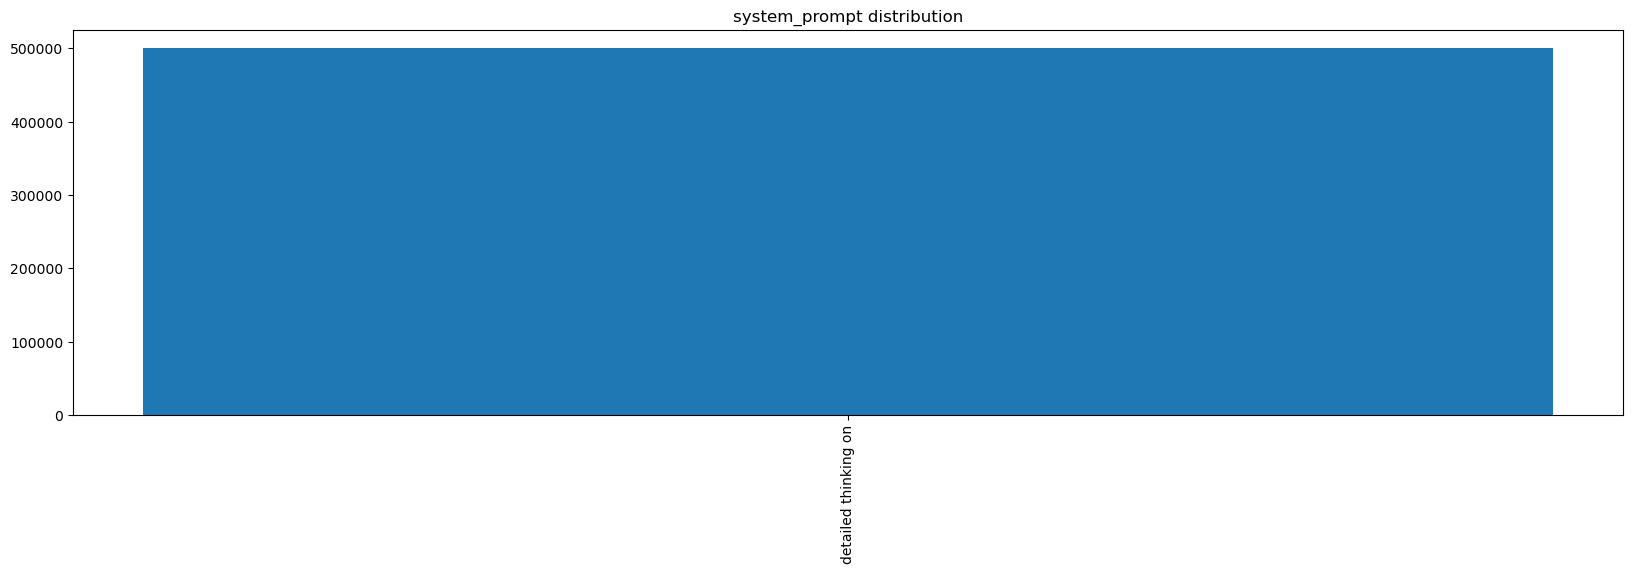

In [5]:
llama_nemotron = load_data("Llama-Nemotron-Post-Training-Dataset")

llama_nemotron = llama_nemotron.add_column("role", [x[0]["role"] for x in llama_nemotron["input"]])
llama_nemotron = llama_nemotron.add_column("content", [x[0]["content"] for x in llama_nemotron["input"]])

print_distributions(llama_nemotron.select(range(500000)), ['role', 'content', 'output', 'category', 'license', 'reasoning', 'generator', 'used_in_training', 'version', 'system_prompt'])

### MegaMath-Web-Pro

Features: ['text', 'cc-path', 'domain', 'lang', 'lang_score', 'timestamp', 'url', 'math_score', 'timestamp_unformatted']
Number of samples: 163968
Sample: {
    "cc-path": "CC-MAIN-2024-38/segments/1725700651682.69/warc/CC-MAIN-20240916080220-20240916110220-00716.warc.gz",
    "domain": "wikidoc.org",
    "lang": "en",
    "lang_score": 0.7885941863059998,
    "math_score": 0.9914684891700745,
    "text": "# Scientific Notation\n\nScientific notation is a way of writing numbers that accommodates values too large or small to be conveniently written in standard decimal notation. It has a number of useful properties and is often favored by scientists, mathematicians, and engineers.\n\n## Form of Scientific Notation\n\nIn scientific notation, numbers are written in the form: $a \\times 10^b$, where the exponent $b$ is an integer, and the coefficient $a$ is any real number, called the significand or mantissa.\n\n## Normalized Notation\n\nAny given number can be written in the form $a \\time

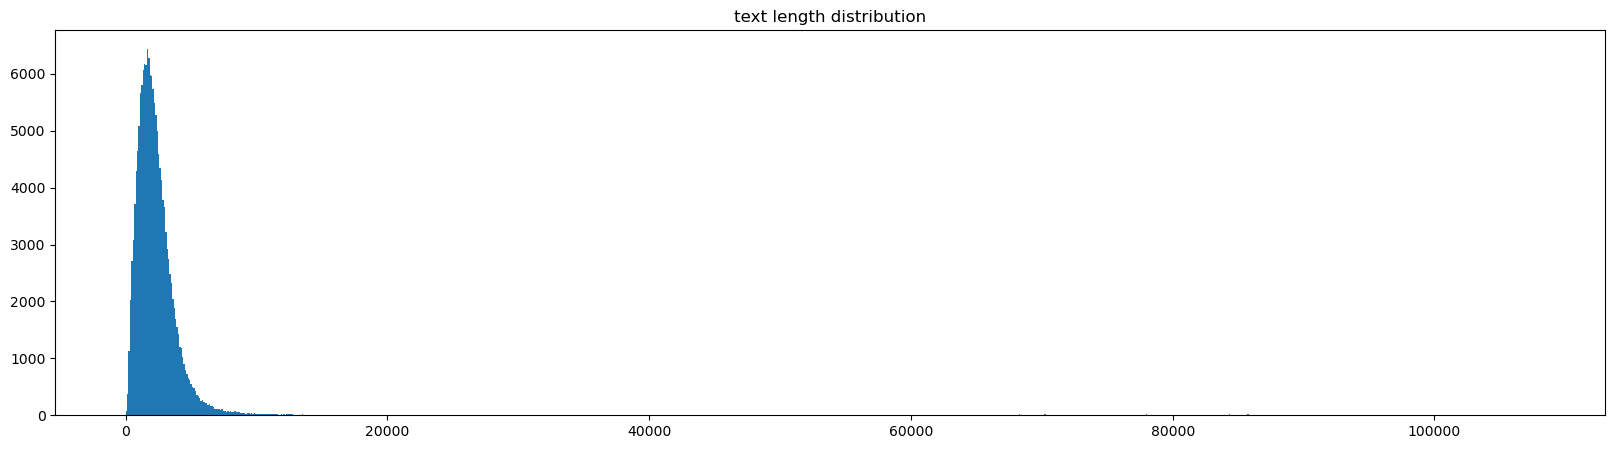

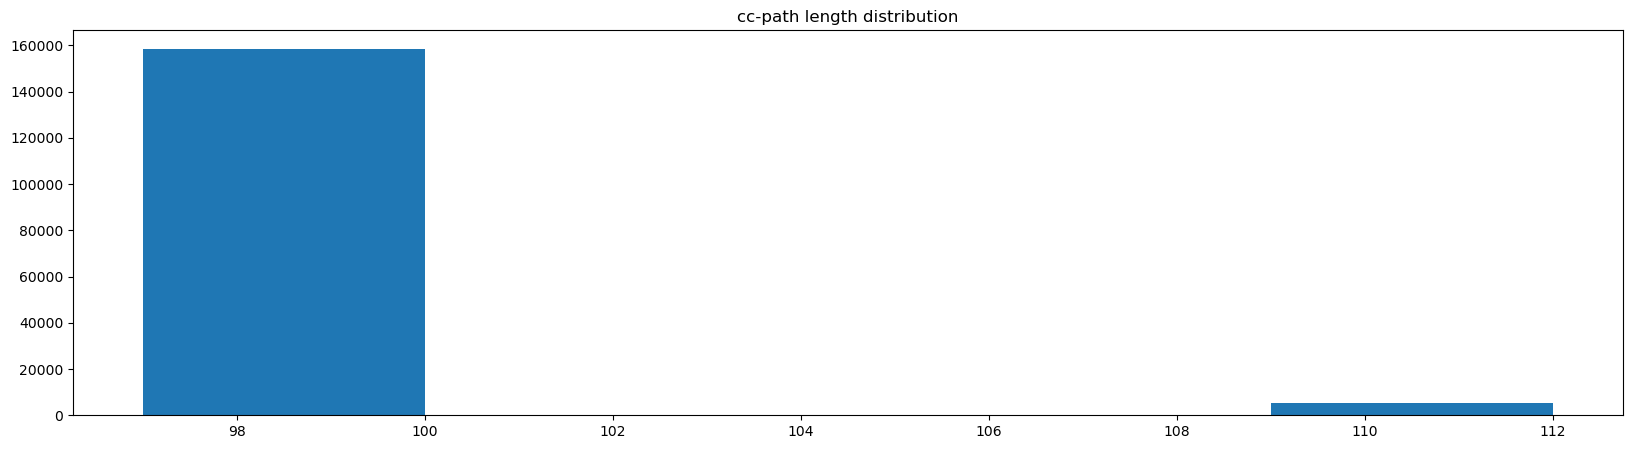

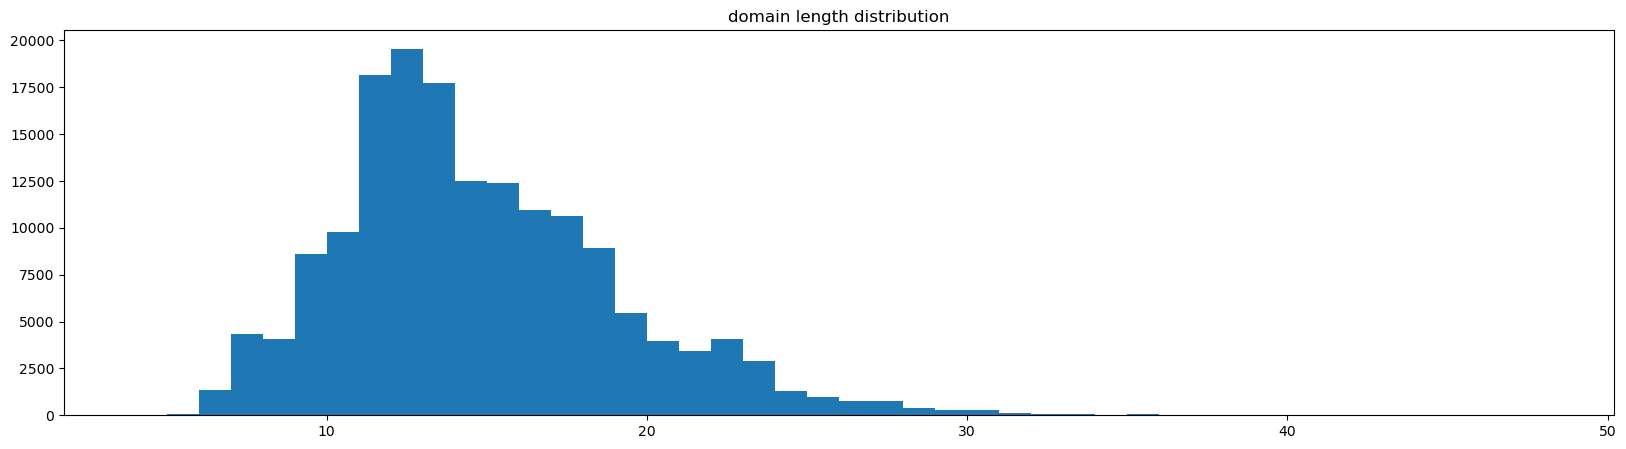

There are 33910 domain.


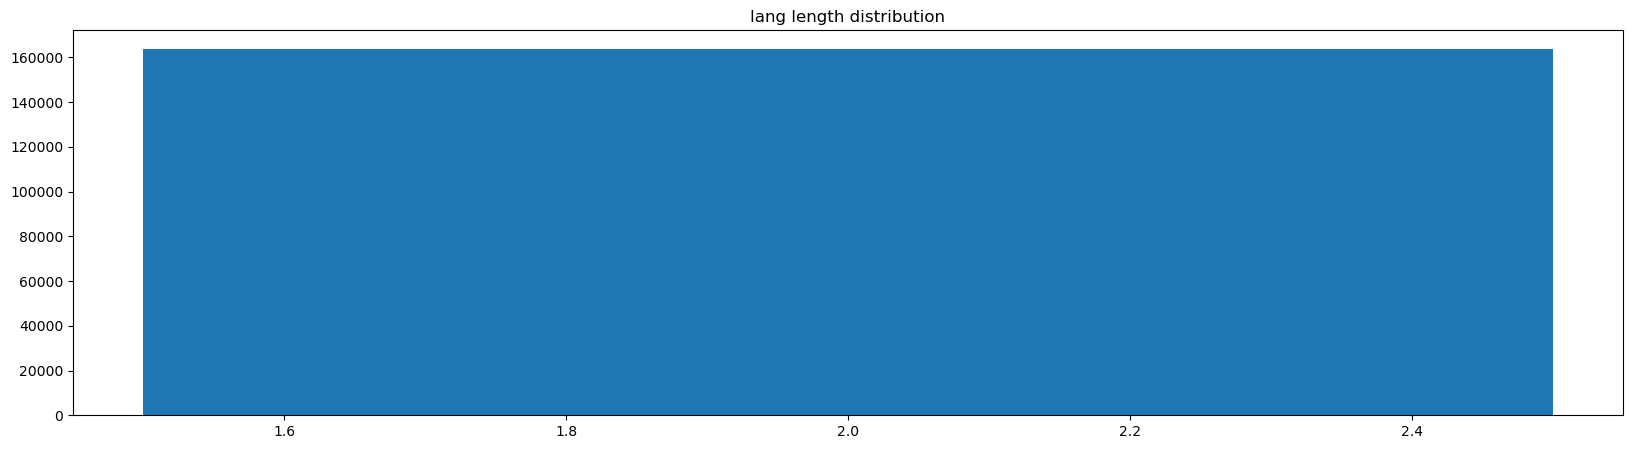

There are 1 lang.


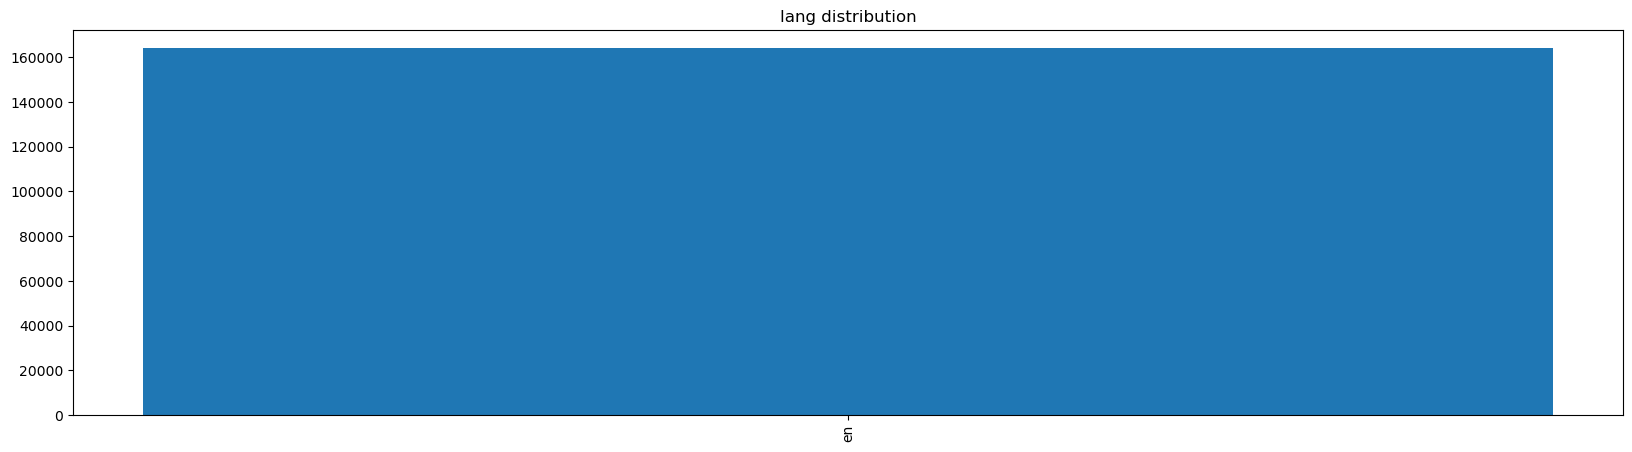

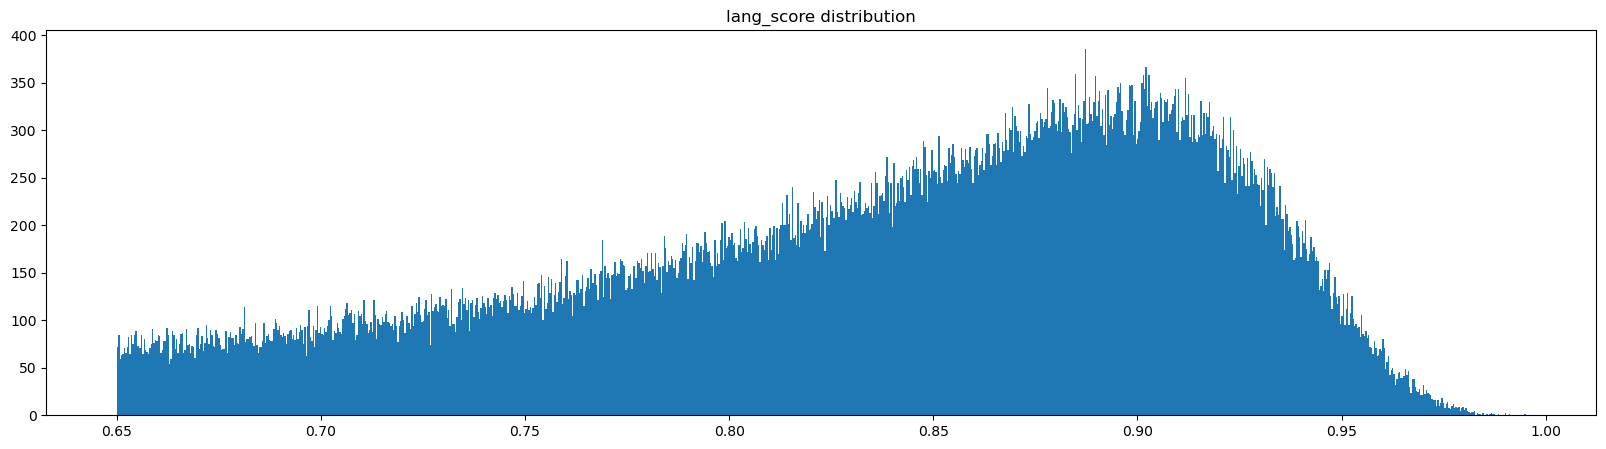

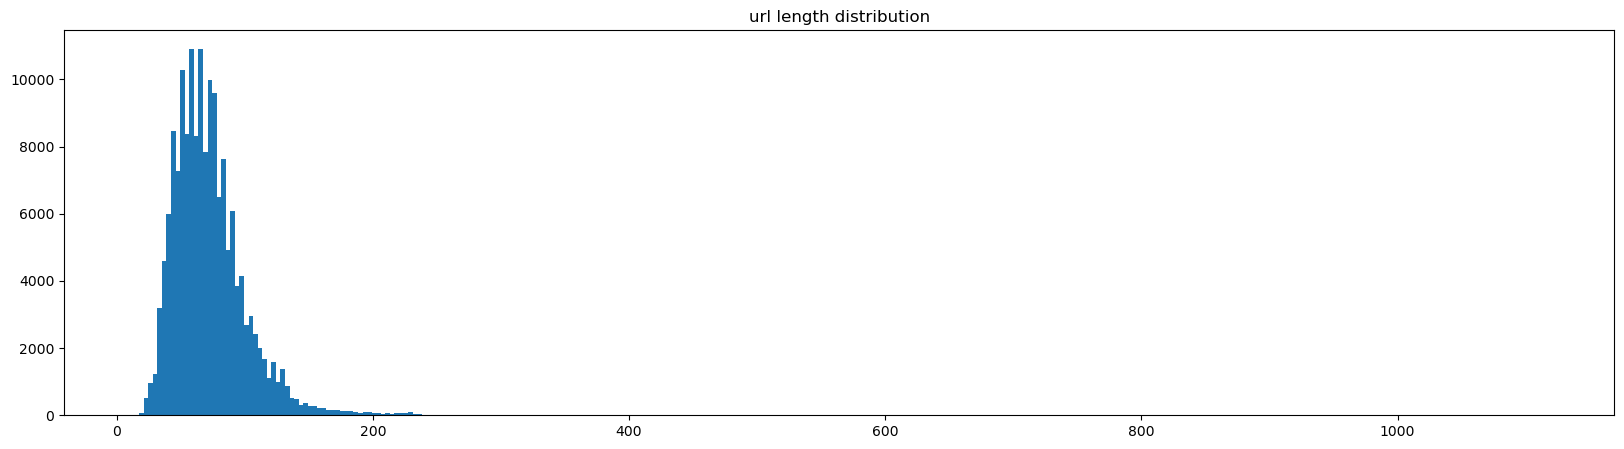

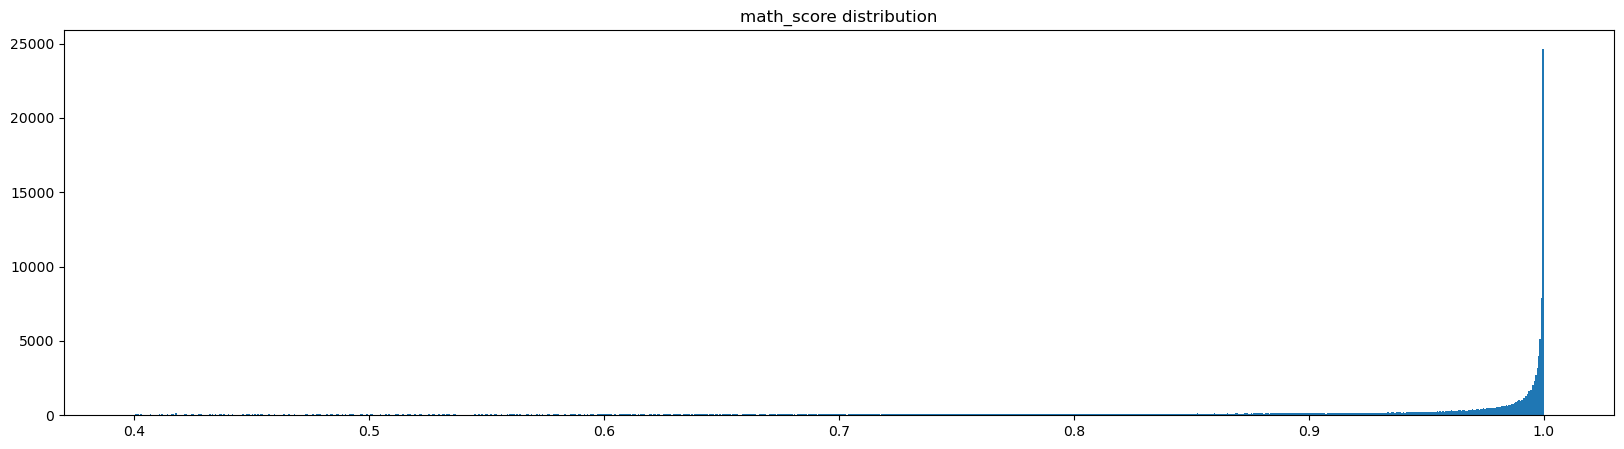

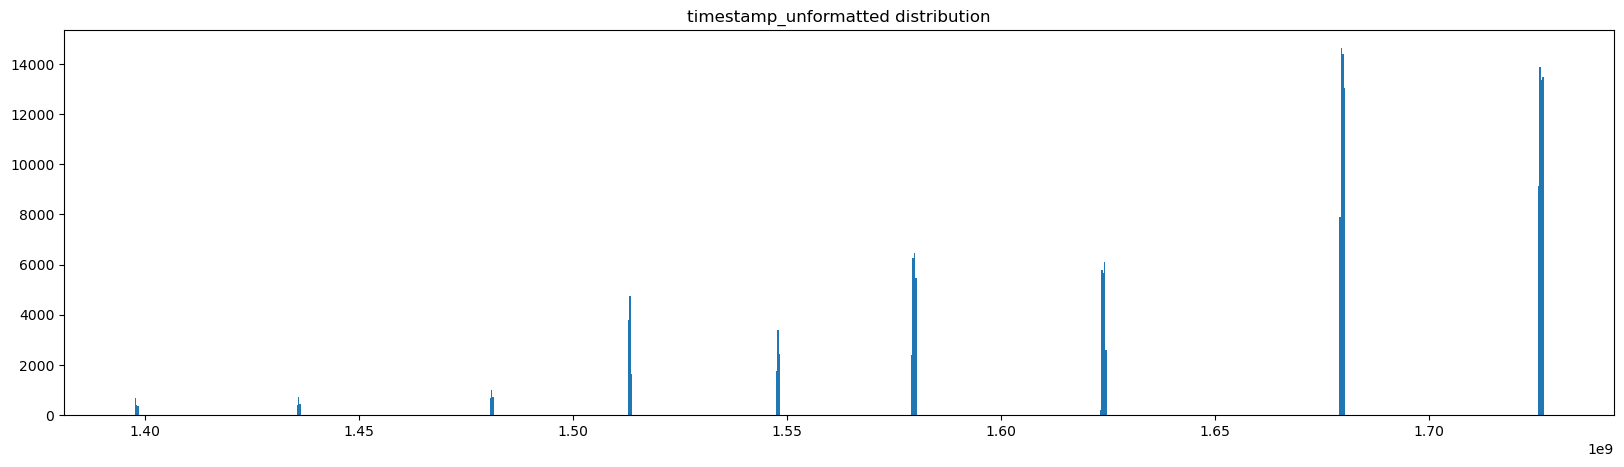

In [6]:
megamath_web_pro = load_data("MegaMath")

megamath_web_pro = megamath_web_pro.add_column(
    "timestamp_unformatted",
    [(datetime.strptime(ts, '%Y-%m-%dT%H:%M:%SZ') - datetime(1970, 1, 1)).total_seconds() for ts in megamath_web_pro["timestamp"]]
)

print_distributions(megamath_web_pro, ['text', 'cc-path', 'domain', 'lang', 'lang_score', 'url', 'math_score', 'timestamp_unformatted'])

### NuminaMath 1.5

Features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic']
Number of samples: 298739
Sample: {
    "answer": "\\text{B}",
    "problem": "Given the specific proposition p: $\\exists x \\in \\mathbb{R}, 2x+1 \\leq 0$. The negation of proposition p is ( )\nA: $\\exists x \\in \\mathbb{R}, 2x+1 > 0$\nB: $\\forall x \\in \\mathbb{R}, 2x+1 > 0$\nC: $\\exists x \\in \\mathbb{R}, 2x+1 \\geq 0$\nD: $\\forall x \\in \\mathbb{R}, 2x+1 \\geq 0$",
    "problem_is_valid": "Yes",
    "problem_type": "Algebra",
    "question_type": "MCQ",
    "solution": "According to the problem, p: $\\exists x \\in \\mathbb{R}, 2x+1 \\leq 0$ is a specific proposition;  \nCombining that a specific proposition is the negation of a universal proposition,  \nits negation is $\\forall x \\in \\mathbb{R}, 2x+1 > 0$;  \nTherefore, the correct choice is $\\boxed{\\text{B}}$.",
    "solution_is_valid": "Yes",
    "source": "cn_k12",
    "synth

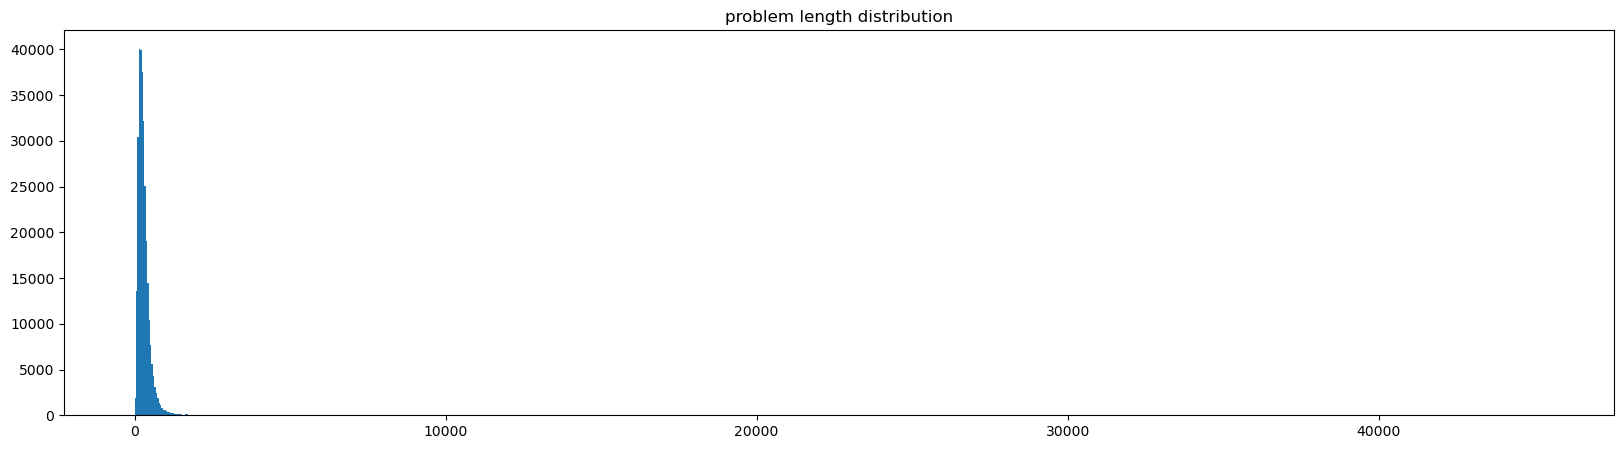

Number of 'None' solution: 32428


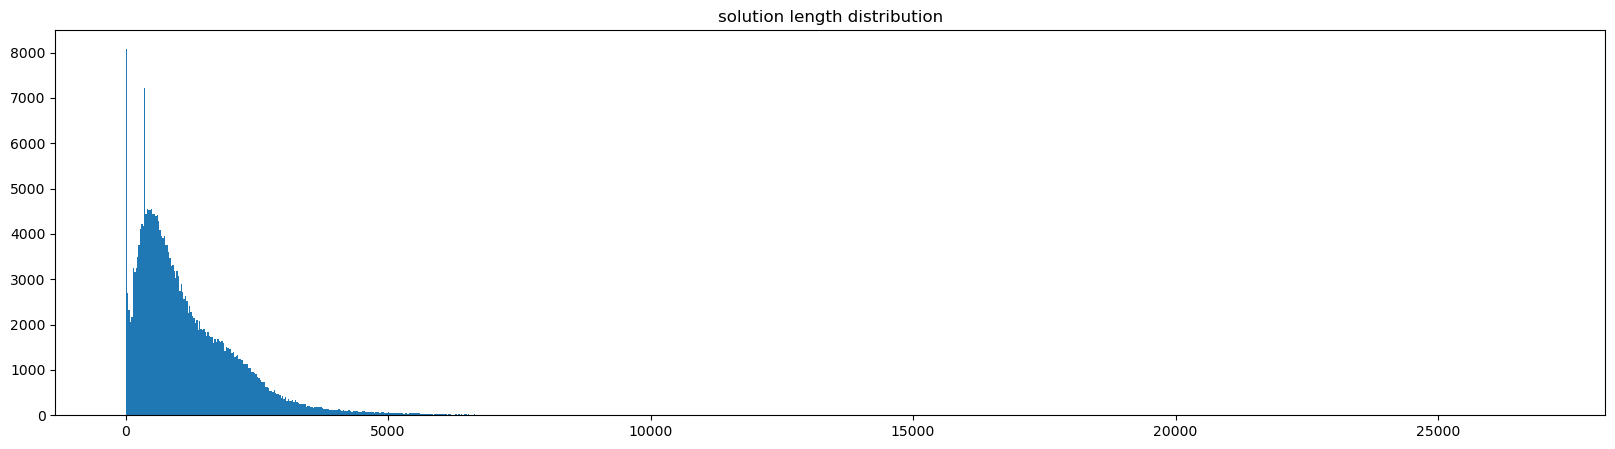

Number of 'None' answer: 48348


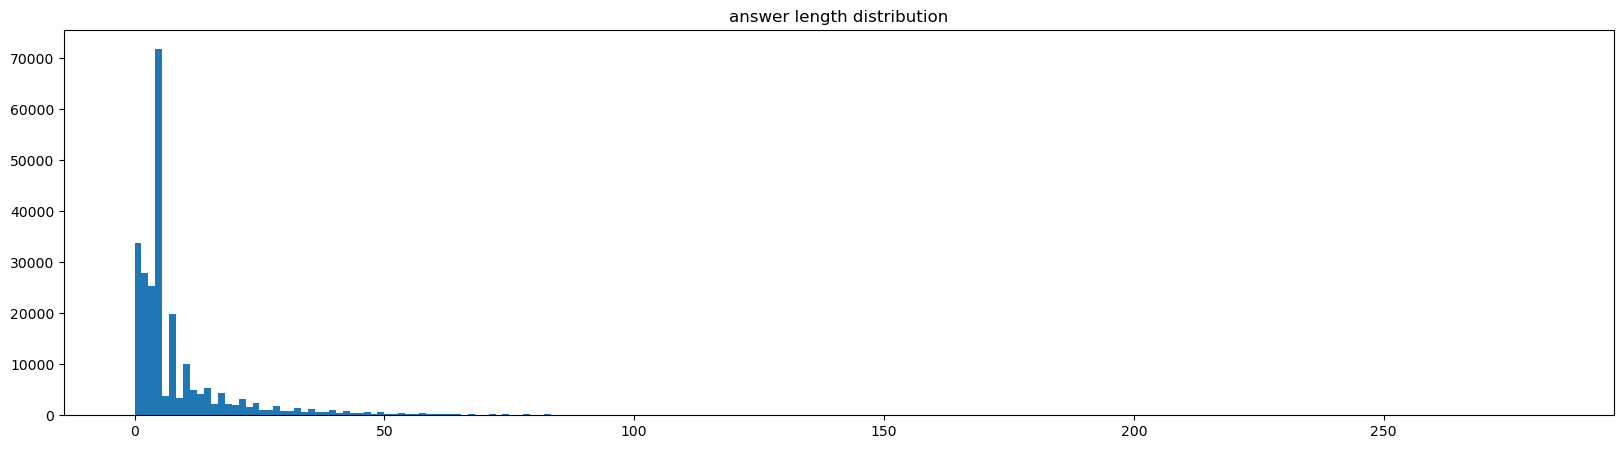

There are 66077 answer.


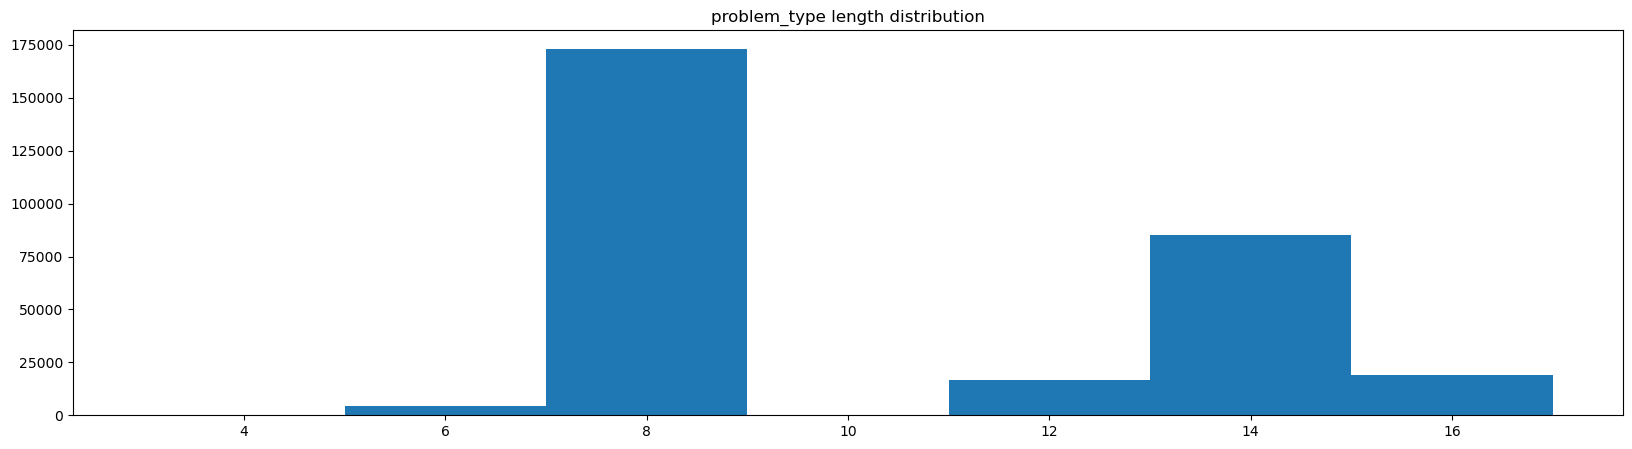

There are 9 problem_type.


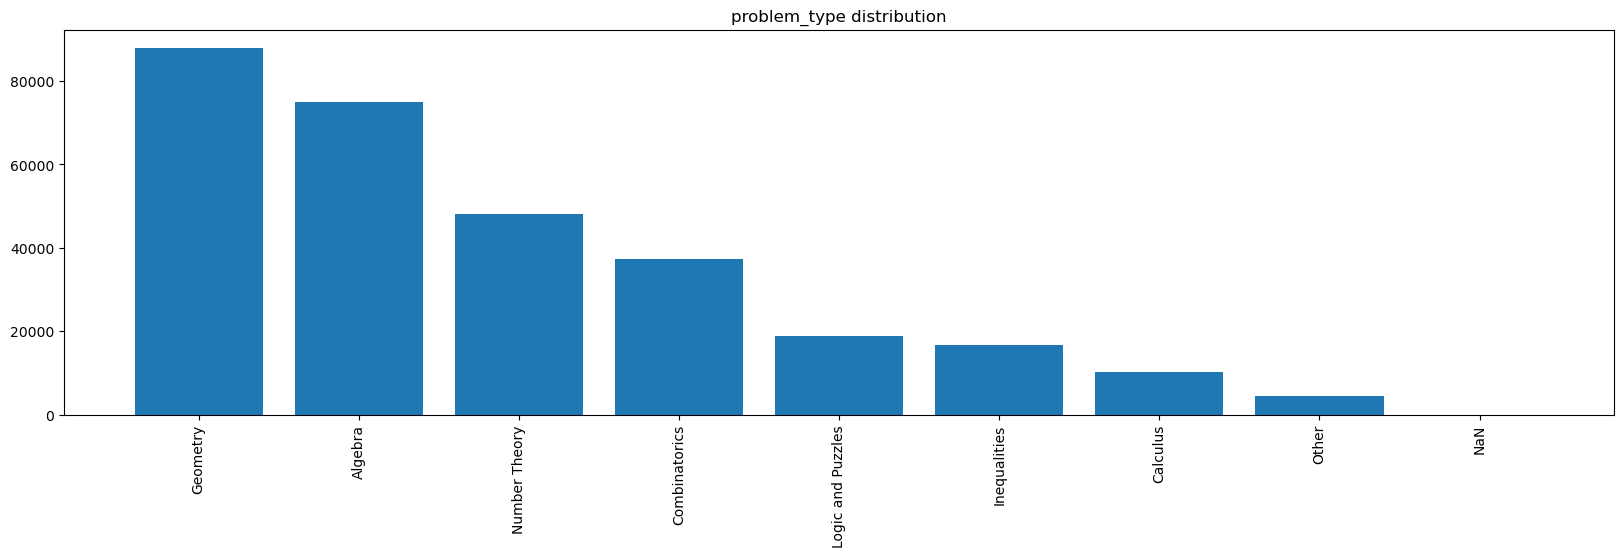

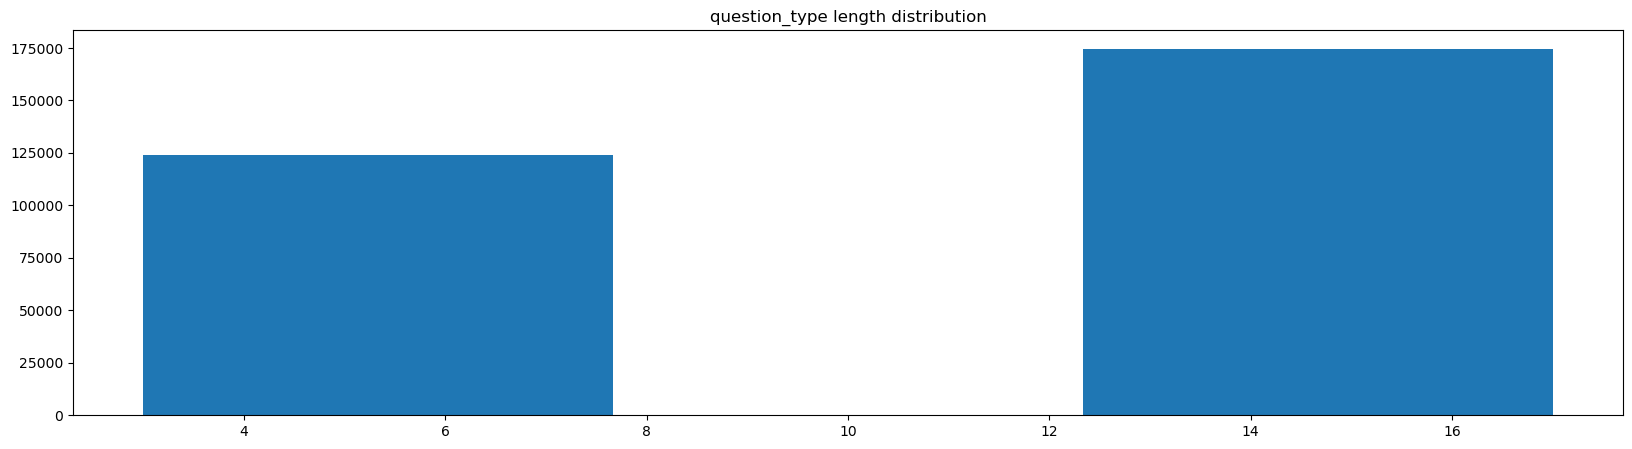

There are 5 question_type.


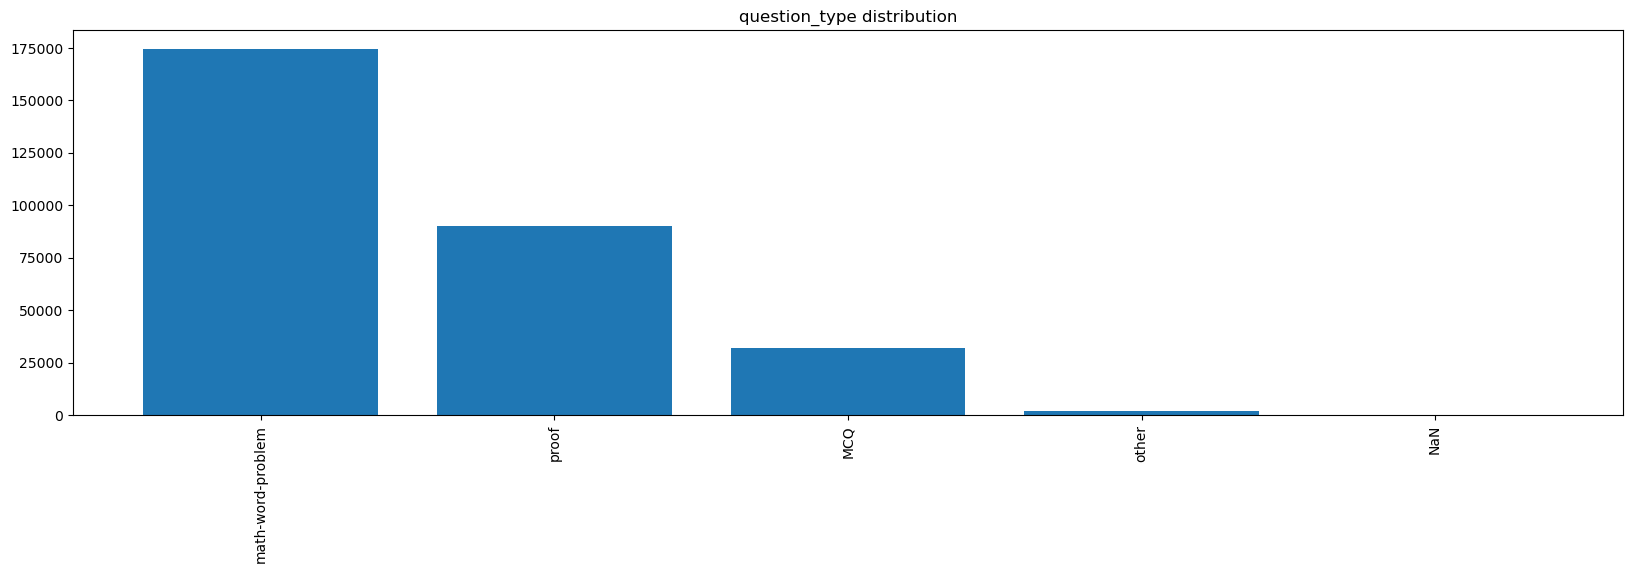

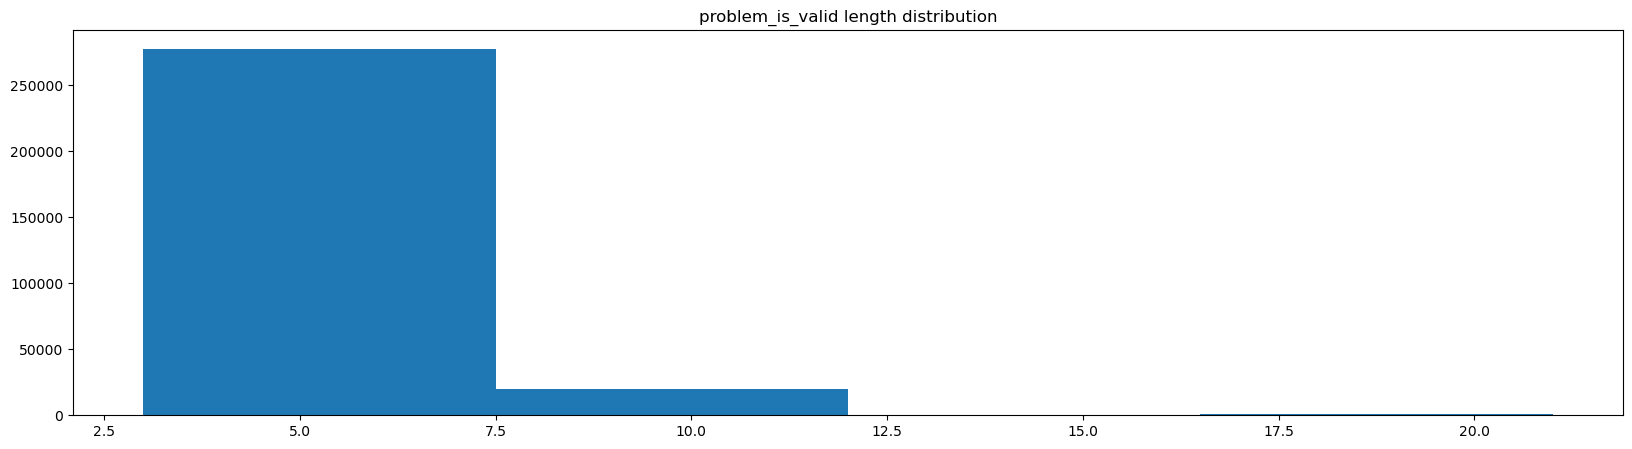

There are 5 problem_is_valid.


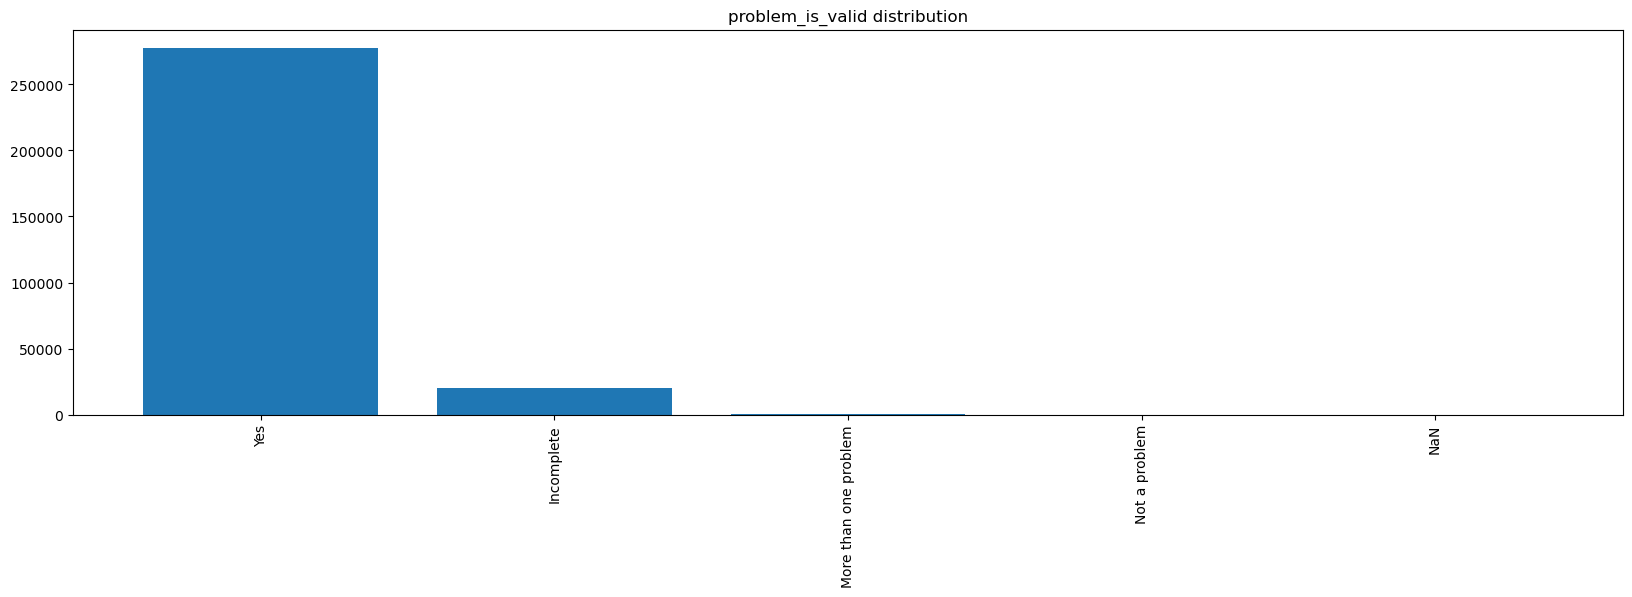

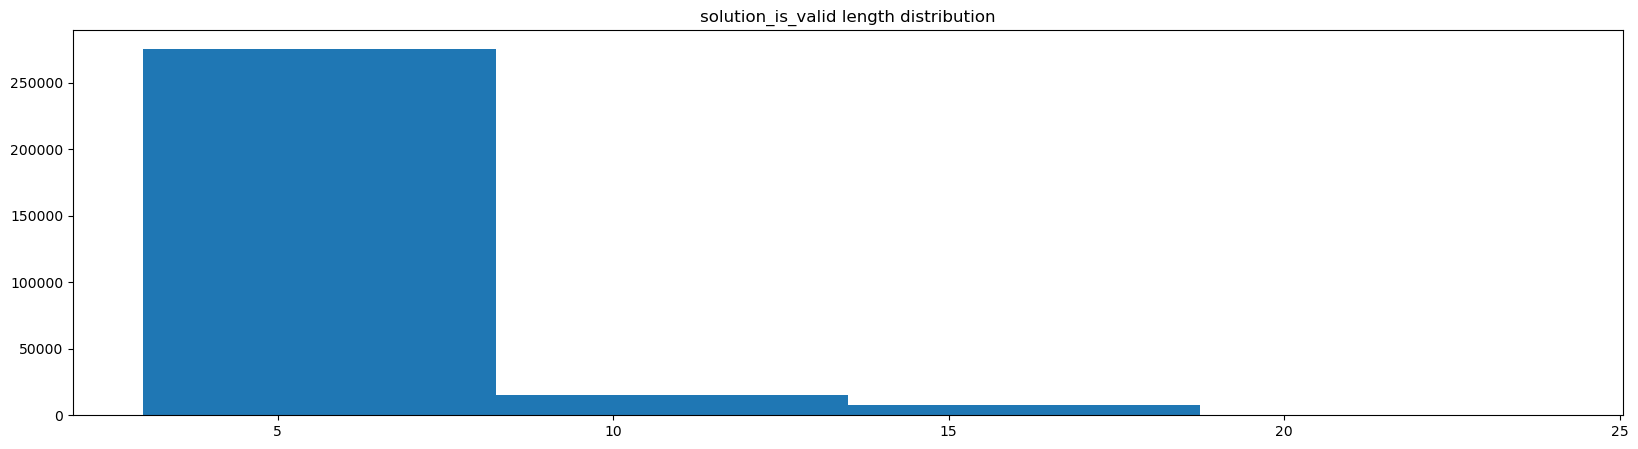

There are 5 solution_is_valid.


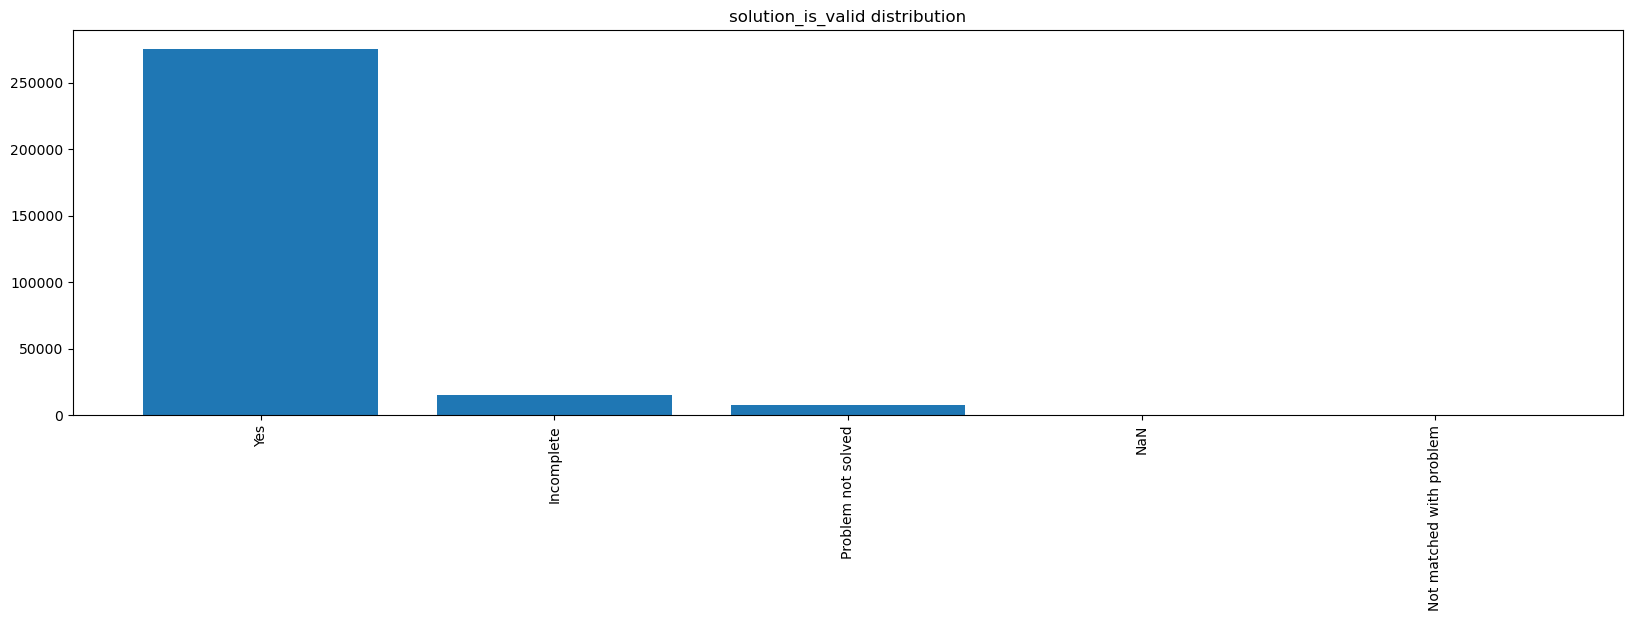

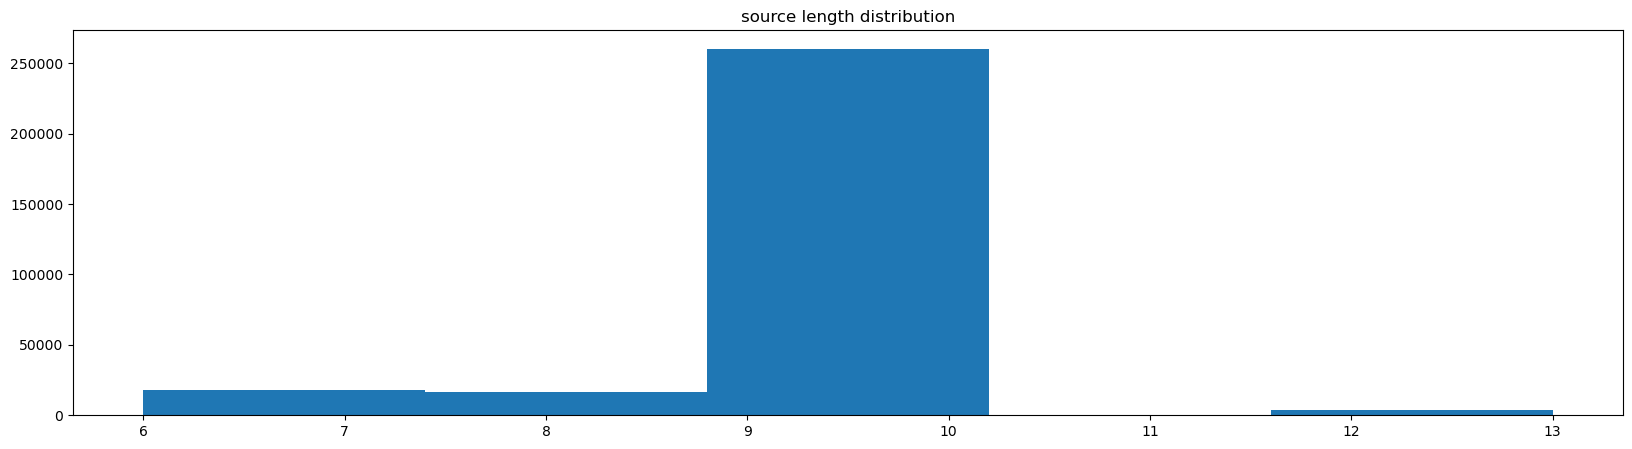

There are 6 source.


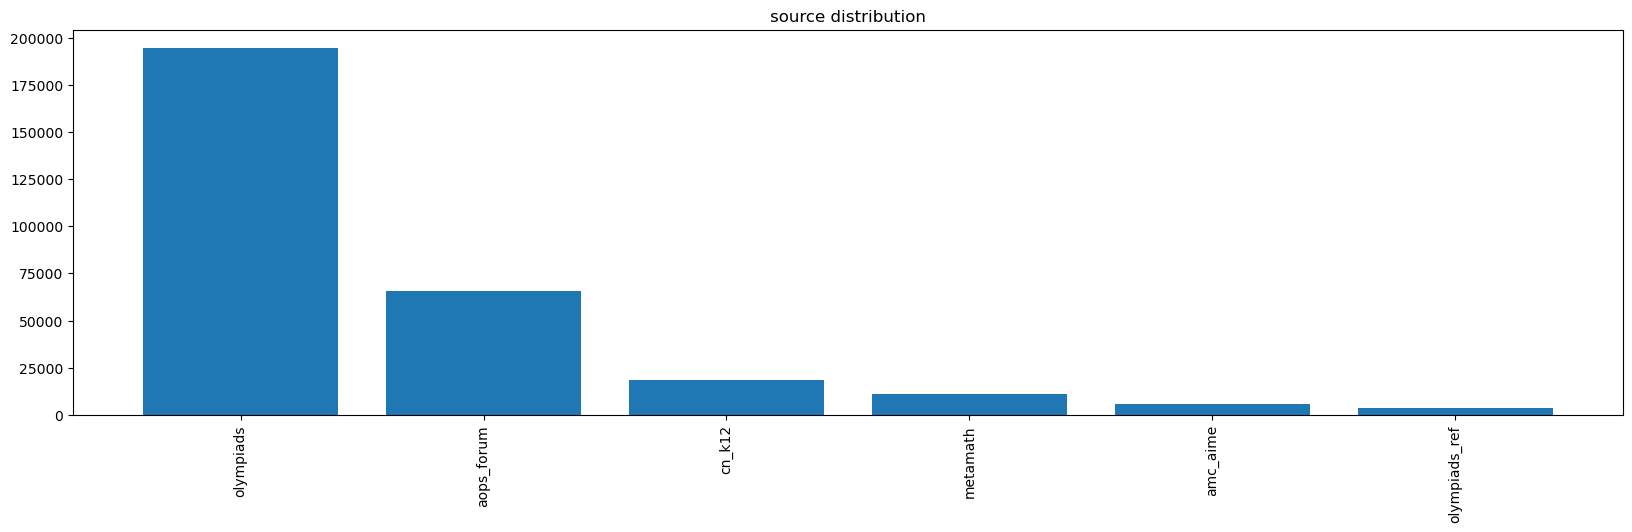

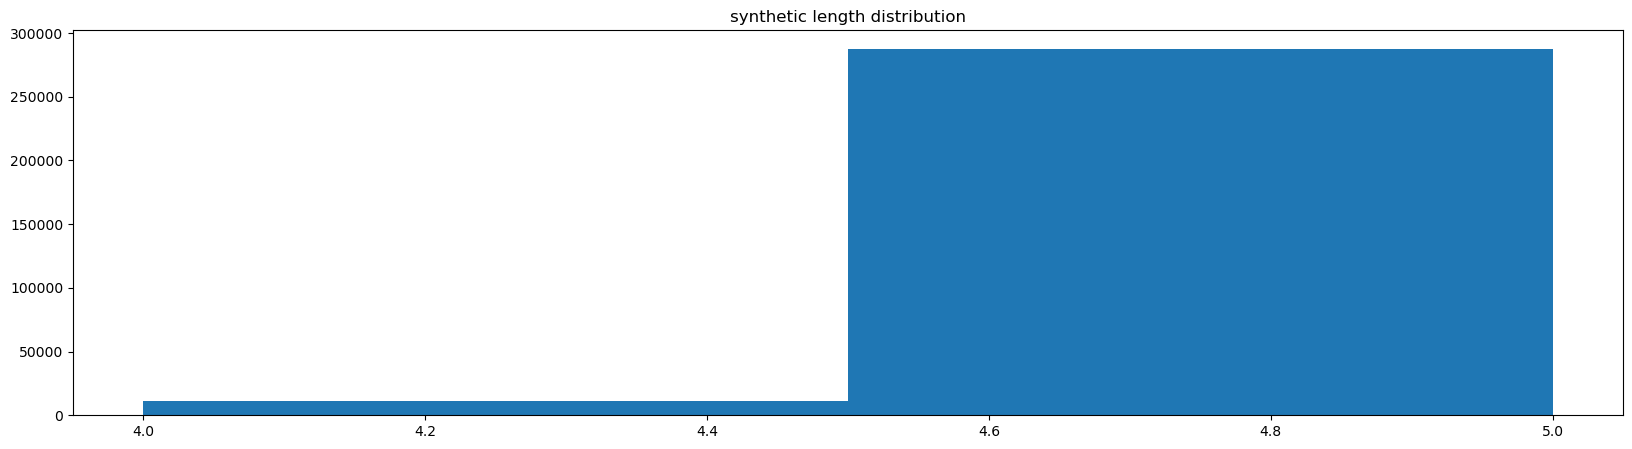

There are 2 synthetic.


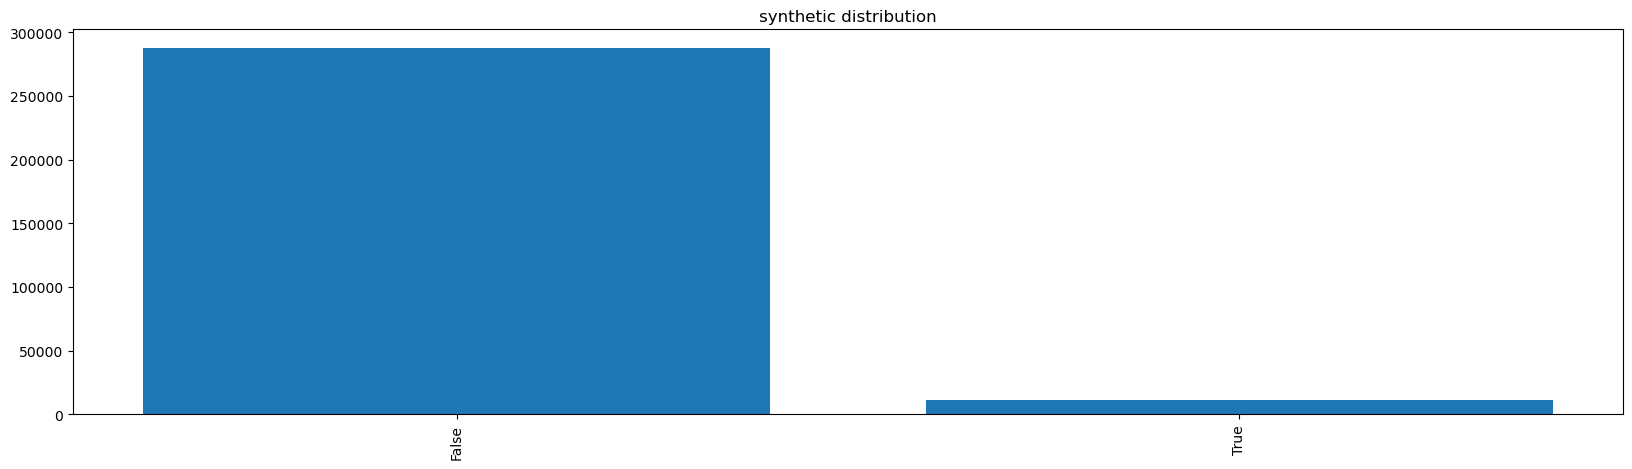

In [7]:
numina_math_1_5 = load_data("NuminaMath-1.5")
print_distributions(numina_math_1_5, ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'])

### Open-R1 Math

Features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'source', 'uuid', 'is_reasoning_complete', 'generations', 'correctness_math_verify', 'correctness_llama', 'finish_reasons', 'correctness_count', 'messages']
Number of samples: 9374
Sample: {
    "answer": "7651",
    "correctness_count": 2,
    "correctness_llama": null,
    "correctness_math_verify": [
        true,
        true
    ],
    "finish_reasons": null,
    "generations": [
        "<think>\nOkay, so I need to find the coefficient of \\( x^{150} \\) in the expansion of \\( (1 + x + x^2 + \\cdots + x^{100})^3 \\). Hmm, let's think about how to approach this.\n\nFirst, I remember that when you expand a polynomial raised to a power, the coefficients can often be found using combinations or stars and bars. But this isn't just any polynomial; it's a truncated one that goes up to \\( x^{100} \\). So instead of an infinite series, we have a finite number of terms. That might complicate things a bit.\n\nLet

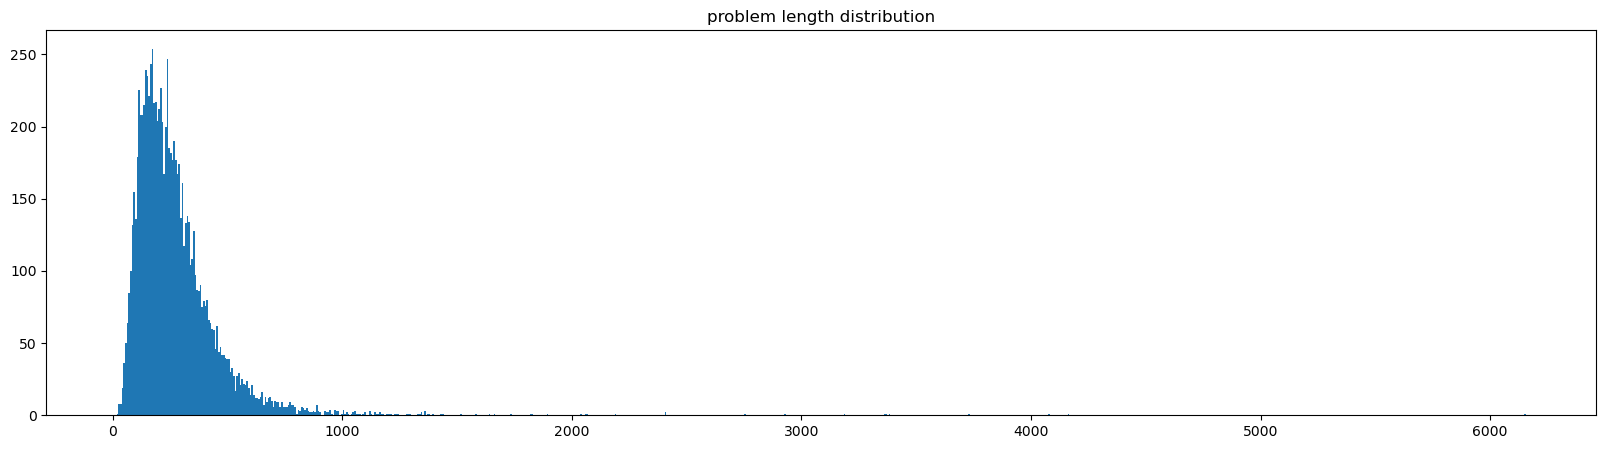

There are 9374 problem.


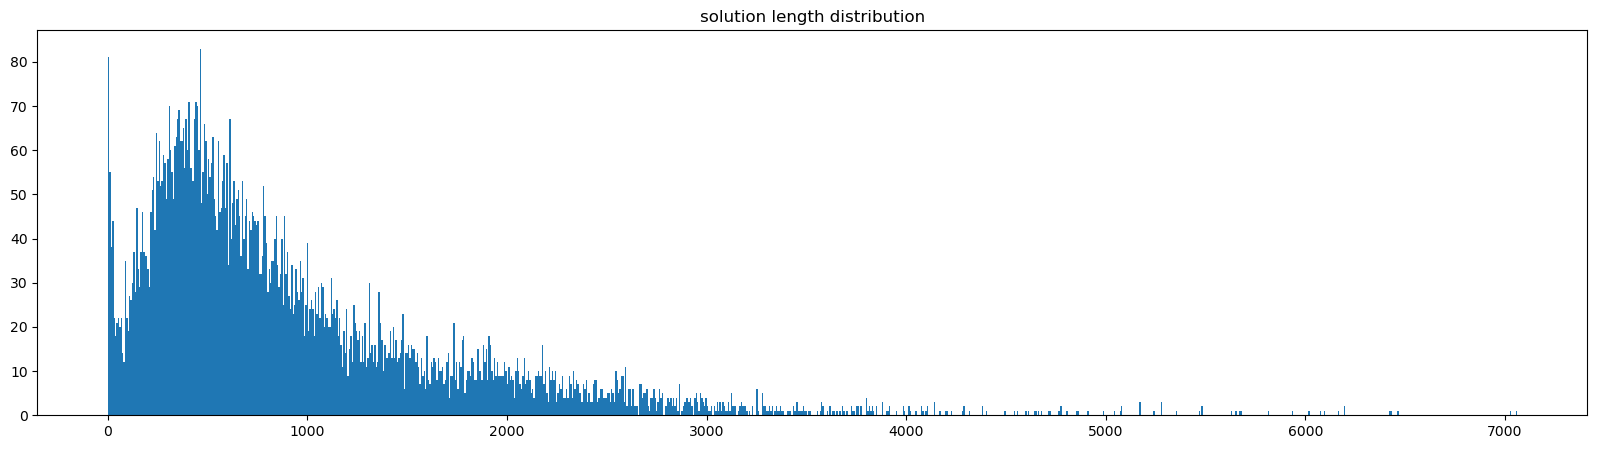

There are 9329 solution.


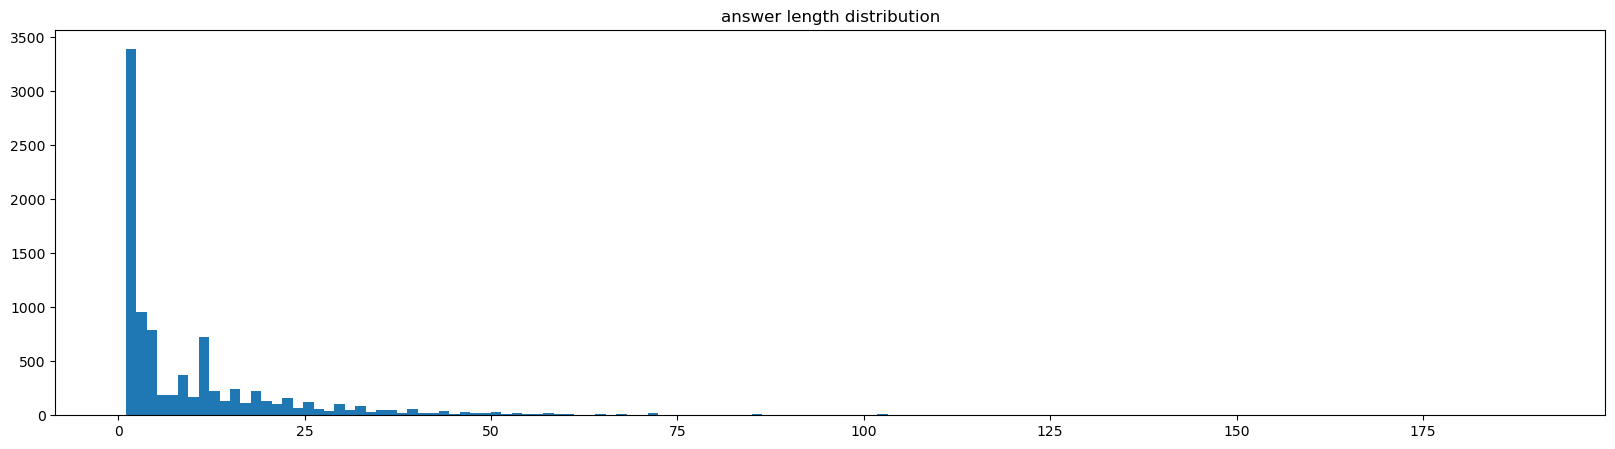

There are 4911 answer.


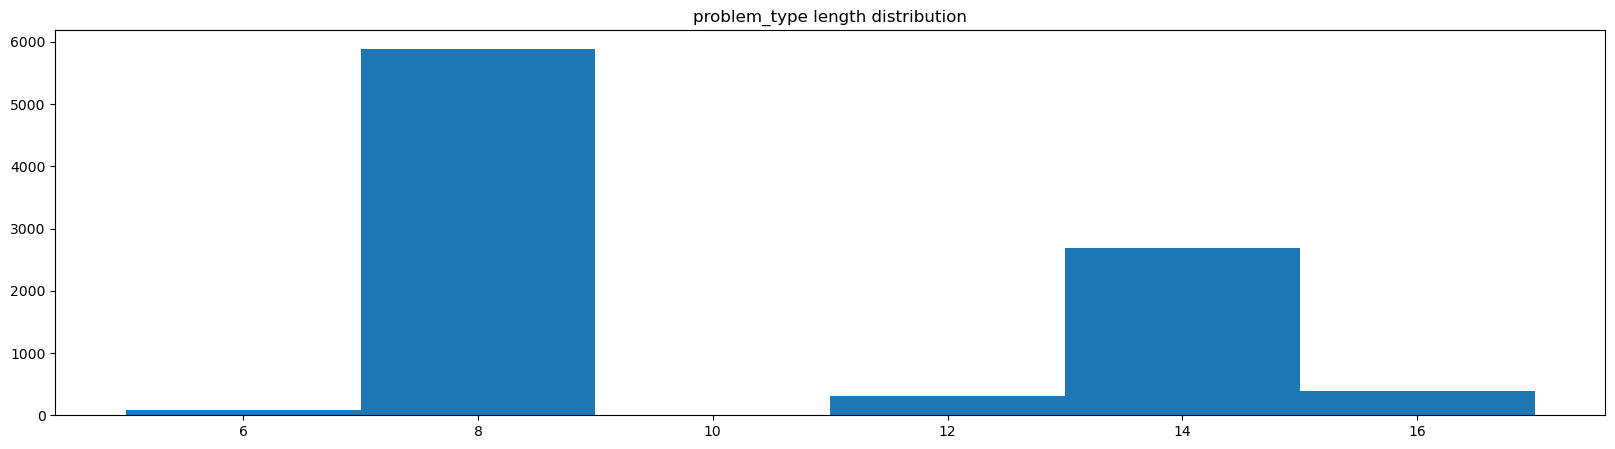

There are 8 problem_type.


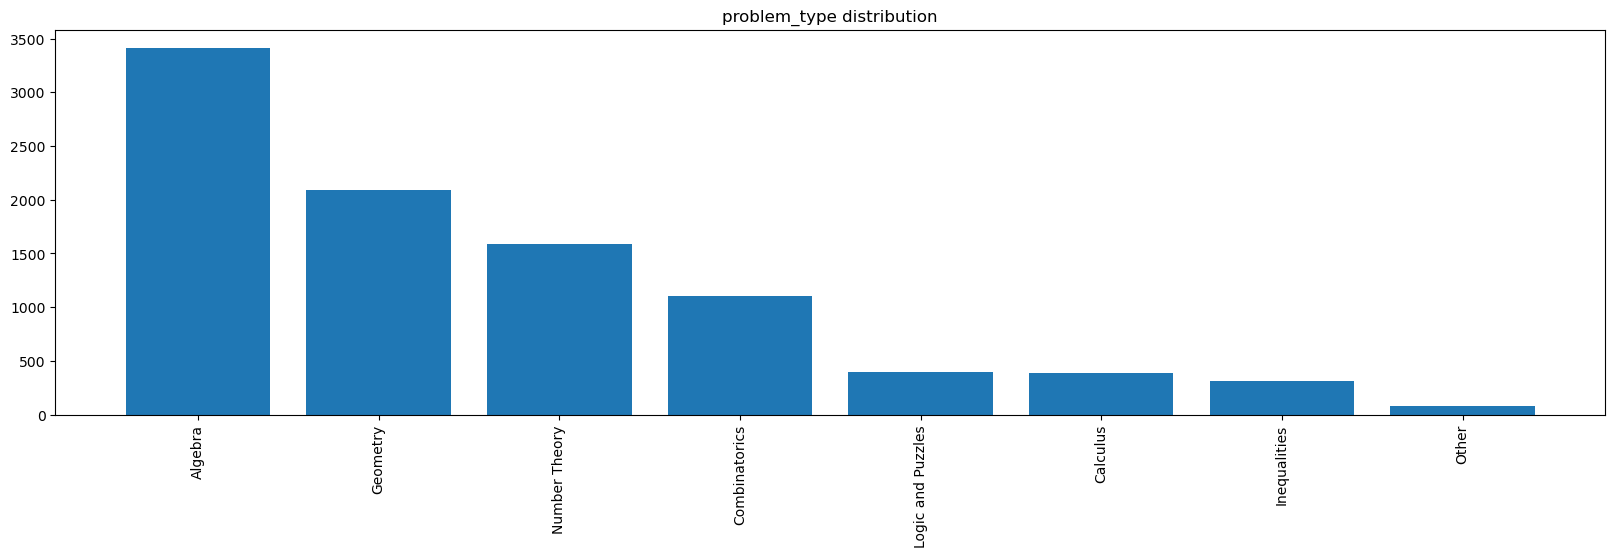

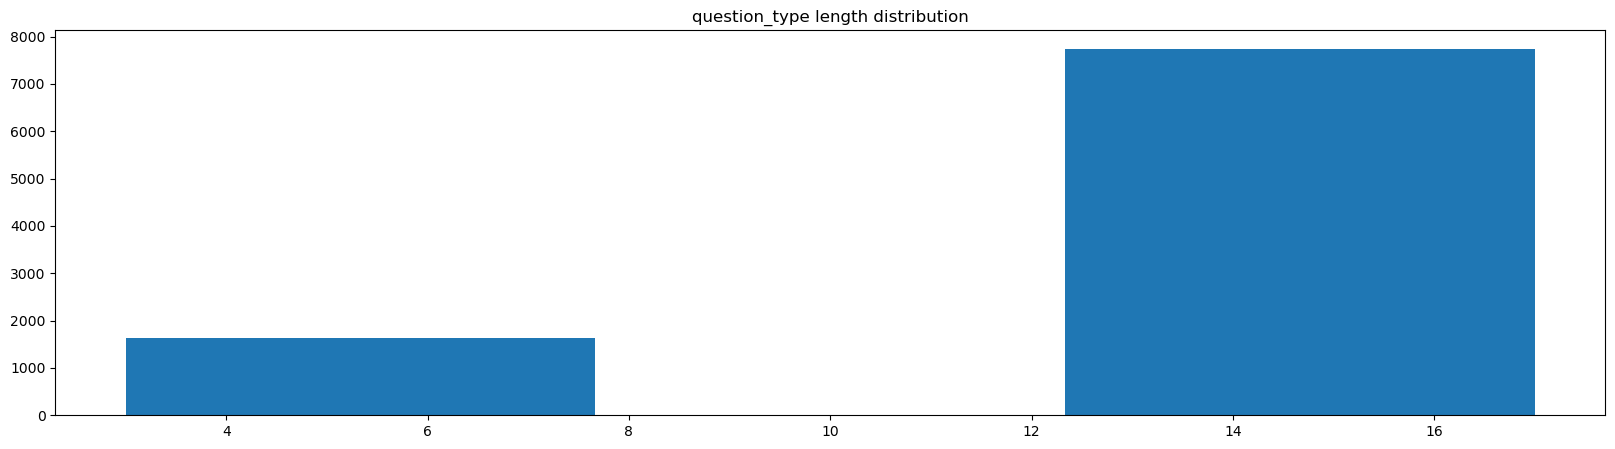

There are 3 question_type.


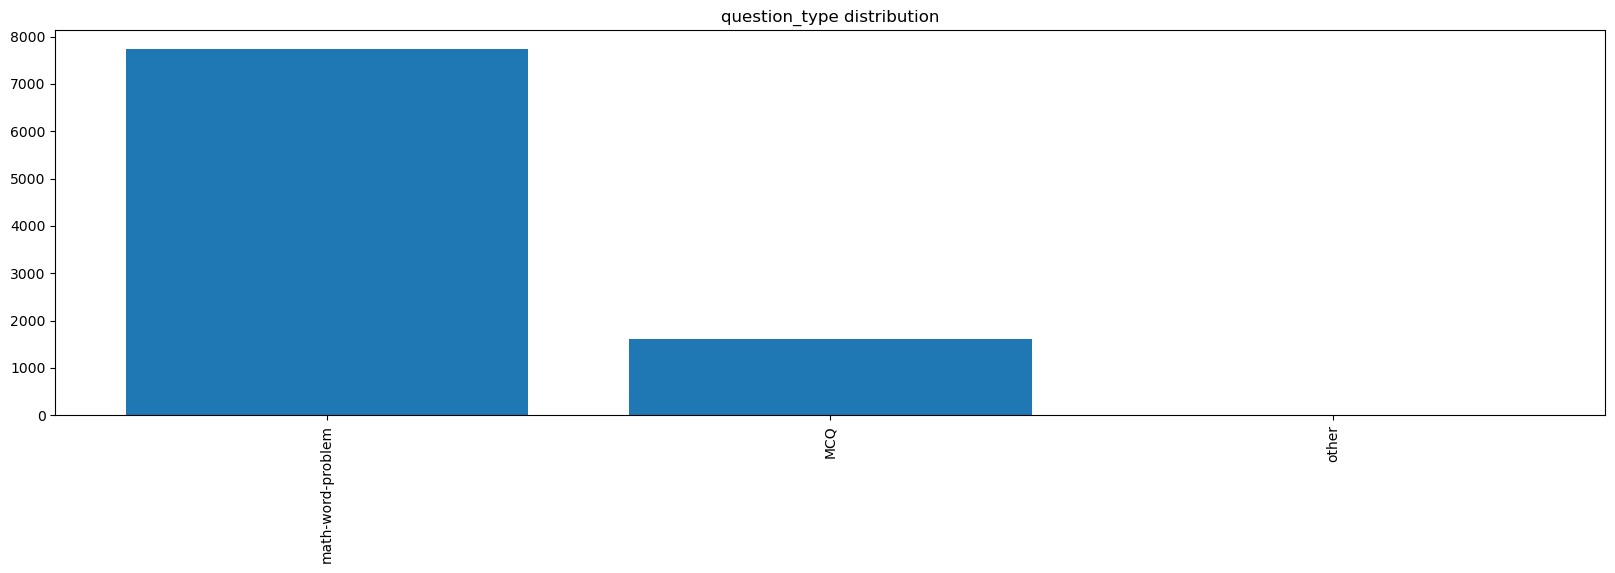

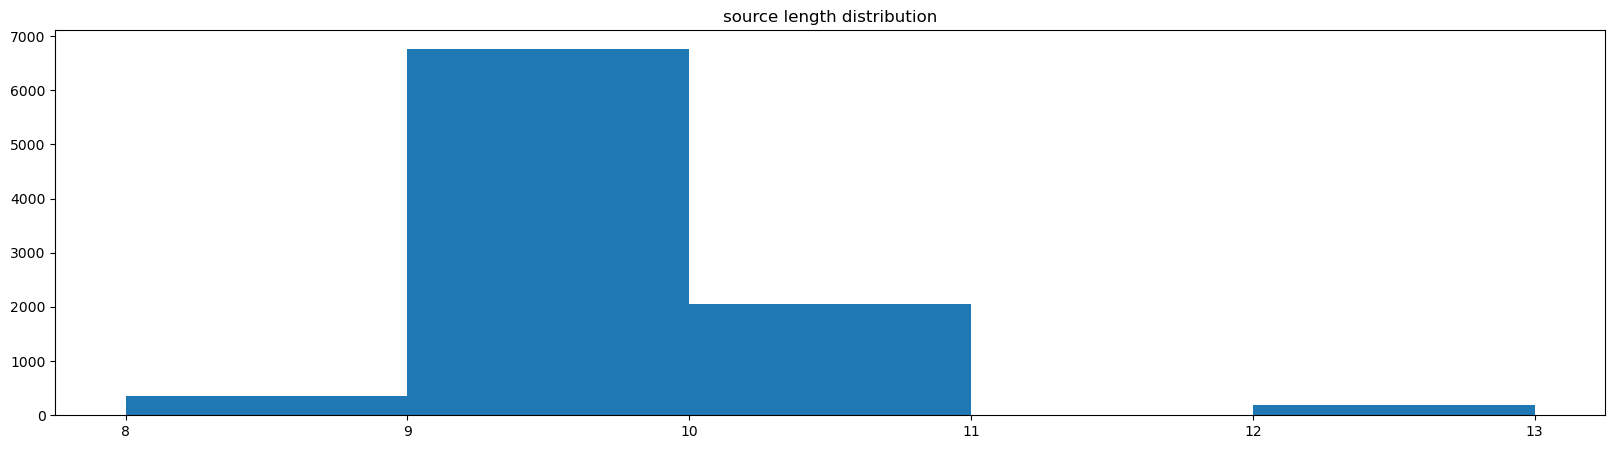

There are 7 source.


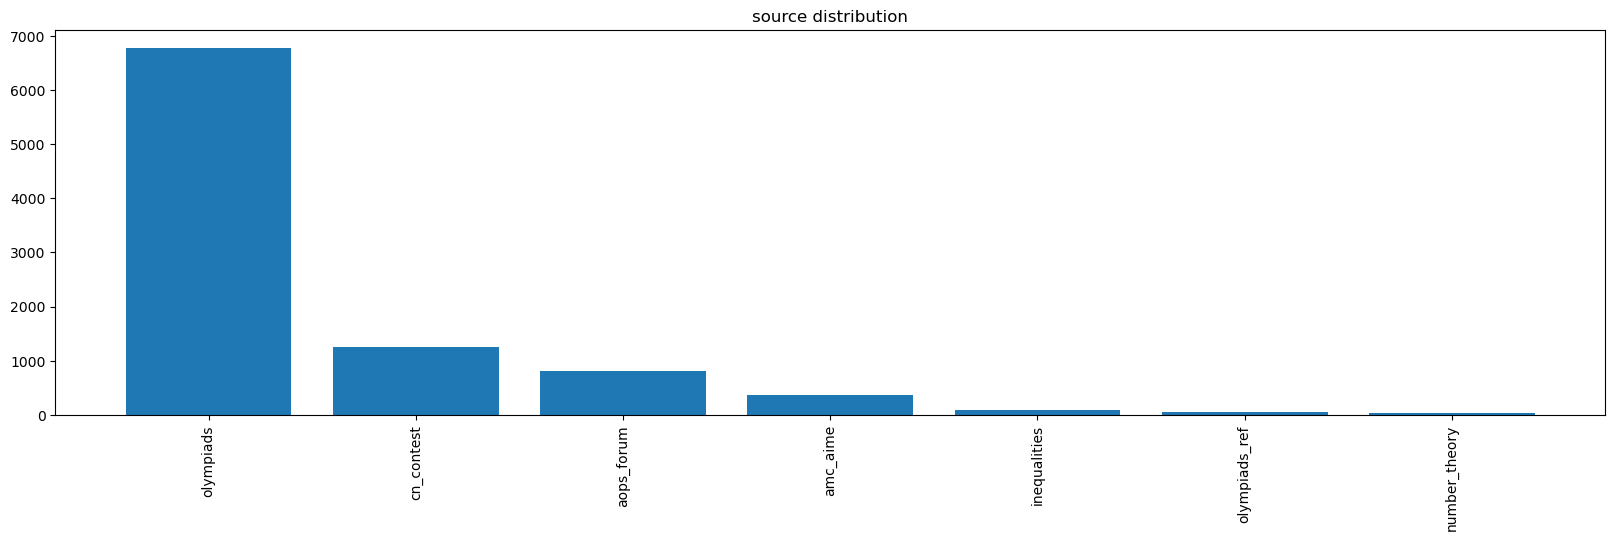

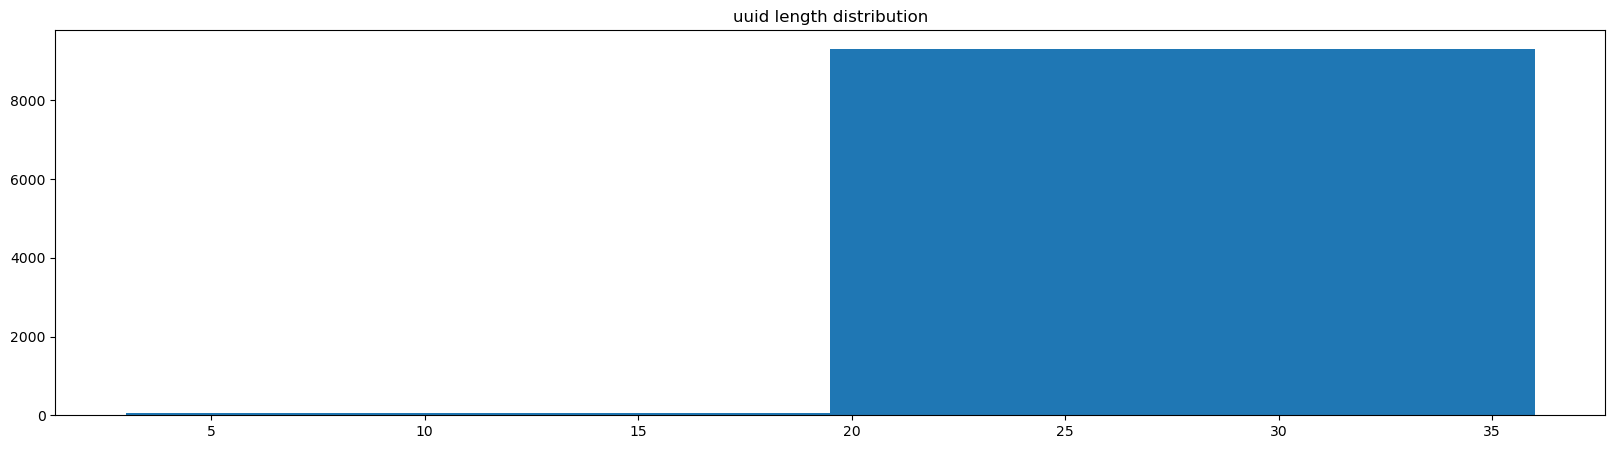

There are 9317 uuid.


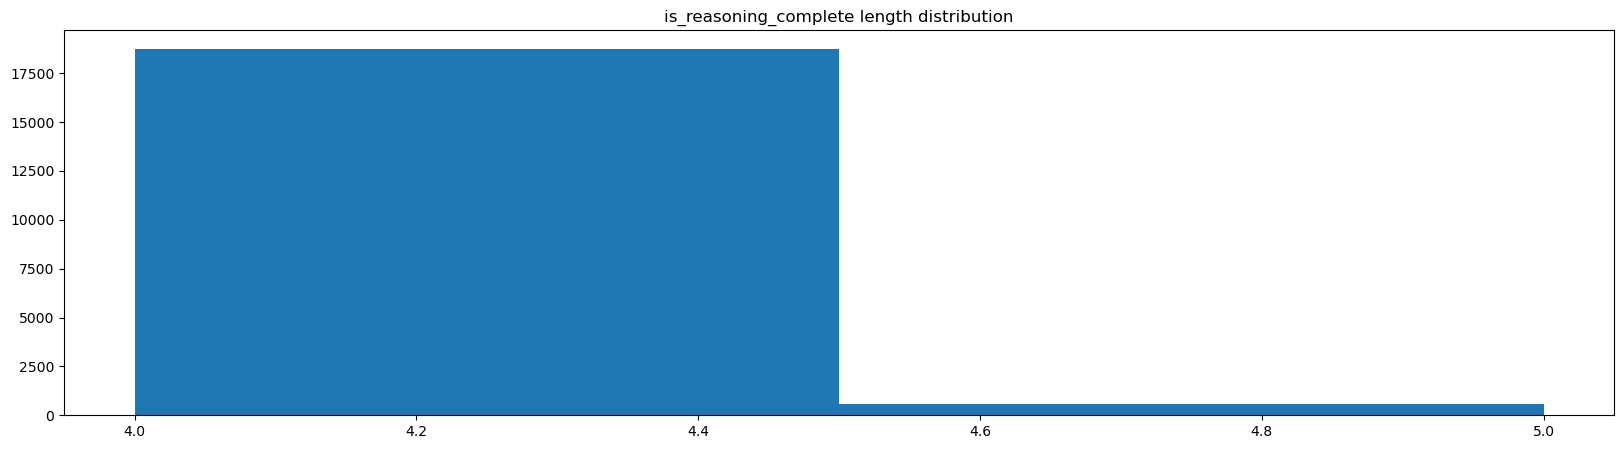

There are 2 is_reasoning_complete.


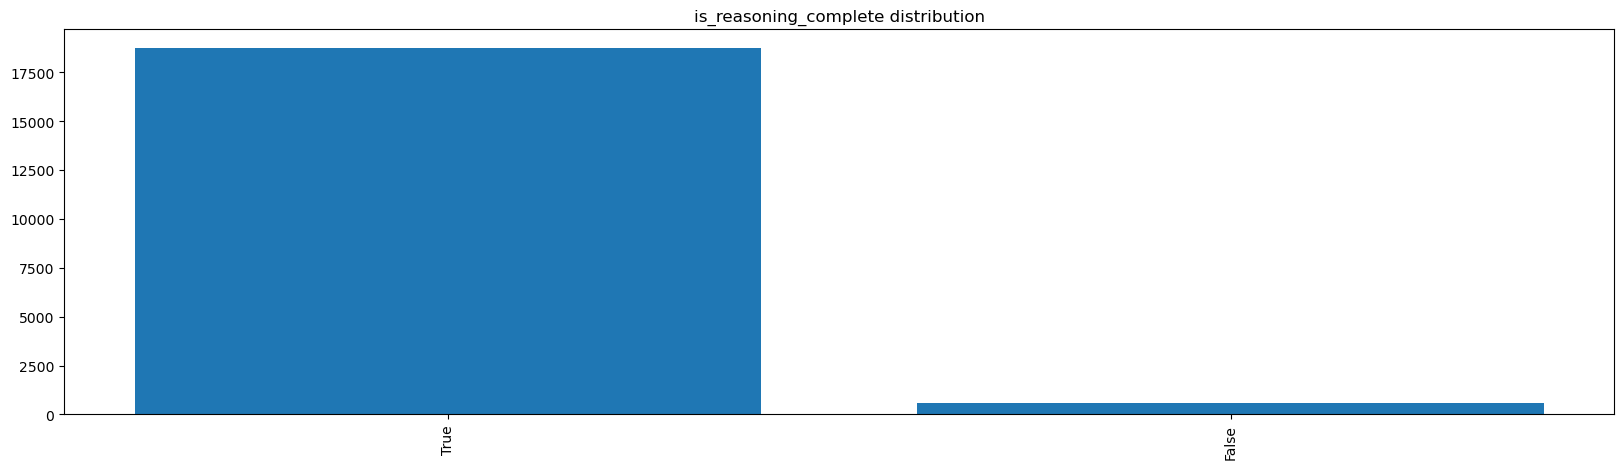

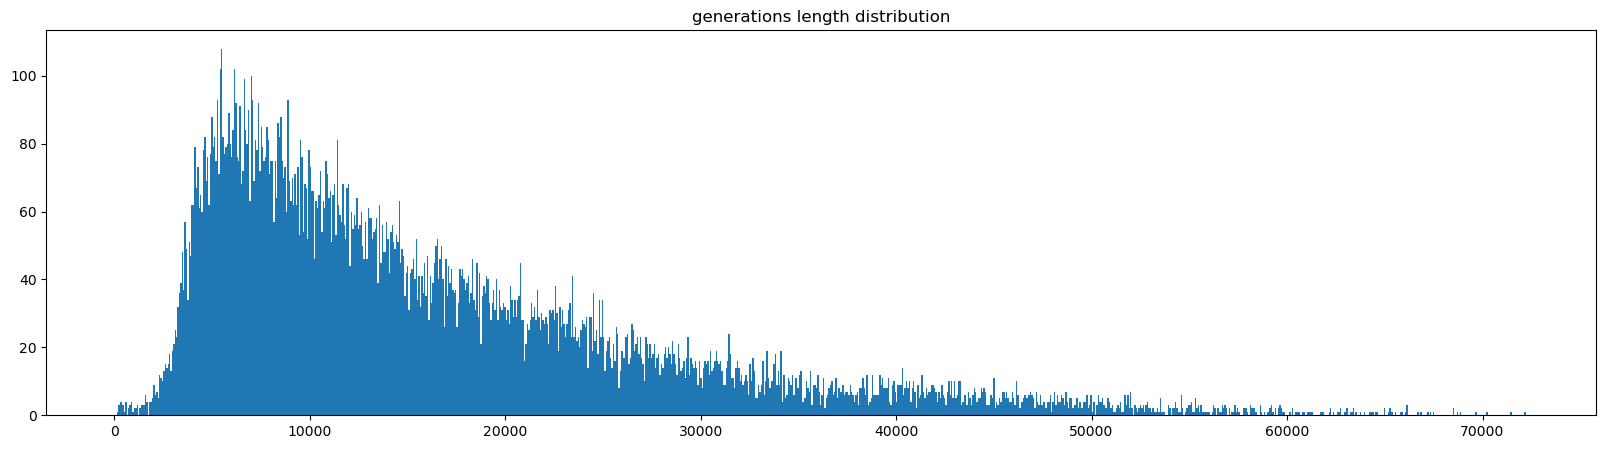

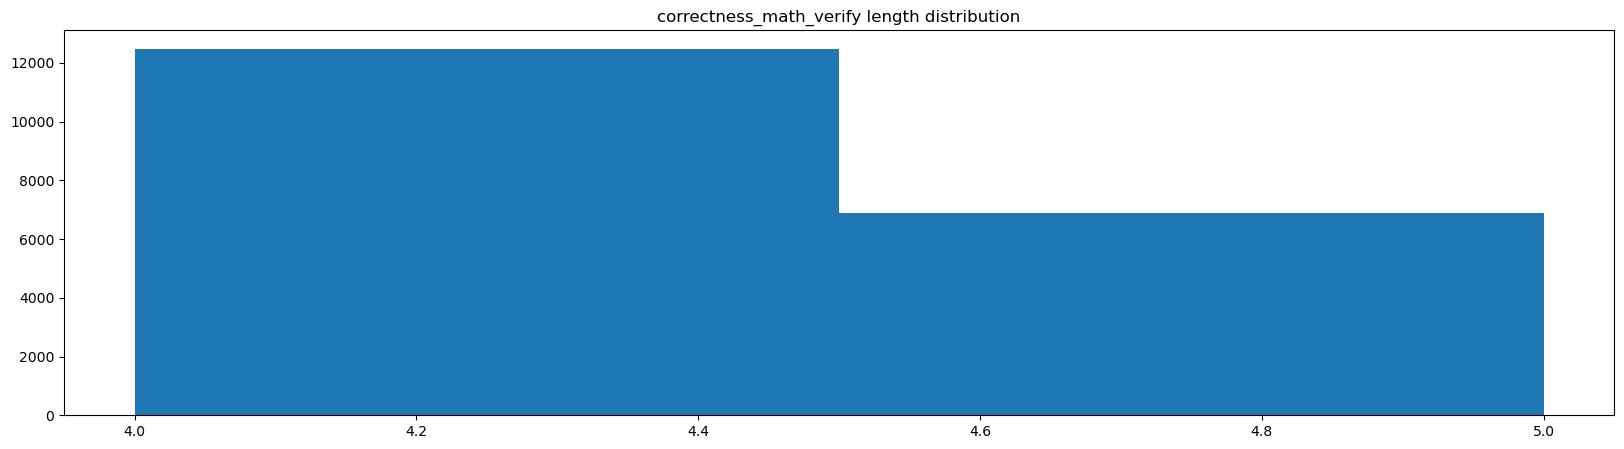

There are 2 correctness_math_verify.


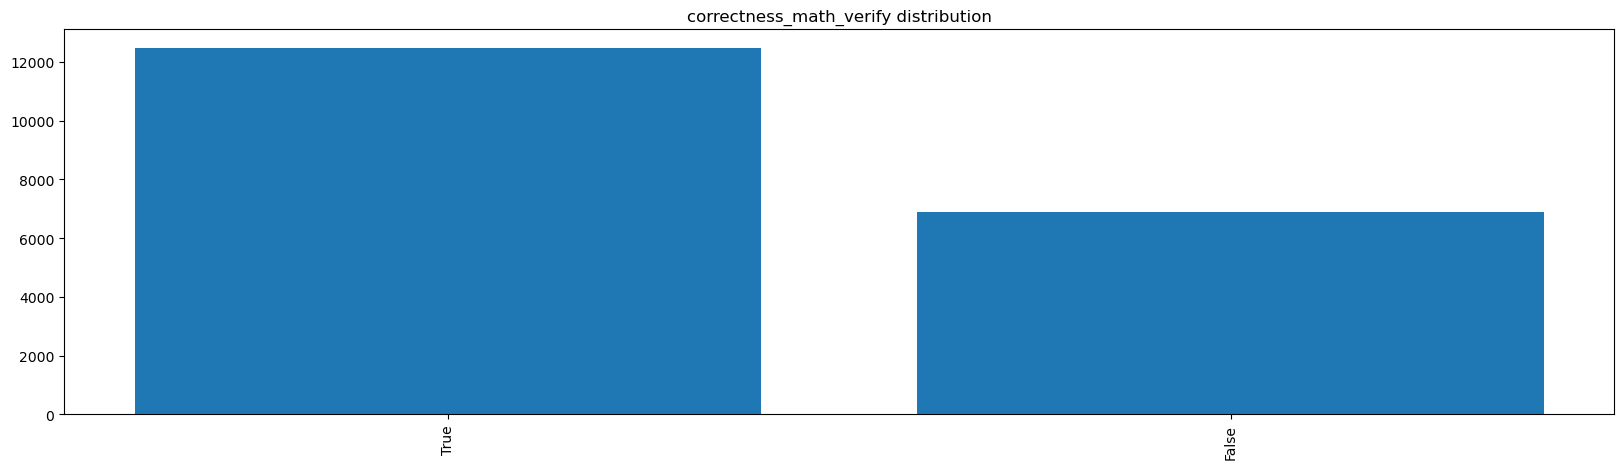

Number of 'None' correctness_llama: 6534


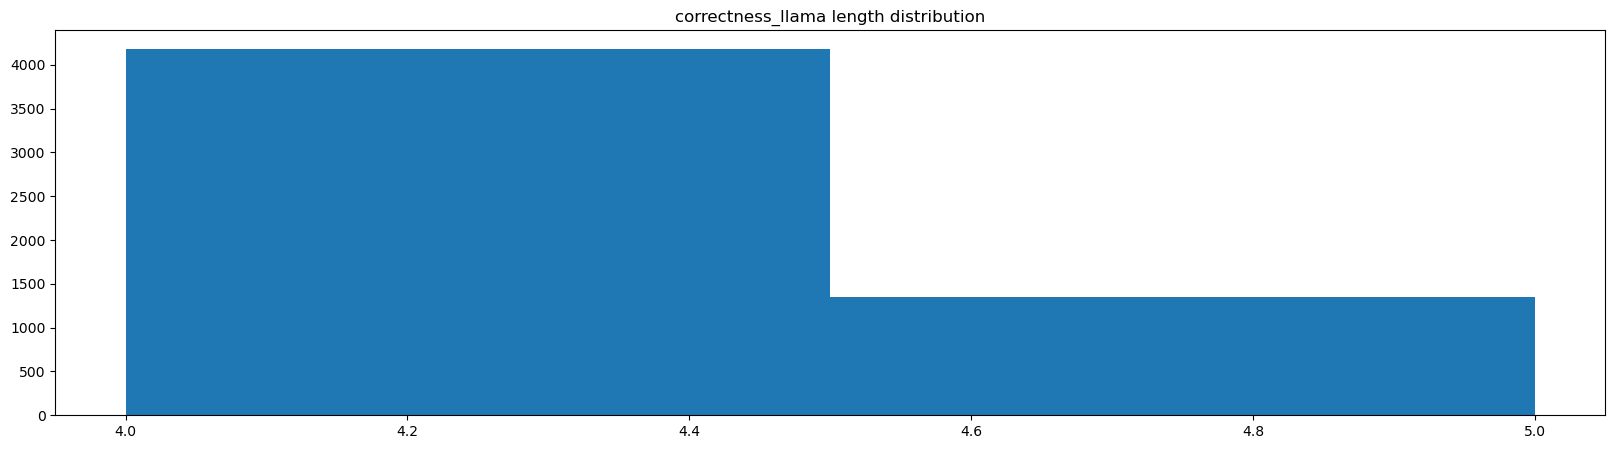

There are 2 correctness_llama.


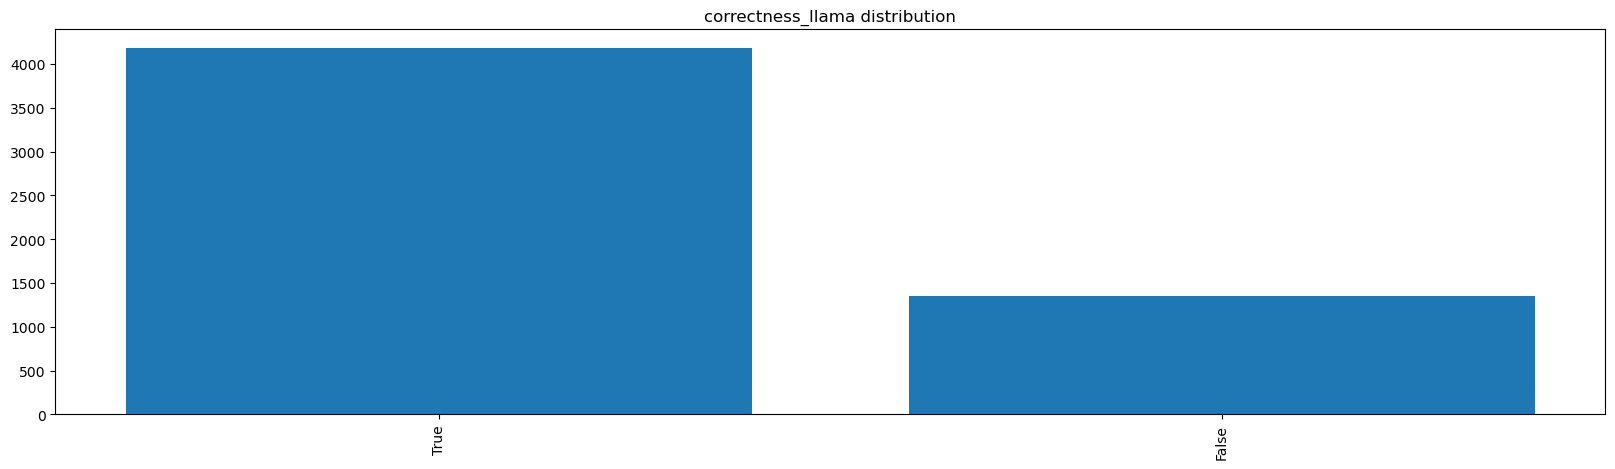

Number of 'None' finish_reasons: 7834


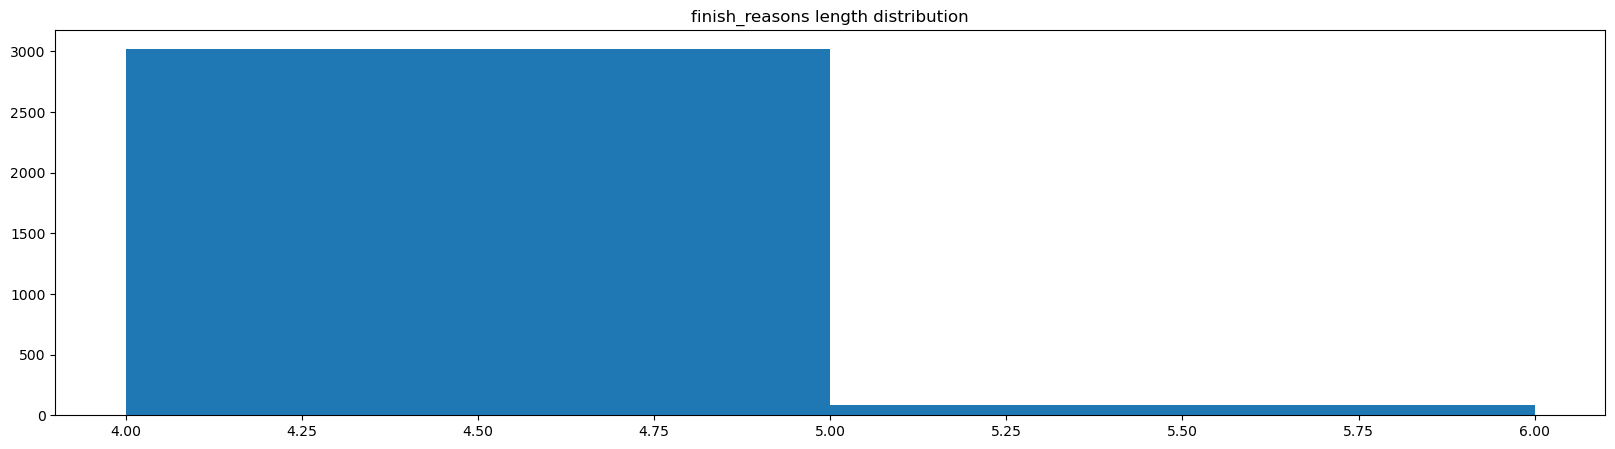

There are 2 finish_reasons.


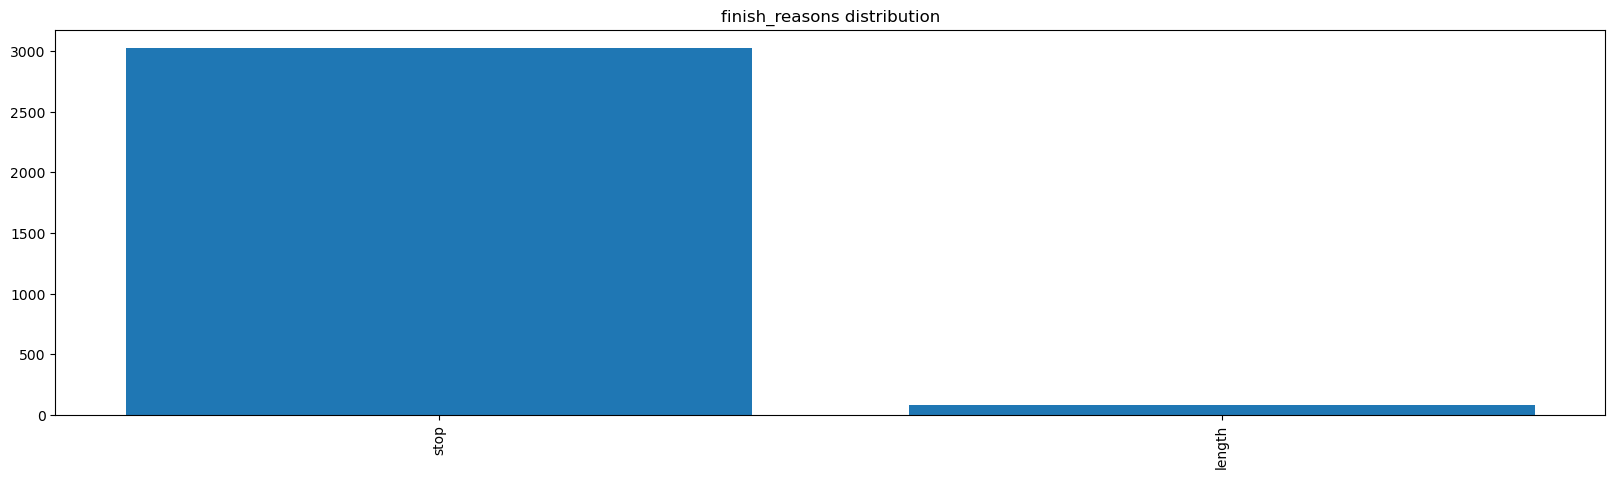

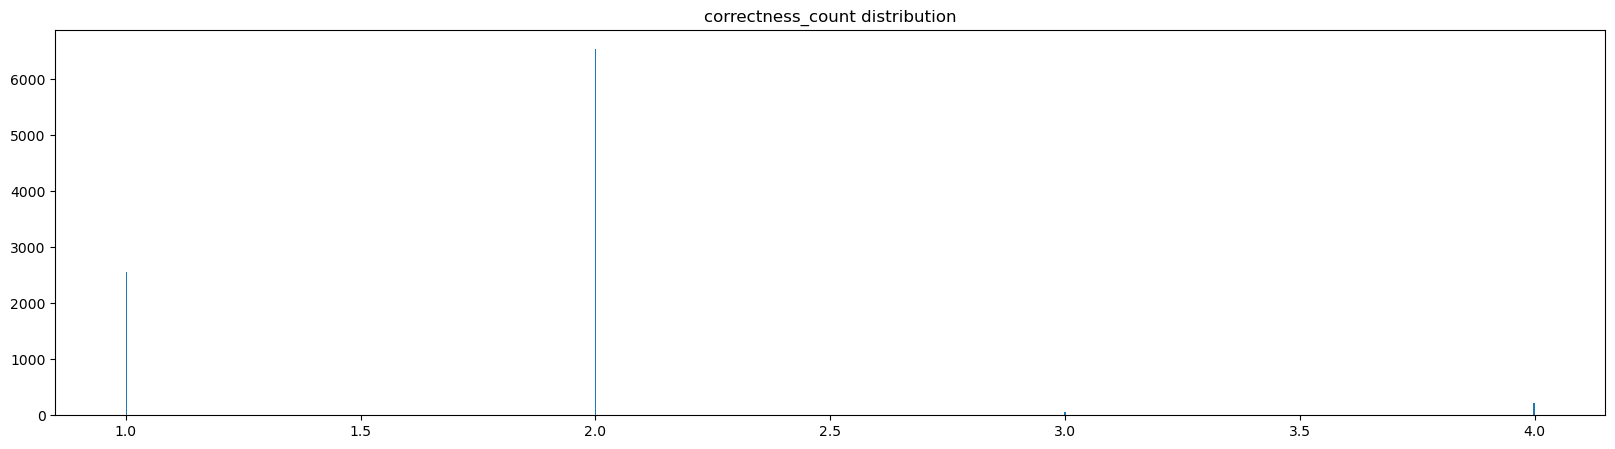

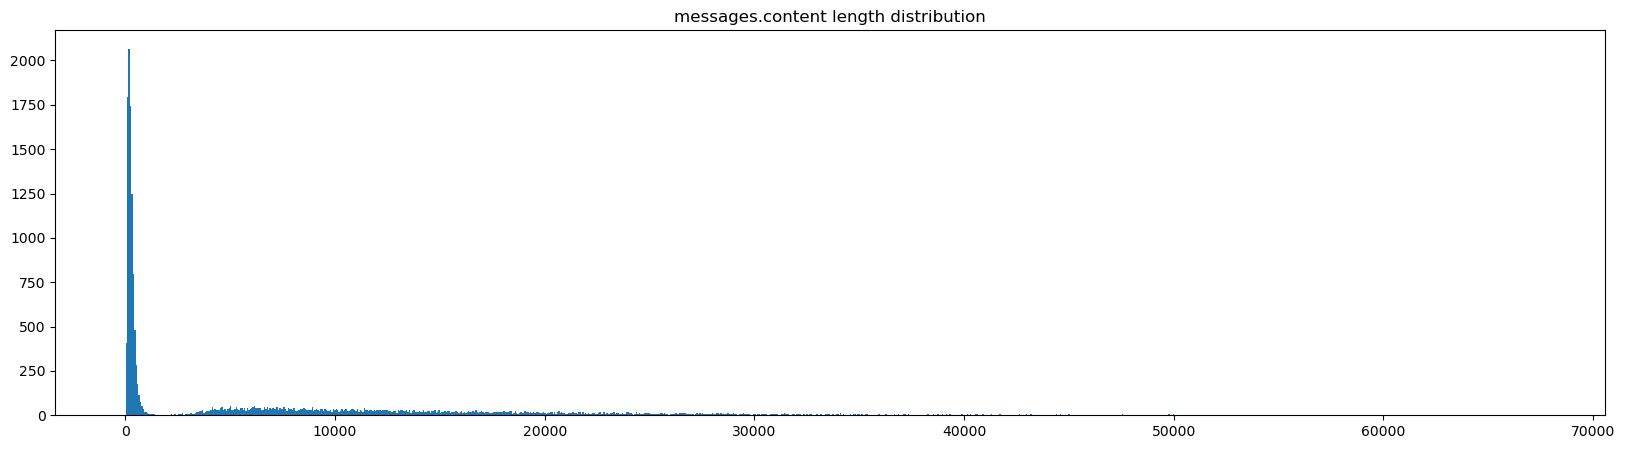

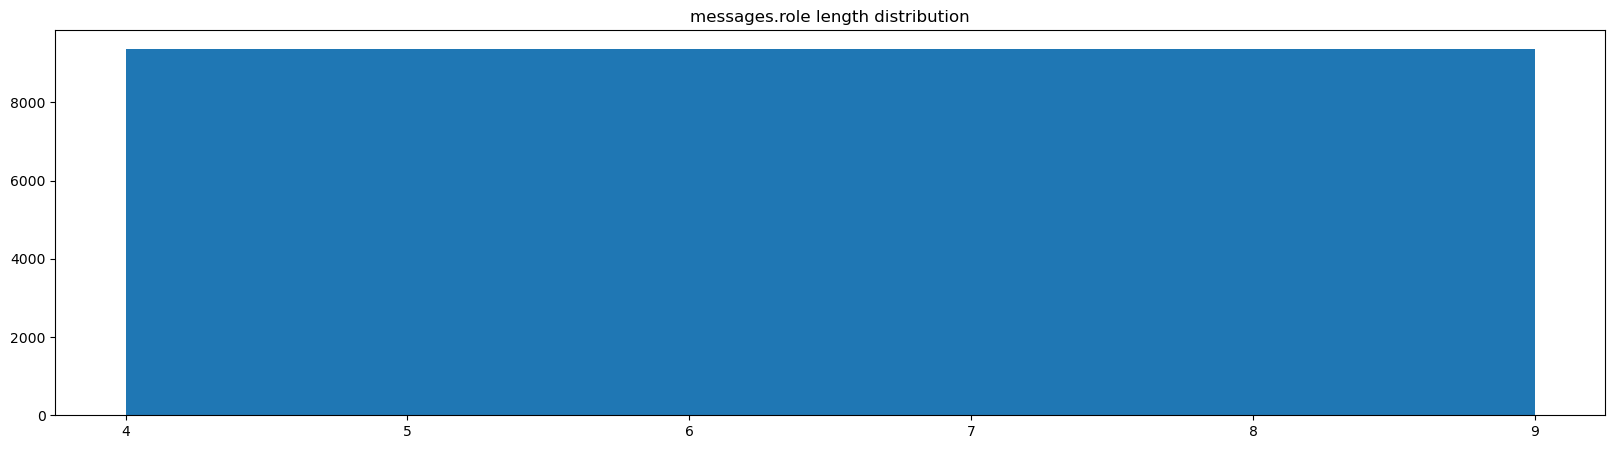

There are 2 messages.role.


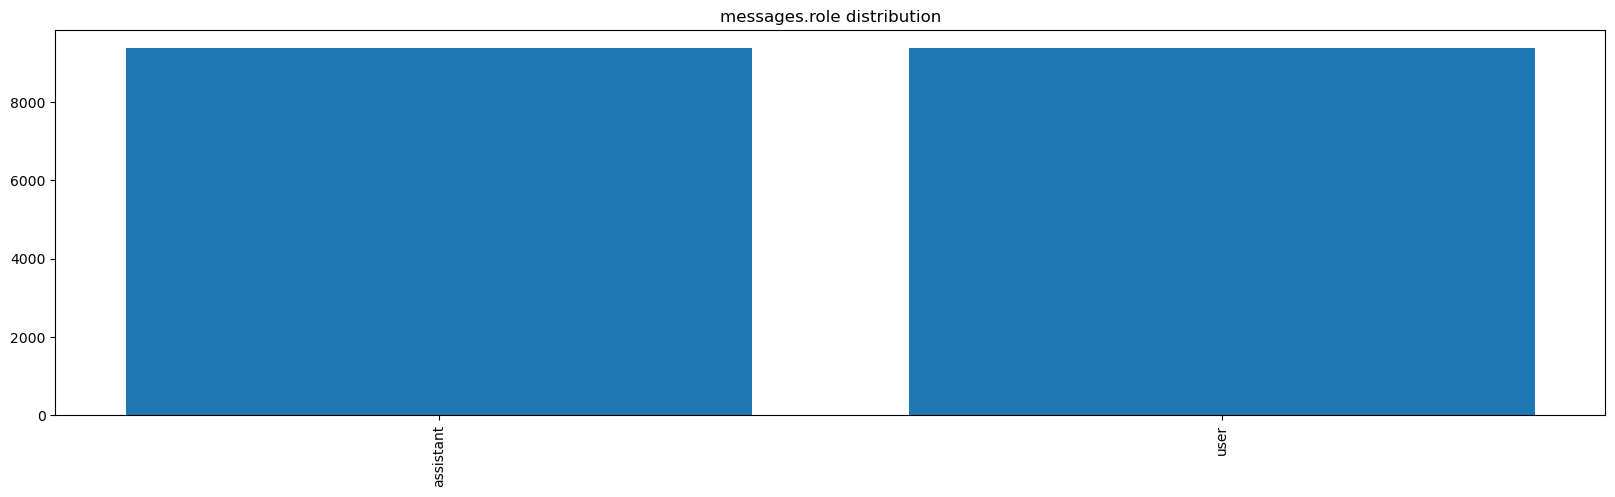

In [8]:
open_r1_math = load_data("OpenR1-Math-220k")

print_distributions(open_r1_math, ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'source', 'uuid', 'is_reasoning_complete', 'generations', 'correctness_math_verify', 'correctness_llama', 'finish_reasons', 'correctness_count', 'messages'])

### OpenThoughts 2

Features: ['conversations', 'question', 'source', 'id']
Number of samples: 30085
Sample: {
    "conversations": [
        {
            "from": "user",
            "value": "translate this code to Go:\n```scala\nimport scala.collection.mutable.PriorityQueue\n\ndef minRefuelingStops(target: Int, startFuel: Int, stations: Array[Array[Int]]): Int = {\n  var pos = 0\n  var fuel = startFuel\n  var stops = 0\n  val pq = PriorityQueue.empty[Int]\n\n  for (i <- 0 until stations.length) {\n    val dist = stations(i)(0) - pos\n    while (fuel < dist) {\n      if (pq.isEmpty) return -1\n      fuel += -pq.dequeue()\n      stops += 1\n    }\n    fuel -= dist\n    pos = stations(i)(0)\n    pq.enqueue(-stations(i)(1))\n  }\n\n  val dist = target - pos\n  while (fuel < dist) {\n    if (pq.isEmpty) return -1\n    fuel += -pq.dequeue()\n    stops += 1\n  }\n\n  stops\n}\n```"
        },
        {
            "from": "assistant",
            "value": "<think>\nOkay, I need to translate this Scala code in

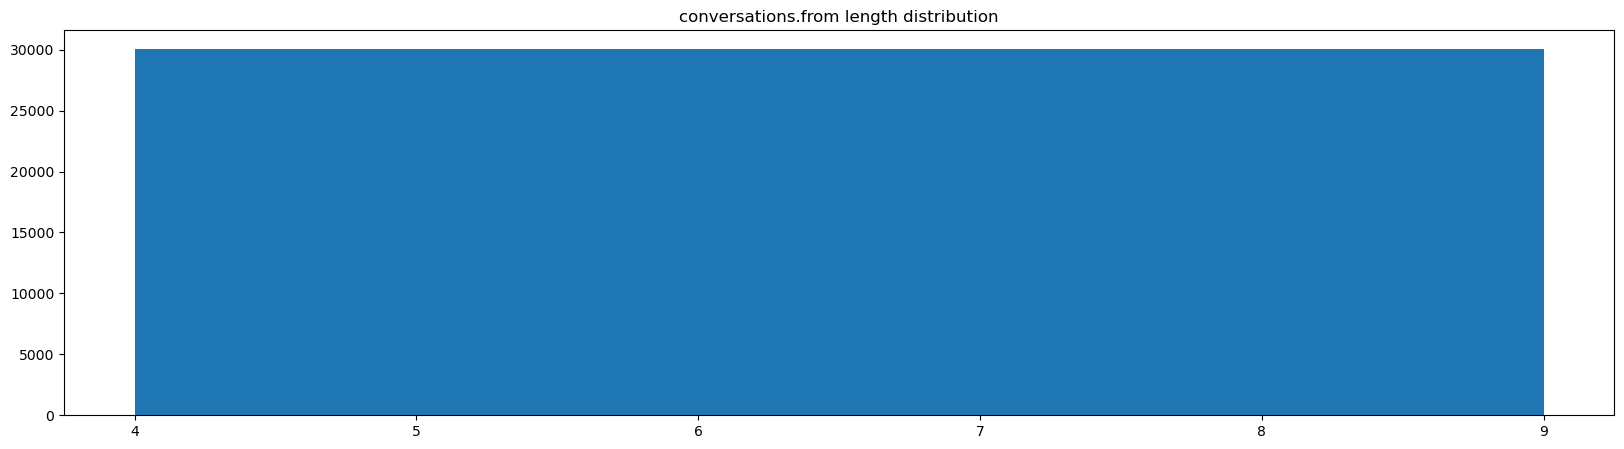

There are 2 conversations.from.


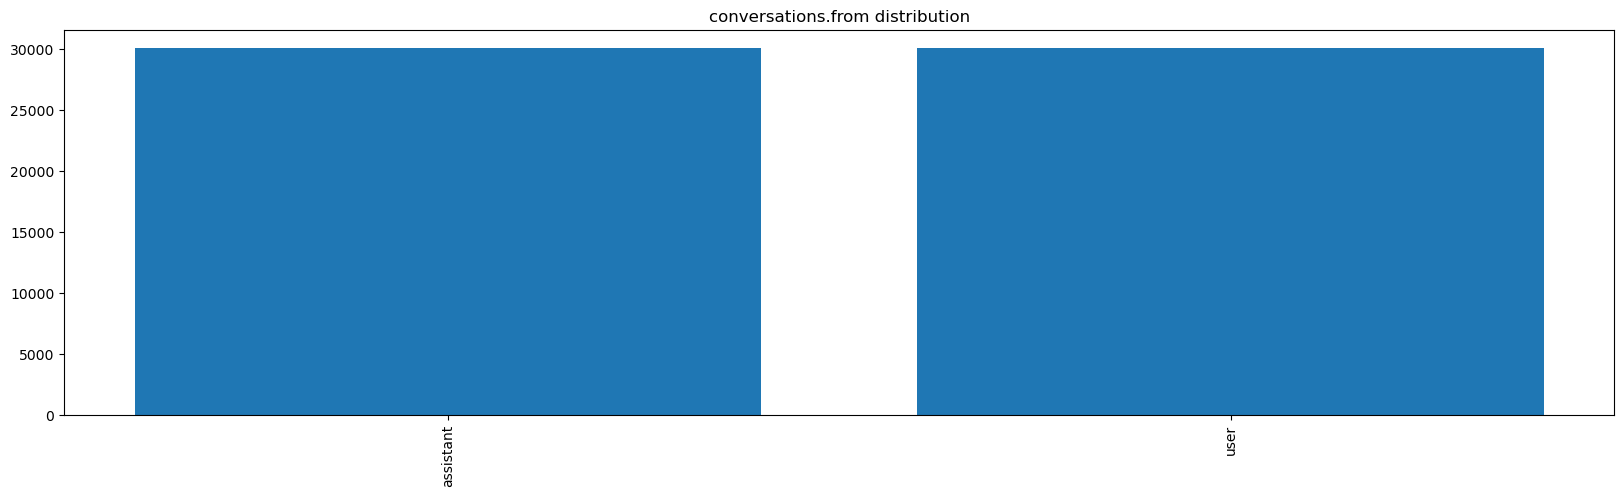

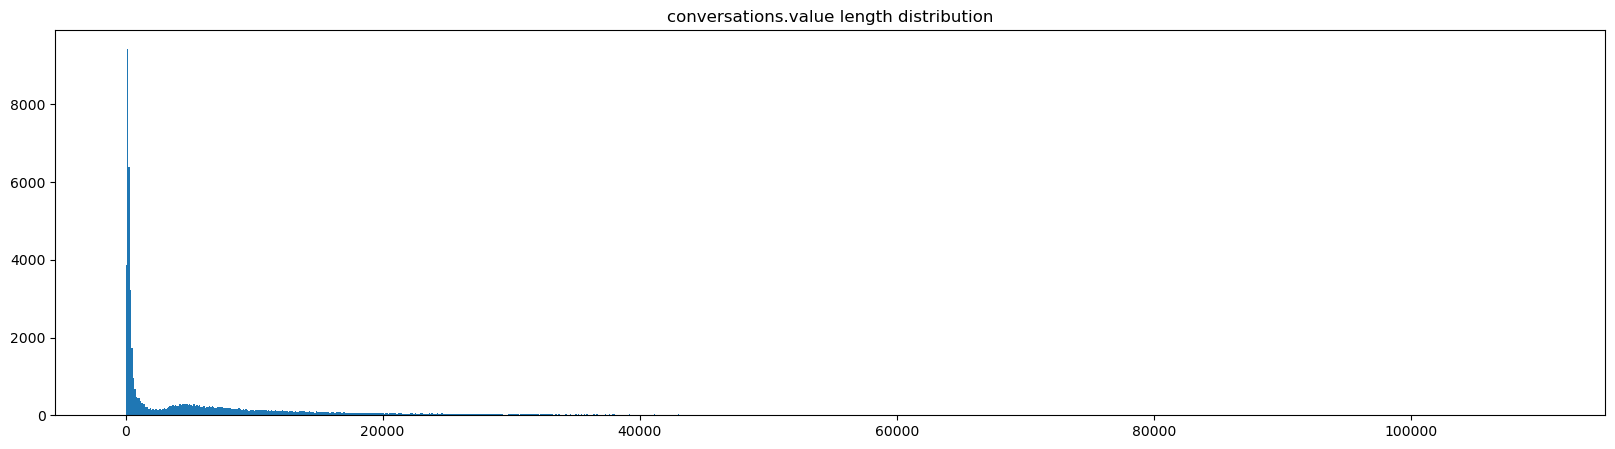

Number of 'None' question: 7882


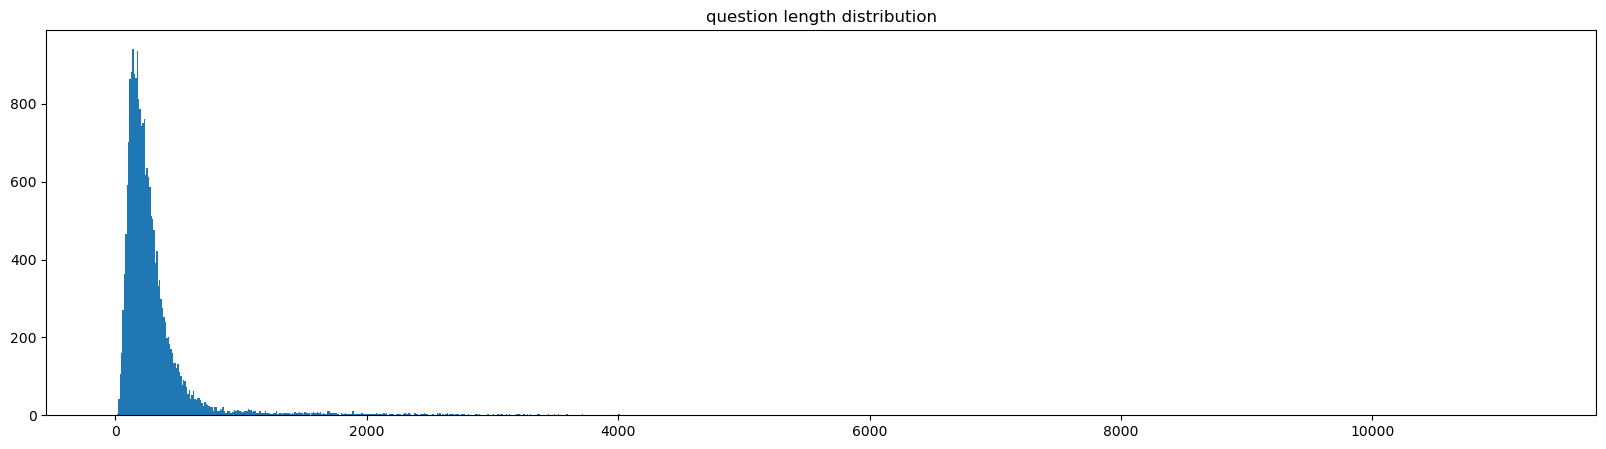

There are 21696 question.
Number of 'None' source: 24814


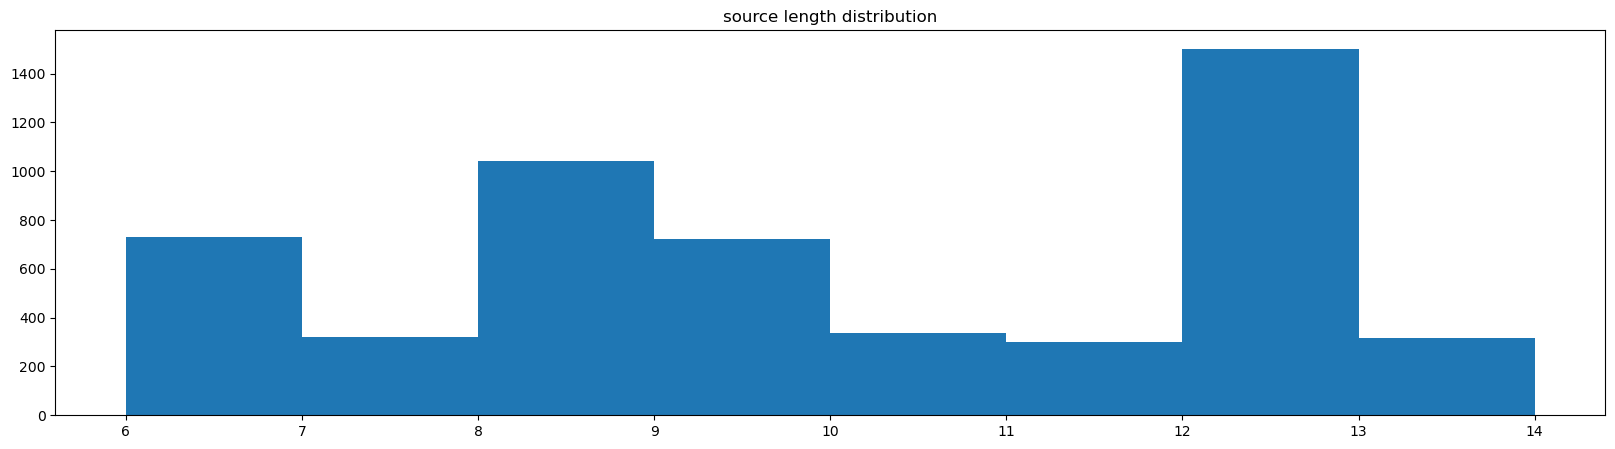

There are 10 source.


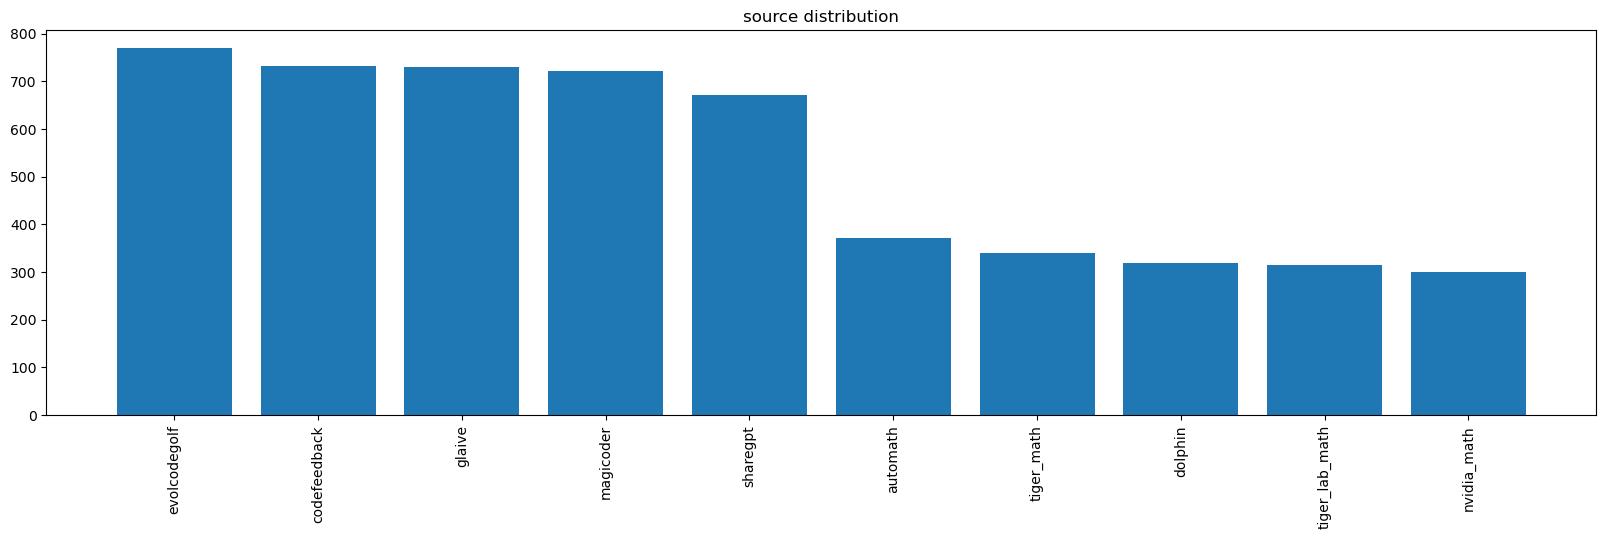

Number of 'None' id: 28759


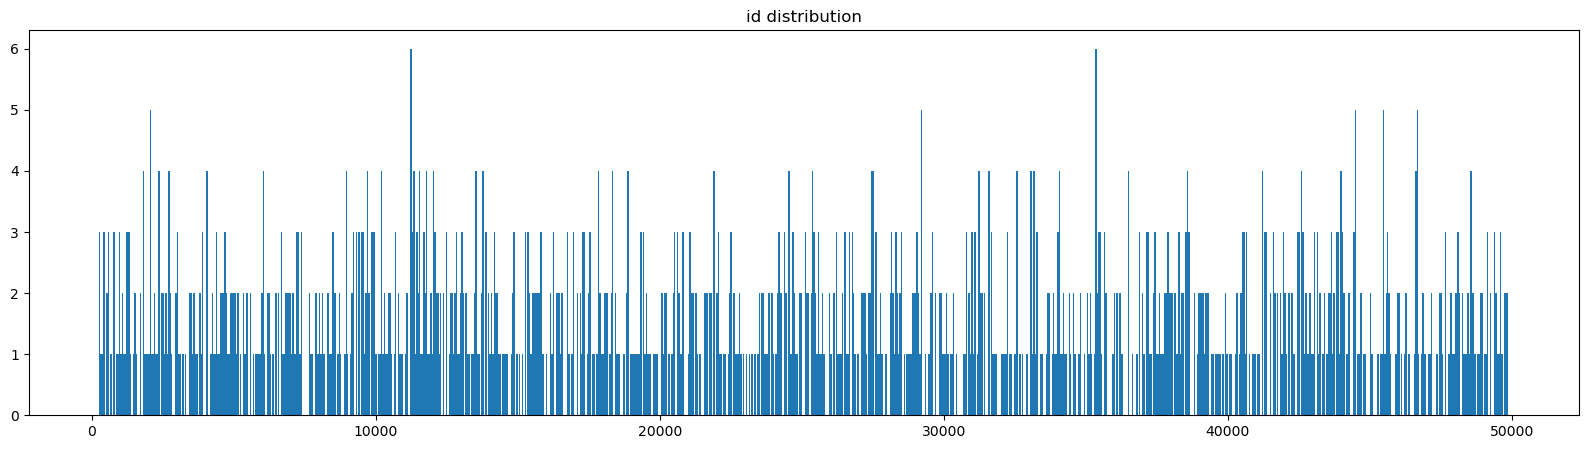

In [9]:
open_thoughts_2 = load_data("OpenThoughts2-1M")

print_distributions(open_thoughts_2, ['conversations', 'question', 'source', 'id'])

### Pensez 0.1

In [ ]:
# TODO: manually load every subset
pensez_0_1 = load_data("Pensez-v0.1/*")
print_distributions(pensez_0_1, ['question', 'answer', 'source', 'domain', 'llama8b_solve_rate'])

### S1K 1.1

Features: ['solution', 'question', 'cot_type', 'source_type', 'metadata', 'gemini_thinking_trajectory', 'gemini_attempt', 'deepseek_thinking_trajectory', 'deepseek_attempt', 'gemini_grade', 'gemini_grade_reason', 'deepseek_grade', 'deepseek_grade_reason']
Number of samples: 1000
Sample: {
    "cot_type": "math",
    "deepseek_attempt": "To solve the problem, we need to find the monic cubic polynomial \\( p(x) \\) with roots \\( \\sin^2(1^\\circ) \\), \\( \\sin^2(3^\\circ) \\), and \\( \\sin^2(9^\\circ) \\). We then evaluate \\( p\\left(\\frac{1}{4}\\right) \\) and express it in the form \\( \\frac{\\sin(a^\\circ)}{n \\sin(b^\\circ)} \\) where \\( 0 < a, b \\leq 90^\\circ \\) and \\( a, b, n \\) are positive integers. Finally, we find \\( a + b + n \\).\n\n1. **Roots and Polynomial Formation**:\n   The polynomial \\( p(x) \\) is given by:\n   \\[\n   p(x) = (x - \\sin^2(1^\\circ))(x - \\sin^2(3^\\circ))(x - \\sin^2(9^\\circ))\n   \\]\n\n2. **Substitution**:\n   We need to evaluate \\( p

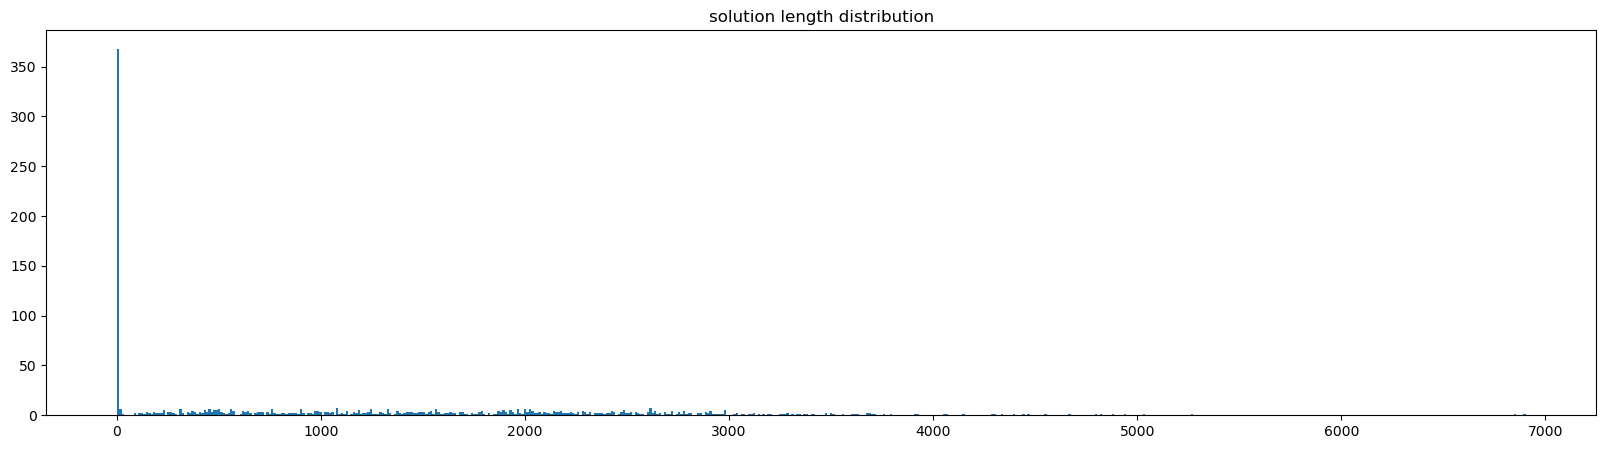

There are 906 solution.


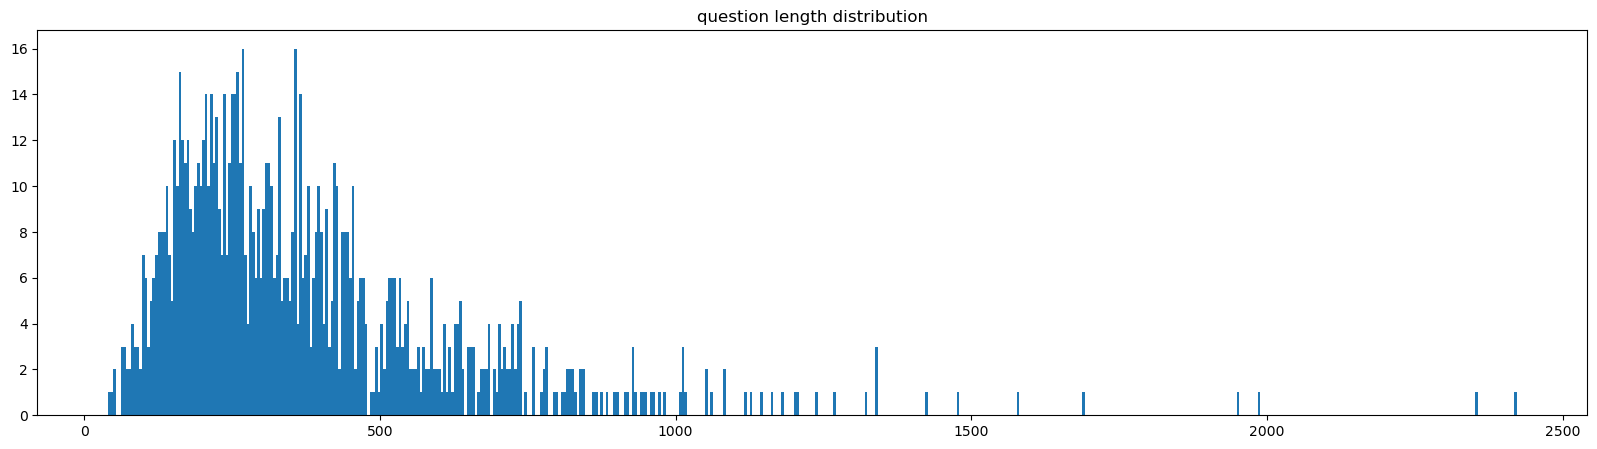

There are 1000 question.


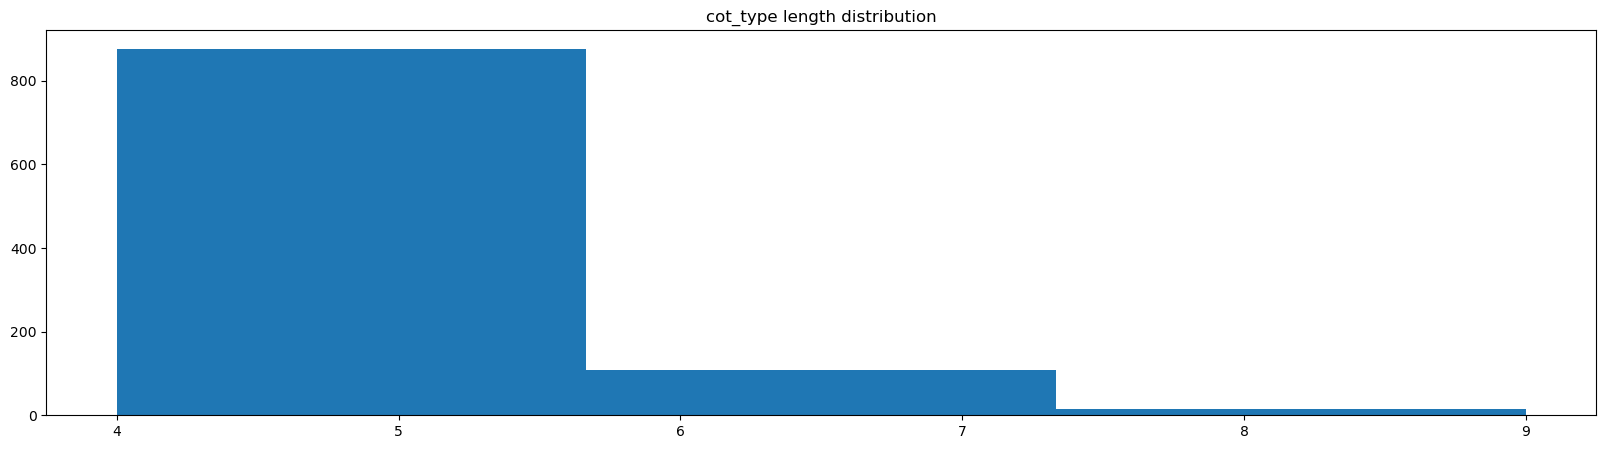

There are 3 cot_type.


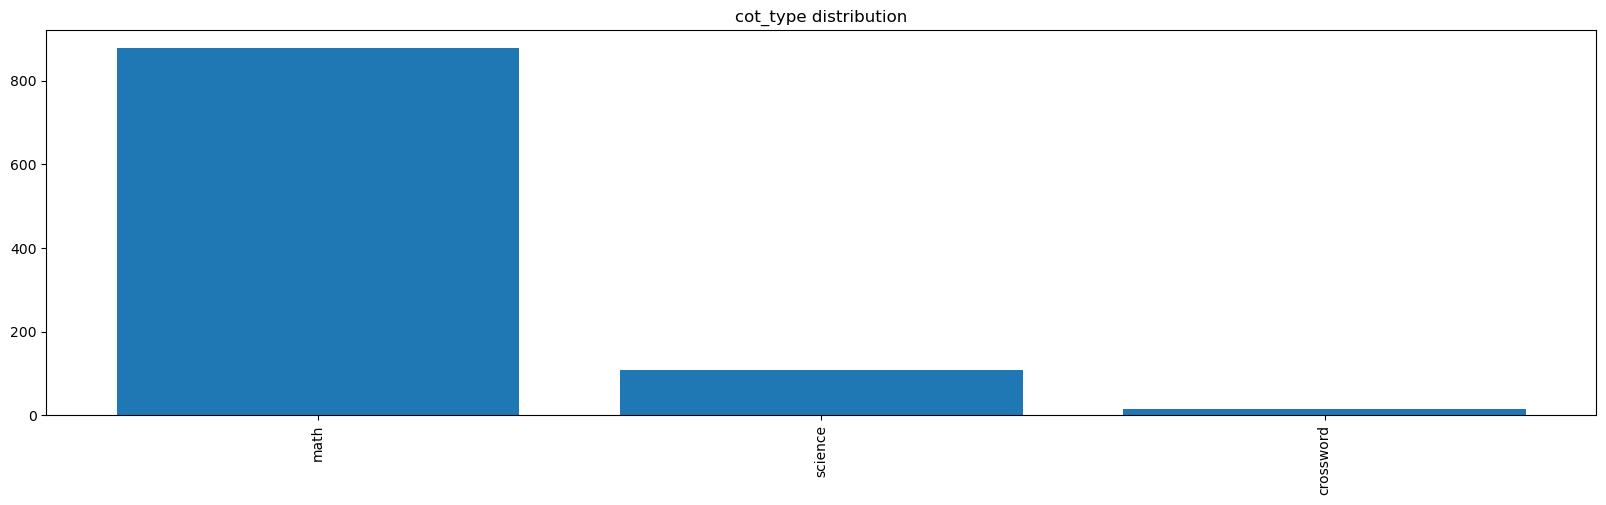

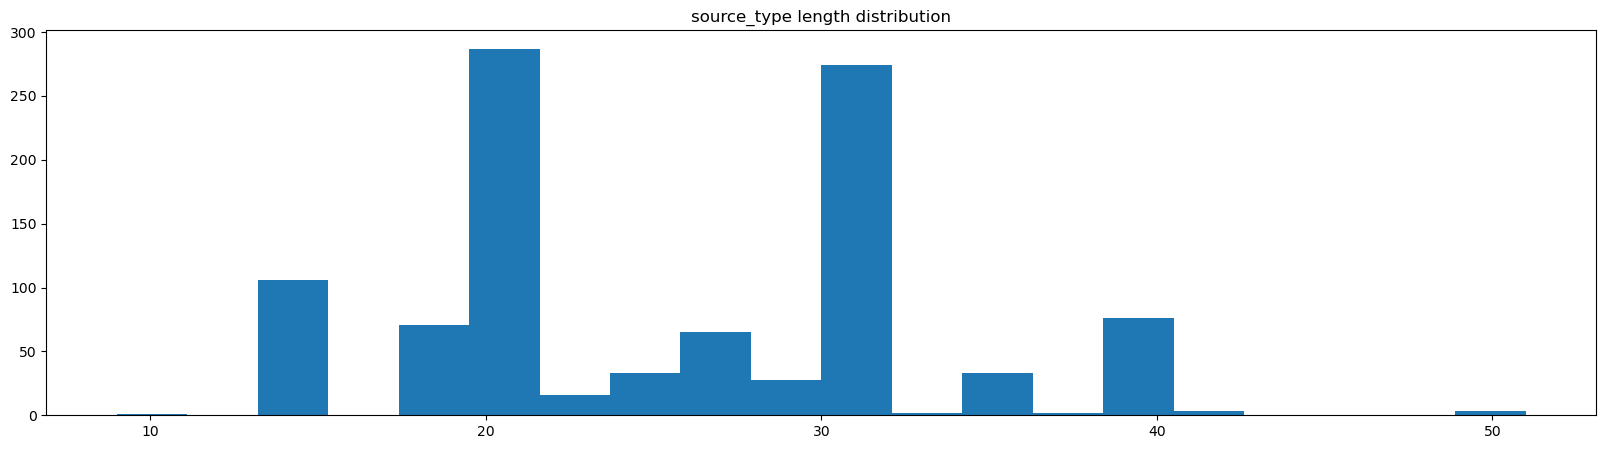

There are 34 source_type.


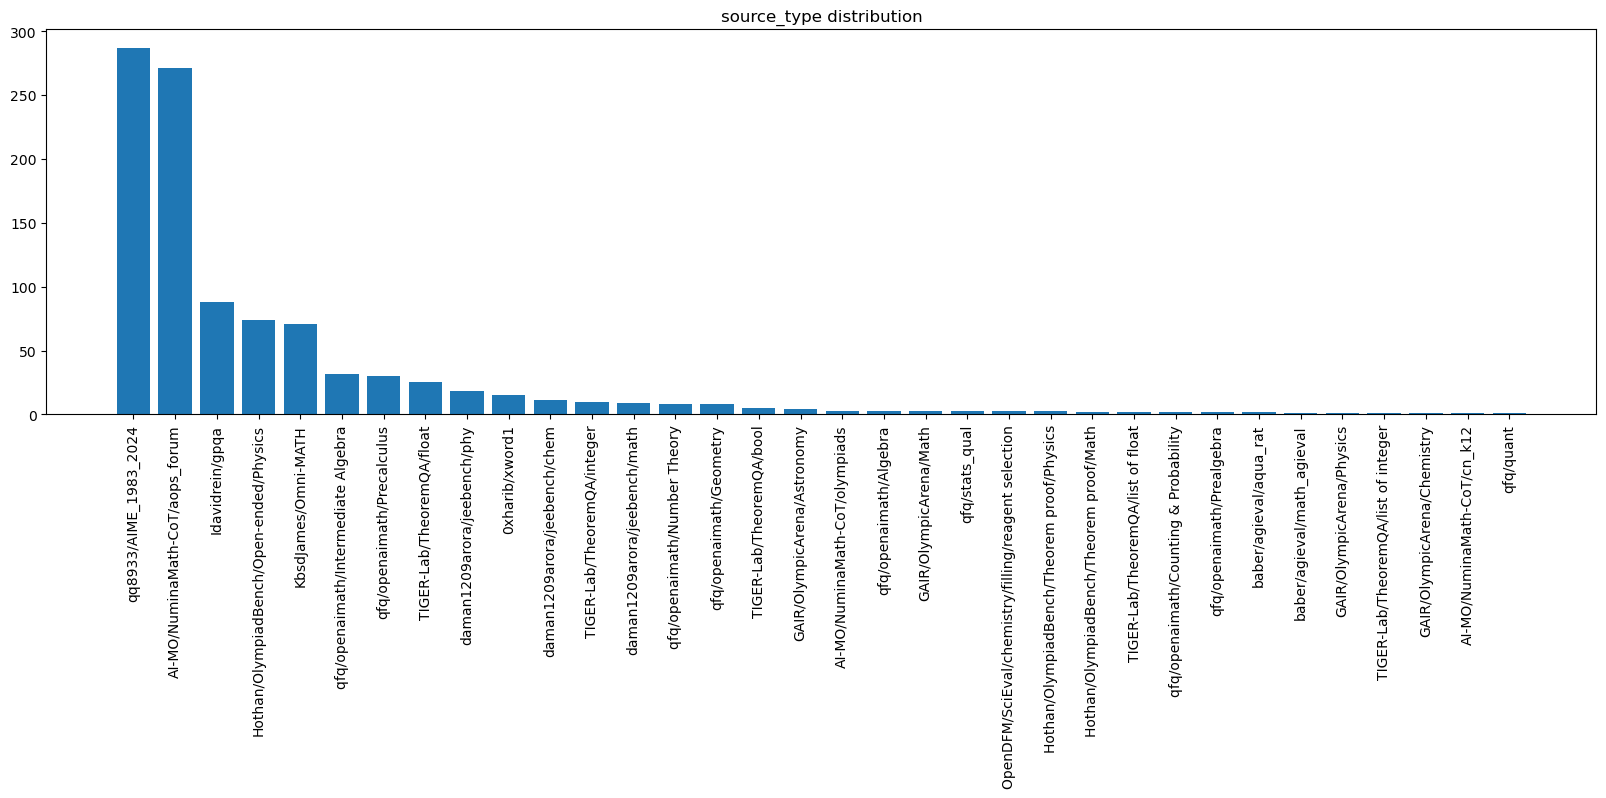

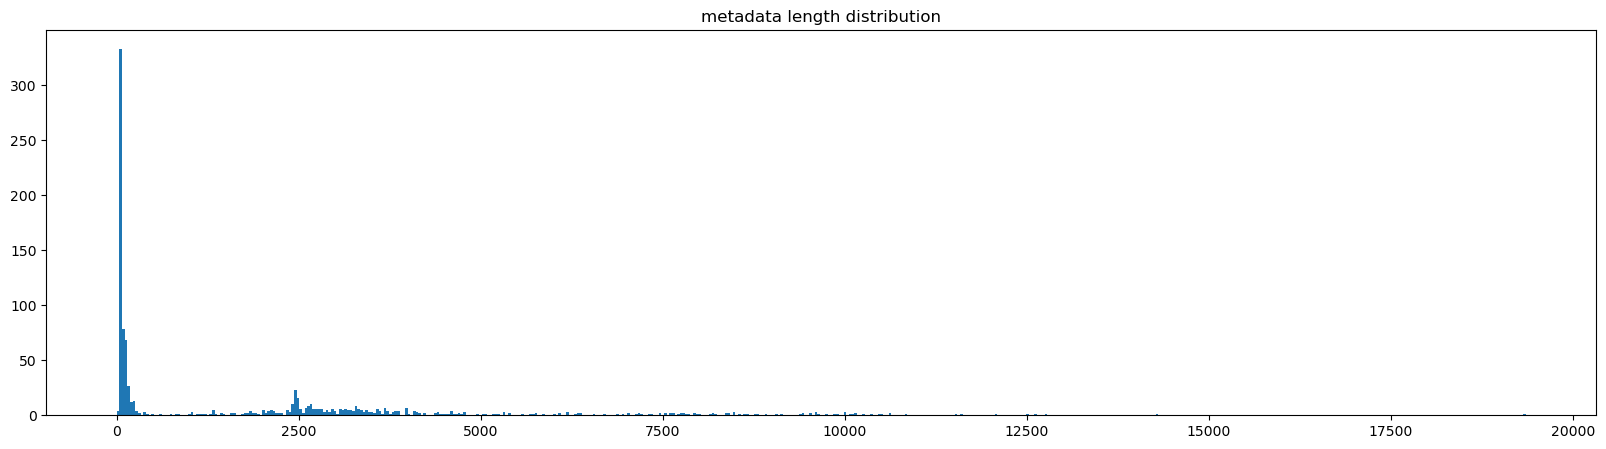

There are 948 metadata.


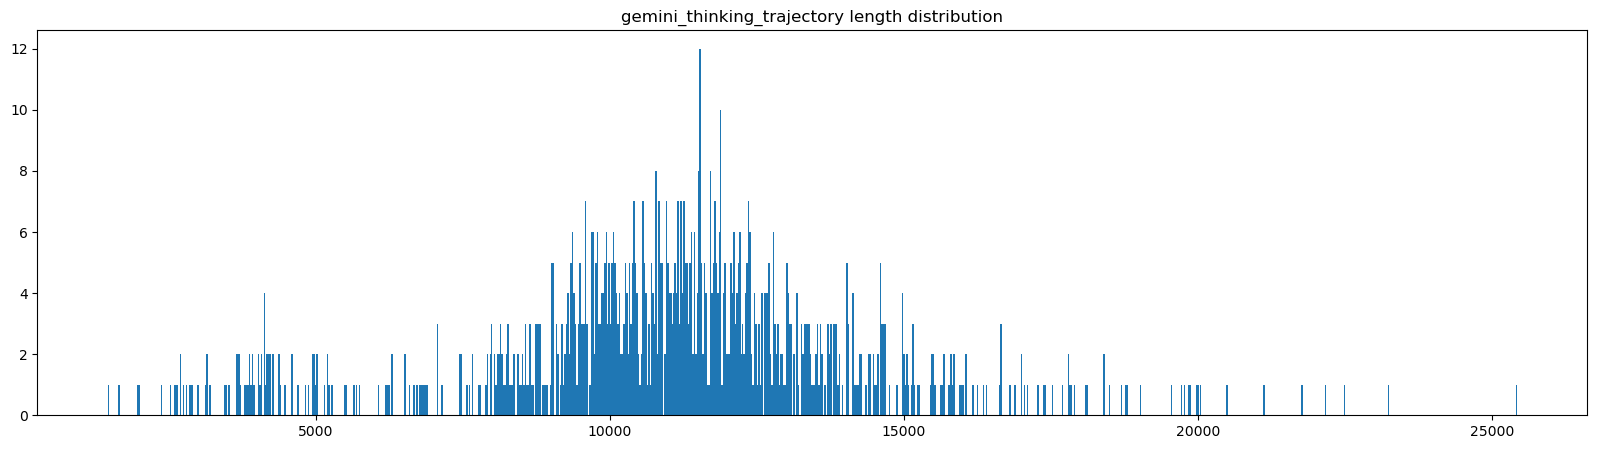

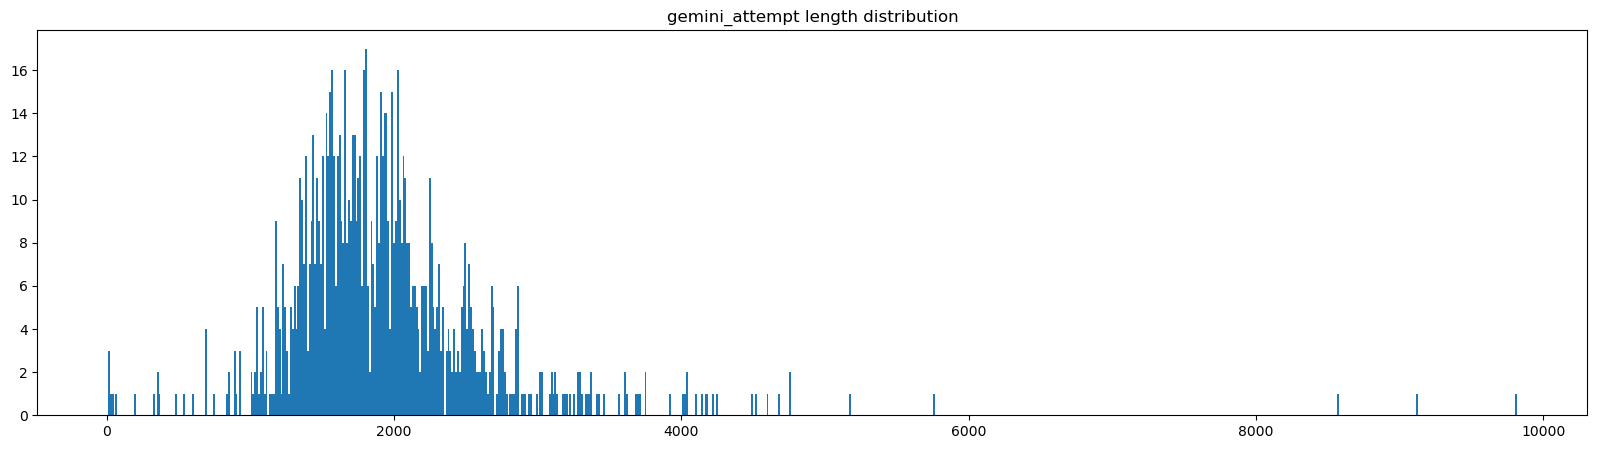

There are 1000 gemini_attempt.


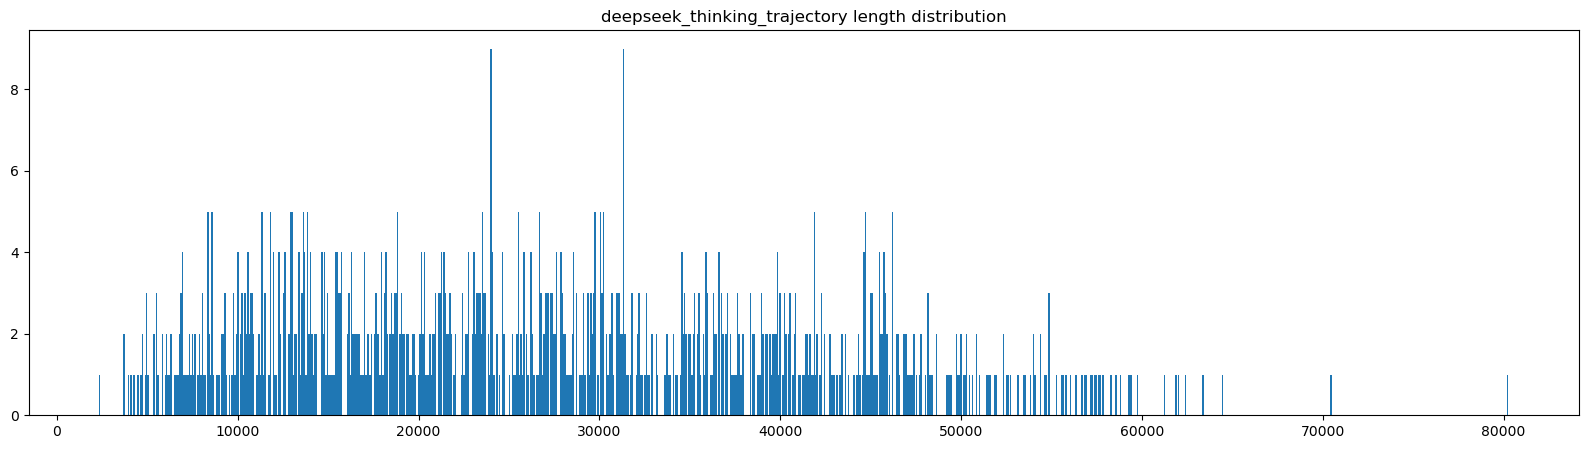

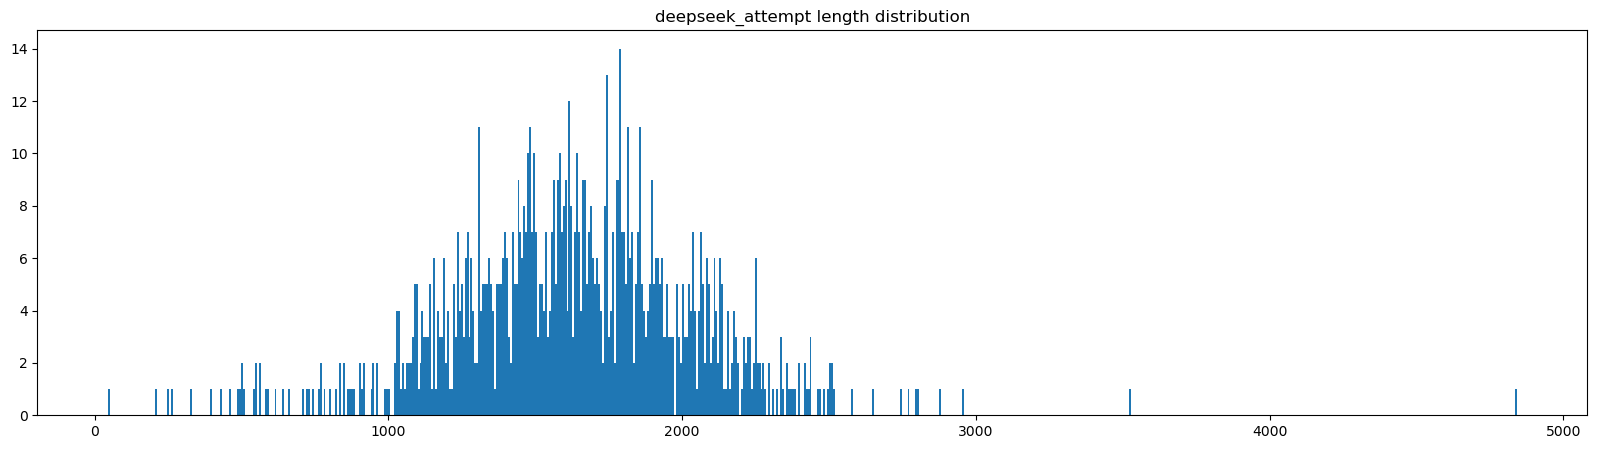

There are 1000 deepseek_attempt.


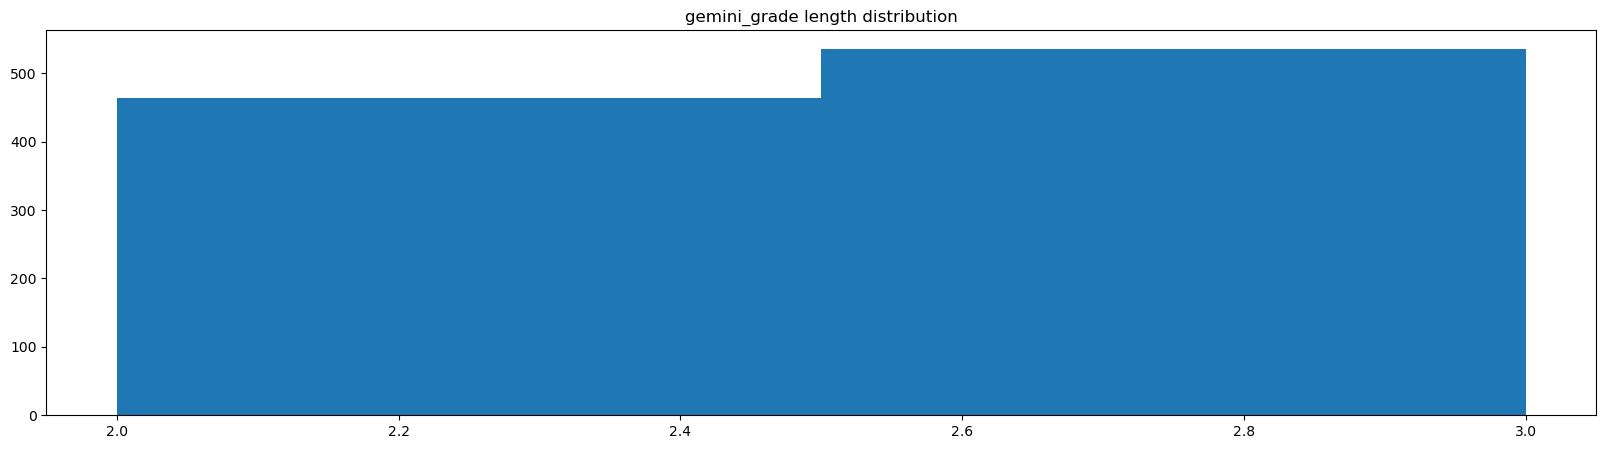

There are 2 gemini_grade.


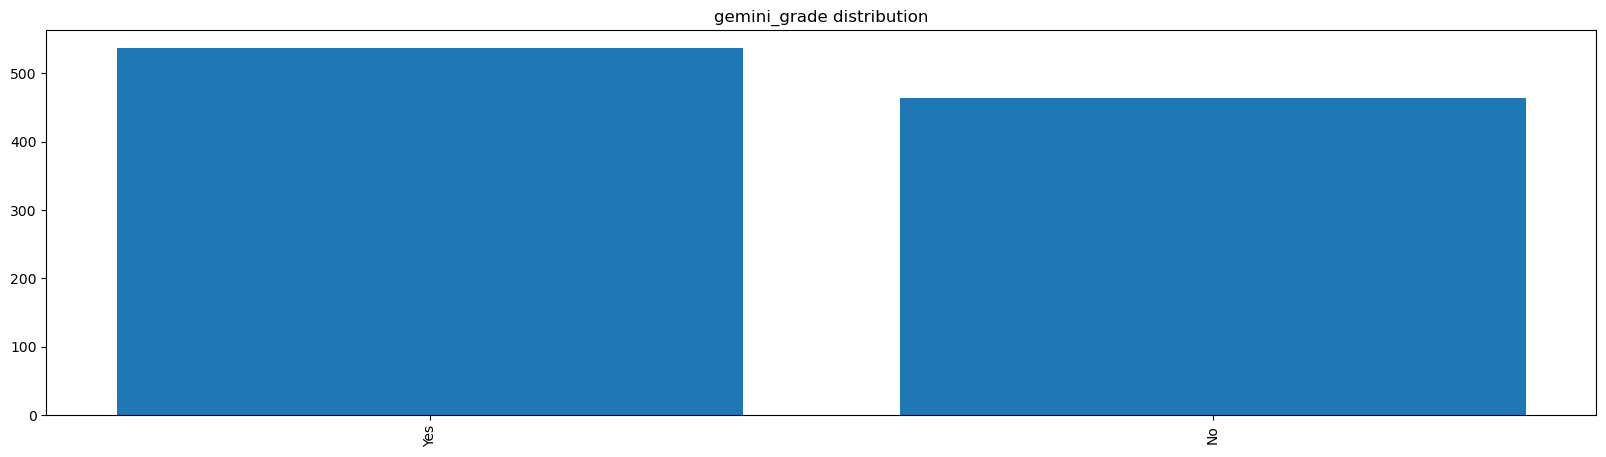

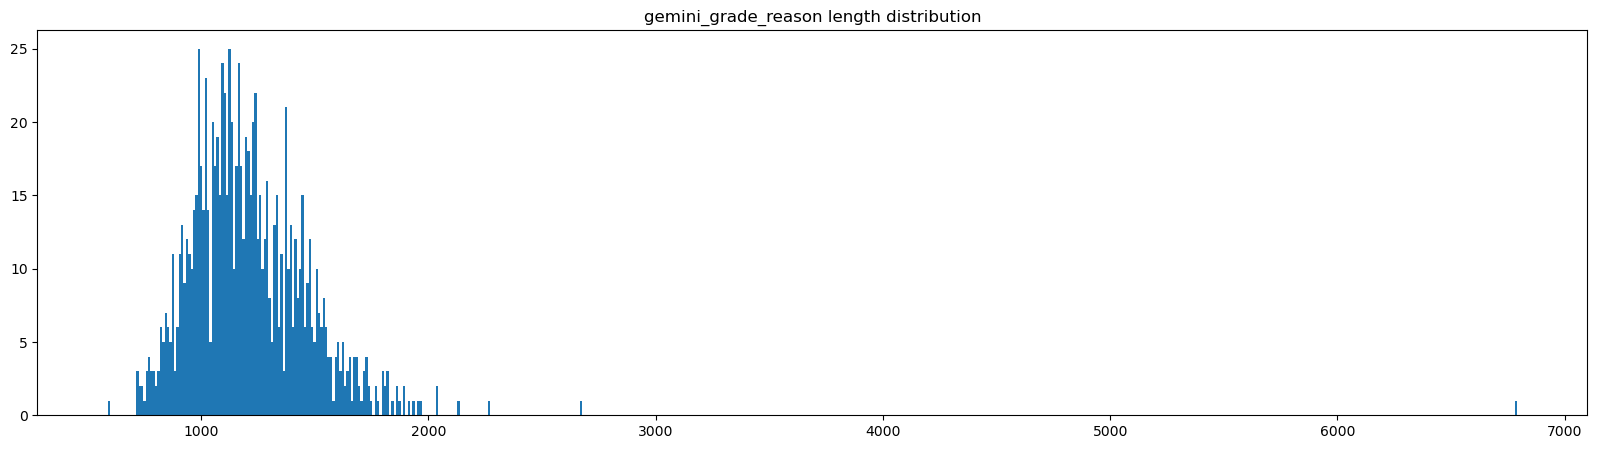

There are 1000 gemini_grade_reason.


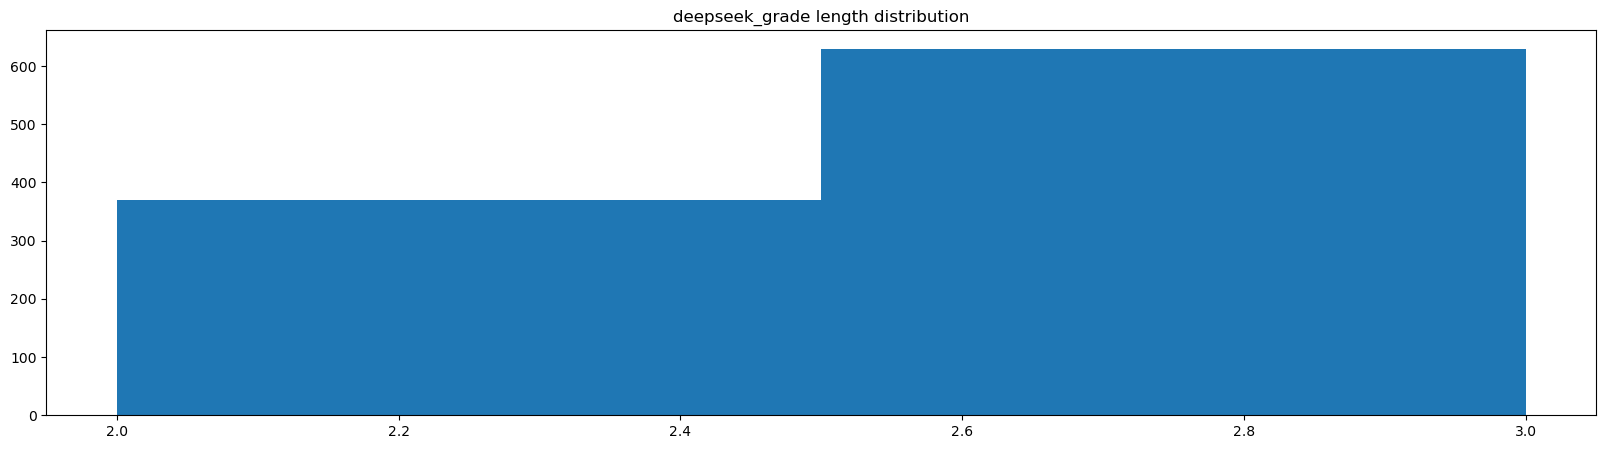

There are 2 deepseek_grade.


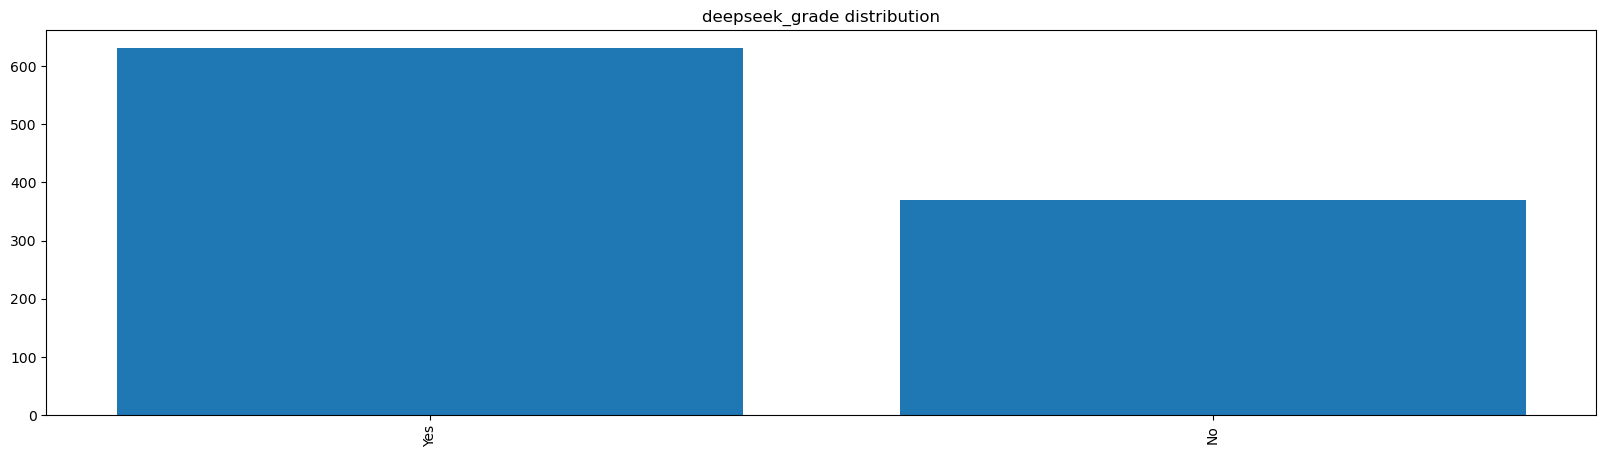

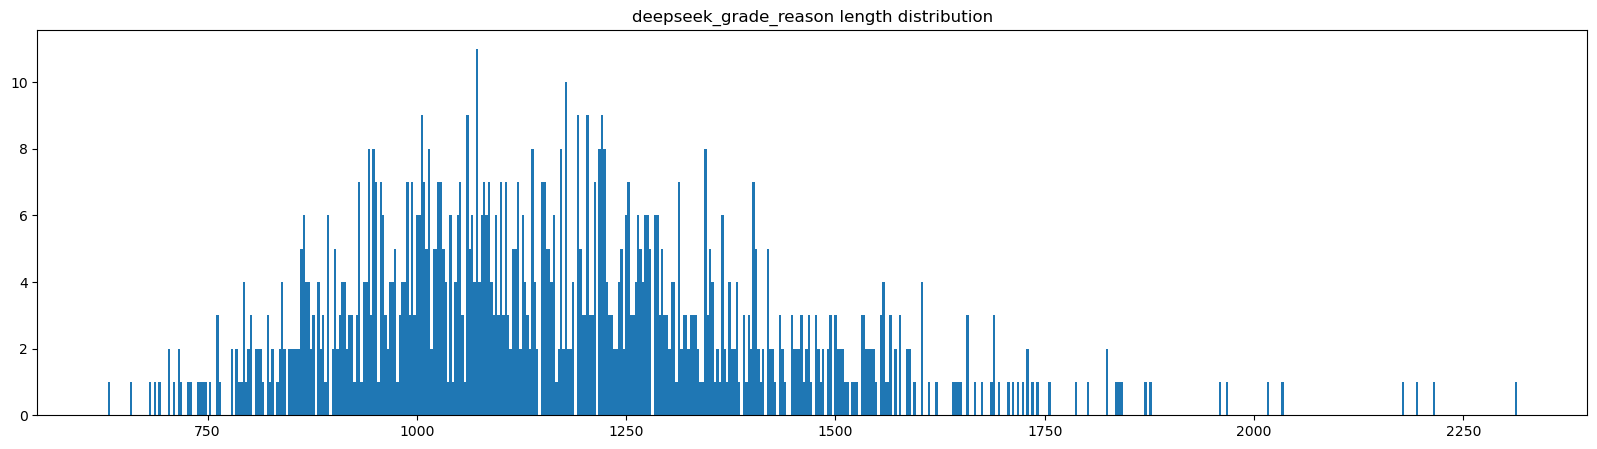

There are 1000 deepseek_grade_reason.


In [16]:
s1k_1_1 = load_data("s1K-1.1")
print_distributions(s1k_1_1, ['solution', 'question', 'cot_type', 'source_type', 'metadata', 'gemini_thinking_trajectory', 'gemini_attempt', 'deepseek_thinking_trajectory', 'deepseek_attempt', 'gemini_grade', 'gemini_grade_reason', 'deepseek_grade', 'deepseek_grade_reason'])

### Fusion of CoT datasets

In [ ]:
datasets = [
    am_deepseek_distill,
    big_math,
    limo,
    llama_nemotron,
    numina_math_1_5,
    open_r1_math,
    open_thoughts_2,
    pensez_0_1,
    s1k_1_1
]

fused_dataset = datasets.Dataset.from_dict({
    "question": [],
    "answer": [],
    "source": [],
    "domain": [],
    "llama8b_solve_rate": []
})